# 1. Cleaning and Exploring Dataset

## 1.1 Importing

In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import os
from google.colab import drive
drive.mount("/content/drive")
data_path = '/content/drive/MyDrive/Thesis/'
df = pd.read_csv(data_path + 'dataset.csv')
df.head()

Mounted at /content/drive


Unnamed: 0  id                                                url  \
0           1   0  https://raw.githubusercontent.com/ShareStats/i...   
1           2   1  https://raw.githubusercontent.com/ShareStats/i...   
2           3   2  https://raw.githubusercontent.com/ShareStats/i...   
3           4   3  https://raw.githubusercontent.com/ShareStats/i...   
4           5   4  https://raw.githubusercontent.com/ShareStats/i...   

                    title                                               body  \
0  eur-assumptions-101-en  exname: eur-assumptions-101-en \r\n extype: nu...   
1  eur-assumptions-101-nl  exname: eur-assumptions-101-nl \r\n extype: nu...   
2  eur-assumptions-102-en  exname: eur-assumptions-102-en \r\n extype: nu...   
3  eur-assumptions-102-nl  exname: eur-assumptions-102-nl \r\n extype: nu...   
4  eur-assumptions-103-en  exname: eur-assumptions-103-en \r\n extype: nu...   

                                            question  
0  *Testing effect* \r\nResearch has shown that w...  
1  *Testing effect* \r\nUit onderzoek is gebleken...  
2  *Testing effect* \r\nResearch has shown that w...  
3  *Testing effect* \r\nUit onderzoek is gebleken...  
4  *Long-term detention*\r\nCurrently, in the Net...

In [ ]:
# To separate body column in multiple columns
def parse_body(text):
    # Convert the stringified \n into real newlines in order to separate
    lines = text.replace("\\n", "\n").split("\n")
    lines = [line.strip() for line in lines if line.strip()]
    result = {}
    for line in lines:
        match = re.match(r"(exextra\[(.+?)\]|ex\w+):\s*(.*)", line)
        if match:
            key = match.group(2) if match.group(1).startswith("exextra") else match.group(1)
            result[key] = match.group(3)
    return pd.Series(result)

parsed_df = df['body'].apply(parse_body)

# Remove irrelevant columns
parsed_df = parsed_df.iloc[:, :-4]

df = pd.concat([df, parsed_df], axis=1)
df = df.drop(columns=['Unnamed: 0','id'])
df.head()

url                   title  \
0  https://raw.githubusercontent.com/ShareStats/i...  eur-assumptions-101-en   
1  https://raw.githubusercontent.com/ShareStats/i...  eur-assumptions-101-nl   
2  https://raw.githubusercontent.com/ShareStats/i...  eur-assumptions-102-en   
3  https://raw.githubusercontent.com/ShareStats/i...  eur-assumptions-102-nl   
4  https://raw.githubusercontent.com/ShareStats/i...  eur-assumptions-103-en   

                                                body  \
0  exname: eur-assumptions-101-en \r\n extype: nu...   
1  exname: eur-assumptions-101-nl \r\n extype: nu...   
2  exname: eur-assumptions-102-en \r\n extype: nu...   
3  exname: eur-assumptions-102-nl \r\n extype: nu...   
4  exname: eur-assumptions-103-en \r\n extype: nu...   

                                            question                  exname  \
0  *Testing effect* \r\nResearch has shown that w...  eur-assumptions-101-en   
1  *Testing effect* \r\nUit onderzoek is gebleken...  eur-assumptions-101-nl   
2  *Testing effect* \r\nResearch has shown that w...  eur-assumptions-102-en   
3  *Testing effect* \r\nUit onderzoek is gebleken...  eur-assumptions-102-nl   
4  *Long-term detention*\r\nCurrently, in the Net...  eur-assumptions-103-en   

  extype exsolution extol                                          exsection  \
0    num       .291     0  Assumptions / Homogeneity of variance / Levene...   
1    num       .291     0  Assumptions / Homogeneity of variance / Levene...   
2    num       .872     0  Assumptions / Homogeneity of variance / Levene...   
3    num       .872     0  Assumptions / Homogeneity of variance / Levene...   
4    num      0.935     0  Assumptions / Sphericity / Epsilon, Inferentia...   

                  Type Program Language                 Level  
0  Performing analysis    SPSS  English  Statistical Literacy  
1  Performing analysis    SPSS    Dutch  Statistical Literacy  
2  Performing analysis    SPSS  English  Statistical Literacy  
3  Performing analysis    SPSS    Dutch  Statistical Literacy  
4  Performing analysis    SPSS  English  Statistical Literacy

In [ ]:
df.shape

(4934, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4934 entries, 0 to 4933
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   url         4934 non-null   object
 1   title       4934 non-null   object
 2   body        4934 non-null   object
 3   question    4934 non-null   object
 4   exname      4934 non-null   object
 5   extype      4934 non-null   object
 6   exsolution  4934 non-null   object
 7   extol       372 non-null    object
 8   exsection   4934 non-null   object
 9   Type        4933 non-null   object
 10  Program     2398 non-null   object
 11  Language    4933 non-null   object
 12  Level       4914 non-null   object
dtypes: object(13)
memory usage: 501.2+ KB


In [ ]:
# Exploring some columsn that might be helpful
selected_columns = ["title", "extype", "exsection","Type","Program","Language","Level"]

for col in selected_columns:
    print(f"\n--- Column: {col} ---")
    print(f"Missing values: {df[col].isna().sum()}")
    print(f"Missing %: {df[col].isna().mean() * 100:.2f}%")
    print(f"Unique values: {df[col].nunique()}")
    print("Top 5 most frequent values:")
    print(df[col].value_counts(dropna=False).head())


--- Column: title ---
Missing values: 0
Missing %: 0.00%
Unique values: 4919
Top 5 most frequent values:
title
vufgb-oddsratio-005-nl     2
vufgb-oddsratio-004-nl     2
vufgb-chisquared-003-nl    2
vufgb-chisquared-002-nl    2
vufgb-chisquared-002-en    2
Name: count, dtype: int64

--- Column: extype ---
Missing values: 0
Missing %: 0.00%
Unique values: 5
Top 5 most frequent values:
extype
schoice    4489
num         367
string       56
cloze        21
mchoice       1
Name: count, dtype: int64

--- Column: exsection ---
Missing values: 0
Missing %: 0.00%
Unique values: 635
Top 5 most frequent values:
exsection
Inferential Statistics / Parametric Techniques / ANOVA / Oneway ANOVA    145
Inferential Statistics / Parametric Techniques / ANOVA / Twoway ANOVA    130
Inferential Statistics / Parametric Techniques / z-test                  105
Inferential Statistics / NHST / Power                                    104
Inferential Statistics / Non-parametric Techniques / Binomial test       

General Comments:
   * Some questions have same title. Total is 4934 but:
    - unique titles 4919
    - unique question 4902

   * Extype:  Most of them are multiplce choice. It is still valid to check accuracy per exercise type
              schoice     4489(single Multiple choice)
              num         367 (Fill in the blank numbers)
              string       56 (Fill in the blank text/essay)
              cloze        21 (Combinations)
              mchoice       1 (Multiple answer)
              

   * Ex Section: 635 unique values

   * Type: 106 unique values but presents some inconsistency that needs to be cleaned. Check if it is possible to use it to check accuracy per Type.

   * Program: Present some inconsistency that needs to be cleaned and most of questions don't have Program related

   * Languages: Present some inconsistency that needs to be cleaned; only dutch and english and mostly dutch

   * Level: 12 unique levels -> Present some inconsistency that needs to be cleaned; Might be nice to use it to check accuracy

## 1.2 Data Cleaning and Exploration

### Removing questions that are duplicated

In [ ]:
#### Remove duplicate questions and section
dup_question_exsection = df[df.duplicated(subset=['question', 'exsection'], keep=False)] ## to explore duplicated questions
df = df[~df.duplicated(subset=['question', 'exsection'], keep='first')]

In [ ]:
df.shape # Previous was 4934

(4915, 13)

In [ ]:
pd.set_option('display.max_colwidth', None)  # This removes any truncation

dup_question = df[df.duplicated('question', keep=False)]
dup_question.head(10)
## Conclusion: Some questions have different categories. I remove all of those to not be confused for the model.

url  \
140                           https://raw.githubusercontent.com/ShareStats/itembank/main/Descriptive-statistics/eur-descriptive-104-en/eur-descriptive-104-en.Rmd   
143                           https://raw.githubusercontent.com/ShareStats/itembank/main/Descriptive-statistics/eur-descriptive-107-en/eur-descriptive-107-en.Rmd   
584               https://raw.githubusercontent.com/ShareStats/itembank/main/Descriptive-statistics/uva-standard-deviation-27-nl/uva-standard-deviation-27-nl.Rmd   
689   https://raw.githubusercontent.com/ShareStats/itembank/main/Descriptive-statistics/vufgb-descriptivestatistics-001-en/vufgb-descriptivestatistics-001-en.Rmd   
1349                                        https://raw.githubusercontent.com/ShareStats/itembank/main/Inferential_Statistics/uu-ANOVA-820-nl/uu-ANOVA-820-nl.Rmd   
1362                                        https://raw.githubusercontent.com/ShareStats/itembank/main/Inferential_Statistics/uu-ANOVA-832-nl/uu-ANOVA-832-nl.Rmd   
1764                          https://raw.githubusercontent.com/ShareStats/itembank/main/Inferential_Statistics/uu-Twoway-ANOVA-807-nl/uu-Twoway-ANOVA-807-nl.Rmd   
1814                          https://raw.githubusercontent.com/ShareStats/itembank/main/Inferential_Statistics/uu-Twoway-ANOVA-857-nl/uu-Twoway-ANOVA-857-nl.Rmd   
2429                          https://raw.githubusercontent.com/ShareStats/itembank/main/Inferential_Statistics/uva-sample-mean-874-nl/uva-sample-mean-874-nl.Rmd   
2542                                    https://raw.githubusercontent.com/ShareStats/itembank/main/Inferential_Statistics/uva-squared-48-nl/uva-squared-48-nl.Rmd   

                                   title  \
140               eur-descriptive-104-en   
143               eur-descriptive-107-en   
584         uva-standard-deviation-27-nl   
689   vufgb-descriptivestatistics-001-en   
1349                     uu-ANOVA-820-nl   
1362                     uu-ANOVA-832-nl   
1764              uu-Twoway-ANOVA-807-nl   
1814              uu-Twoway-ANOVA-857-nl   
2429              uva-sample-mean-874-nl   
2542                   uva-squared-48-nl   

                                                                                                                                                                                                                                                                                                                                                                                                                                                  body  \
140                                               exname: eur-descriptive-104-en \r\n extype: string \r\n exsolution: "equal to" \r\n extol: 0 \r\n exsection: Descriptive statistics / Summary Statistics / Measures of Location / Mean, Descriptive statistics / Summary Statistics / Measures of Location / Median \r\n exextra[Type]: string \r\n exextra[Program]: none \r\n exextra[Language]: English \r\n exextra[Level]: Statistical Literacy   
143   exname: eur-descriptive-107-en \r\n extype: string \r\n exsolution: "smaller than" \r\n extol:  \r\n exsection: Descriptive statistics / Summary Statistics / Measures of Location / Mean, Descriptive statistics / Summary Statistics / Measures of Location / Median, Distributions / Continuous / Normal \r\n exextra[Type]: Conceptual \r\n exextra[Program]: none \r\n exextra[Language]: English \r\n exextra[Level]: Statistical Literacy   
584                                                                                     exname: uva-standard-deviation-27-nl \r\n extype: schoice \r\n exsolution: 010 \r\n exsection: Descriptive statistics / Summary Statistics / Measures of Spread / Standard Deviation \r\n exextra[Type]: Conceptual \r\n exextra[Language]: Dutch \r\n exextra[Level]: Statistical Literacy \r\n exextra[IRT-Difficulty]: -0.958 \r\n exextra[p-value]: 0.9469   
689                        exname: vufgb-descriptivestatistics-001-en \r\n extype: schoic

In [ ]:
df = df[~df['question'].duplicated(keep=False)]
df.shape # 4915 previously

(4889, 13)

### Exercise Type

In [ ]:
# Count frequency of each category
type_exer_percent = df["extype"].value_counts(normalize=True, dropna=False) * 100
type_exer_percent

extype
schoice    91.000205
num         7.445285
string      1.104520
cloze       0.429536
mchoice     0.020454
Name: proportion, dtype: float64

### Type Column

In [ ]:
# Lowercase everything in the 'type' column
df['old_type'] = df['Type']
df['Type'] = df['Type'].str.lower().str.strip()
df['Type'] = df['Type'].str.replace('/', ',')
df['Type'] = df['Type'].str.replace(r'\s+', ' ', regex=True).str.strip()


# Dictionary of common typos to correct values
corrections = {
    # Your corrections
    'interpretating output': 'interpreting output',
    'interpretating ouput': 'interpreting output',
    'interpreting out': 'interpreting output',
    'interpeting output': 'interpreting output',
    'interpretating graph': 'interpreting graph',
    'test choise': 'test choice',
    'cOnceptual': 'conceptual',
    'test choice,na': 'test choice',
    'coceptual': 'conceptual',
    'interpretating output, case': 'interpreting output, case',
    'interpretating output, creating graphs': 'interpreting output, creating graphs',
    'interpretating graph, calculation': 'interpreting graph, calculation',
    'interpretating graph, conceptual': 'interpreting graph, conceptual',
    'interpretating graph, interpretating output': 'interpreting graph, interpreting output',
    'calculation, interpreting graphinterpreting graph': 'calculation, interpreting graph',
    'conceptual, interpreting graphh': 'conceptual, interpreting graph',
    'conceptual case': 'conceptual, case',
    'conceptual, test choice, cas': 'conceptual, test choice, case',
    'output': 'interpreting output',
    'interpretating output, calculation': 'interpreting output, calculation',
    'calculate':'calculation'
}

def normalize_type(value):
    if pd.isna(value) or not isinstance(value, str):
        return np.nan
    items = [item.strip() for item in value.split(',') if item.strip()]
    return ', '.join(sorted(items))

# Apply corrections
df['Type'] = df['Type'].replace(corrections)

# Apply normalization
df['Type'] = df['Type'].apply(normalize_type)

df["Type"].nunique()
df["Type"].unique()

array(['performing analysis', 'conceptual', 'interpreting output',
       'interpreting graph', 'case', 'conceptual, interpreting graph',
       'calculation', 'conceptual, interpreting output',
       'calculation, conceptual, interpreting output', 'string',
       'calculate, case, conceptual, creating graphs, data manipulation, interpreting graph, interpreting output, performing analysis, test choice',
       'calculation, data manipulation', 'calculation, case',
       'interpreting output, performing analysis',
       'data manipulation, interpreting output, performing analysis',
       'data manipulation, interpreting output', 'data manipulation',
       'calculation, data manipulation, interpreting output',
       'calculation, interpreting output, performing analysis',
       'calculation, case, data manipulation, interpreting output',
       'case, conceptual, interpreting graph', 'case, conceptual',
       'creating graphs', 'conceptual, test choice',
       'case, interpreti

In [ ]:
# Count frequency of each category
type_counts = df["Type"].value_counts(normalize=True, dropna=False) * 100
type_counts.head(20)

Type
conceptual                                             39.149110
calculation                                            26.672121
interpreting output                                    11.127020
calculation, conceptual                                 4.663530
performing analysis                                     3.497648
calculation, interpreting output                        2.597668
interpreting graph                                      2.024954
case                                                    1.963592
test choice                                             1.861321
conceptual, interpreting graph                          0.879525
calculation, case                                       0.797709
conceptual, interpreting output                         0.715893
interpreting output, performing analysis                0.695439
calculation, interpreting graph                         0.490898
case, conceptual                                        0.449990
calculation, case, interpreting output                  0.306811
conceptual, test choice                                 0.224995
calculation, data manipulation                          0.224995
case, interpreting output                               0.204541
calculation, data manipulation, interpreting output     0.122724
Name: proportion, dtype: float64

### Program column

In [ ]:
df["Program"].unique()

program_corrections = {
    # Treat these as missing values
    '': np.nan,
    'NA': np.nan,
    'na': np.nan,
    'none': np.nan,
    np.nan: np.nan,  # Keep nan as nan

    # Standardize SPSS
    'SPSS': 'SPSS',
    'spss': 'SPSS',
    'SPSS, JASP': 'SPSS',

    # Standardize anything related to "calculation"
    'calculator': 'calculator',
    'Calculator': 'calculator',
    'Calculater': 'calculator',
    'Calculation': 'calculator',
    'calculation': 'calculator'
}

# Apply corrections
df['old_program'] = df['Program']
df['Program'] = df['Program'].replace(program_corrections)
df["Program"].nunique()
df["Program"].unique()


# Count frequency of each category
program_counts = df["Program"].value_counts(normalize=True, dropna=False) * 100
program_counts

# Most of questions don't have a program related to

Program
NaN           83.227654
SPSS          11.924729
calculator     4.806709
Conceptual     0.020454
dutch          0.020454
Name: proportion, dtype: float64

### Language

In [ ]:
language_corrections = {
    'english': 'English'
}

# Apply corrections
df['Old_Language'] = df['Language']
df['Language'] = df['Language'].replace(language_corrections)
df["Language"].nunique()
df["Language"].unique()

array(['English', 'Dutch', nan], dtype=object)

In [ ]:
# Extract the language part from the 'title' column (either 'en' or 'nl')
df['language'] = df['title'].str.extract(r'-(en|nl)$')

# Remove the language part from the title to focus on the base title
df['title_without_language'] = df['title'].str.replace(r'-(en|nl)$', '', regex=True)

# Filter the dataset to get only titles in English (en)
english_titles = df[df['language'] == 'en']

In [ ]:
# The column "Language" present some inconsistency. Some question while it says it is English, the question was still Dutch. To identify that the column "title" was used
errorslanguage= english_titles[english_titles['Language'] == 'Dutch']
errorslanguage.shape

(8, 18)

In [ ]:
# Filter the dataset to get only titles in Dutch (nl)
dutch_titles = df[df['language'] == 'nl']
dutch_titles.shape

(4028, 18)

In [ ]:
errorslanguage= dutch_titles[dutch_titles['Language'] == 'English']
errorslanguage.shape

(2, 18)

Conclusion: Use the "nl" and "en" from title. It is more accuracted

In [ ]:
# Count frequency of each category
language_counts = df['language'].value_counts()
language_counts

language
nl    4028
en     857
Name: count, dtype: int64

In [ ]:
# Count frequency of each category
language_counts = df['language'].value_counts(normalize=True, dropna=False) * 100
language_counts

language
nl     82.389037
en     17.529147
NaN     0.081816
Name: proportion, dtype: float64

### Level Column

In [ ]:
#### Chekcing Level column
df["Level"].unique()
df["Old_Level"]  = df["Level"]
df['Level'] = df['Level'].str.lower().str.strip()

# Dictionary of common typos to correct values
level_corrections = {
    # Your corrections
    'statistical reasoning<br / >': 'statistical reasoning',
    'statisitcal reasoning': 'statistical reasoning',
    'na': np.nan
}

# Apply corrections
df['Level']  = df['Level'] .replace(level_corrections)

df['Level'].unique()

# Count frequency of each category
level_counts = df['Level'].value_counts(normalize=True, dropna=False) * 100
level_counts

Level
statistical literacy     82.614031
statistical thinking     10.329311
statistical reasoning     6.586214
NaN                       0.429536
interpretating output     0.020454
statistical analysis      0.020454
Name: proportion, dtype: float64

## 1.3 Data pre-processing

### Ex Section Variable - Outcome

In [ ]:
# Identifying columns which accepted more than 1 category
comma_count = df['exsection'].str.contains(',').sum()
print(f"Number of rows with multiple categoris: {comma_count}")

Number of rows with multiple categoris: 540


In [ ]:
# From the ones that have more than 1 category, only 139 have different categories
def has_mixed_first_levels(row):
    if pd.isna(row):  # skip NaN
        return False
    sections = [s.strip() for s in row.split(',')]
    first_levels = [s.split('/')[0].strip() for s in sections if '/' in s]
    return len(set(first_levels)) > 1  # True if there's more than one unique first-level

# Apply function to each row in the 'exsection' column
df['mixed_first_level'] = df['exsection'].apply(has_mixed_first_levels)

# Count how many rows have mixed first-level taxonomies
mixed_count = df['mixed_first_level'].sum()
print(f"Number of rows with different first-level taxonomies: {mixed_count}")

# To first-level I remove all of these

Number of rows with different first-level taxonomies: 139


In [ ]:
# From the ones that have more than 1 category but same first-level, checking if they have different second-level
def has_mixed_second_levels(row):
    if pd.isna(row):
        return False
    sections = [s.strip() for s in row.split(',')]
    second_levels = [s.split('/')[1].strip() for s in sections if '/' in s and len(s.split('/')) > 1]
    return len(set(second_levels)) > 1  # True if there's more than one unique second-level

df['mixed_second_level'] = df['exsection'].apply(has_mixed_second_levels)
mixed_second_count = df['mixed_second_level'].sum()

print(f"Number of rows with different second-level taxonomies: {mixed_second_count}")

Number of rows with different second-level taxonomies: 333


In [ ]:
# Rename Measurement Level and Variable type to "Type of Variable"
df['exsection_old'] = df['exsection']
df['exsection'] = df['exsection'].str.replace(r'\b(Measurement Level|Variable type|variable type|measurement level)\b', 'Type of Variable', regex=True)

FIRST LEVEL COLUMN

In [ ]:
# Create a new column with the first-level taxonomy
df['exsection'] = df['exsection'].str.lower()
df['first_level'] = df['exsection'].str.split('/').str[0]
df['first_level'] = df['first_level'].str.strip()

In [ ]:
unique_values = df['first_level'].unique()
unique_values

array(['assumptions', 'factor analysis', 'inferential statistics',
       'assumptions, assumptions', 'assumptions, inferential statistics',
       'descriptive statistics', 'type of variable',
       'descriptive statistics, descriptive statistics', 'distributions',
       'factor analysis, factor analysis', 'factoranalysis', 'c',
       'inferential statistics, inferential statistics', 'statistics',
       'reliability', 'probability', 'type of variable, type of variable'],
      dtype=object)

In [ ]:
value_counts = df['first_level'].value_counts()
value_counts

first_level
inferential statistics                            3042
descriptive statistics                             754
probability                                        492
distributions                                      230
assumptions                                        130
reliability                                        104
factor analysis                                     64
type of variable                                    60
type of variable, type of variable                   4
assumptions, assumptions                             2
assumptions, inferential statistics                  1
descriptive statistics, descriptive statistics       1
factor analysis, factor analysis                     1
inferential statistics, inferential statistics       1
c                                                    1
factoranalysis                                       1
statistics                                           1
Name: count, dtype: int64

In [ ]:
# Clean specific labels
df['first_level'] = df['first_level'].replace({
    'type of variable, type of variable': 'type of variable',
    'factoranalysis': 'factor analysis',
    'descriptive statistics, descriptive statistics': 'descriptive statistics',
    'assumptions, assumptions': 'assumptions',
    'inferential statistics, inferential statistics': 'inferential statistics',
    'statistics': 'inferential statistics',
    'factor analysis, factor analysis' : 'factor analysis'
})

df = df[~df['first_level'].isin(['assumptions, inferential statistics','c'])]

In [ ]:
# Frequency
frequency = df['first_level'].value_counts()

# Relative Frequency formatted as percentages
relative_frequency = df['first_level'].value_counts(normalize=True) * 100
relative_frequency = relative_frequency.map(lambda x: f"{x:.1f}%")

# Combine into a single table
frequency_table = pd.DataFrame({
    'Frequency': frequency,
    'Relative Frequency': relative_frequency
})
frequency_table

Frequency Relative Frequency
first_level                                         
inferential statistics       3044              62.3%
descriptive statistics        755              15.4%
probability                   492              10.1%
distributions                 230               4.7%
assumptions                   132               2.7%
reliability                   104               2.1%
factor analysis                66               1.4%
type of variable               64               1.3%

SECOND LEVEL COLUMN

In [ ]:
# create second level variable
# Extract second-level (after '/') and strip spaces
df['second_level'] = (
    df['exsection']
    .str.extract(r'/\s*([^,/]+)')[0]  # extract match group only
    .str.strip()  # remove extra spaces
)

In [ ]:
# Probability only have 1 second-level; than multiple third-level. For this reason the third-level have replaced the second-level (Elementary Probability)
mask = df['first_level'].str.lower() == 'probability'
df.loc[mask, 'second_level'] = (
    df.loc[mask, 'exsection']
    .str.extract(r'(?:[^/]+/){2}\s*([^,/]+)')[0]
    .str.strip()
)

In [ ]:
unique_values = df['second_level'].unique()
unique_values

array(['homogeneity of variance', 'sphericity', nan, 'communalities',
       'homoscedasticity', 'normality', 'linearity', 'multicolinearity',
       'regression', 'summary statistics', 'data representation',
       'score interpretation', 'discrete variable',
       'confidence intervals', 'parametric techniques', 'continuous',
       'discrete', 'limit theorems', 'eigenvalues', 'scree plot',
       'exploratory factor analysis', 'factor loadings', 'rotations',
       'explained variance', 'structure matrix', 'pattern matrix',
       'factor correlation matrix', 'compontent correlation matrix',
       'principle component analysis', 'nhst', 'effect size',
       'bayesian statistics', 'sampling distributions',
       'non-parametric techniques', 'multilevel analysis', 'analysis',
       'bootstrap', 'conditional probability', 'random variables',
       'general rules', 'parametric rechniques', 'interval', 'nominal',
       'ordinal', 'ratio', 'events', 'sample space', 'descriptives',


In [ ]:
# Clean specific labels
df['second_level'] = df['second_level'].replace({
    'parametric rechniques': 'parametric techniques'
})

In [ ]:
df.groupby(['first_level', 'second_level'], dropna=False).size().reset_index(name='count')

first_level                   second_level  count
0              assumptions        homogeneity of variance     41
1              assumptions               homoscedasticity     17
2              assumptions                      linearity      7
3              assumptions               multicolinearity     26
4              assumptions                      normality      6
5              assumptions                     sphericity     17
6              assumptions                            NaN     18
7   descriptive statistics            data representation    115
8   descriptive statistics           score interpretation     78
9   descriptive statistics             summary statistics    536
10  descriptive statistics                            NaN     26
11           distributions                     continuous    175
12           distributions                       discrete     34
13           distributions                 limit theorems     19
14           distributions                            NaN      2
15         factor analysis                  communalities      1
16         factor analysis  compontent correlation matrix      4
17         factor analysis                    eigenvalues      4
18         factor analysis             explained variance     15
19         factor analysis    exploratory factor analysis      4
20         factor analysis      factor correlation matrix      3
21         factor analysis                factor loadings      5
22         factor analysis                 pattern matrix      3
23         factor analysis   principle component analysis      1
24         factor analysis                      rotations      6
25         factor analysis                     scree plot      5
26         factor analysis               structure matrix      2
27         factor analysis                            NaN     13
28  inferential statistics            bayesian statistics     25
29  inferential statistics                      bootstrap      1
30  inferential statistics           confidence intervals    158
31  inferential statistics                    effect size     53
32  inferential statistics            multilevel analysis     18
33  inferential statistics                           nhst    548
34  inferential statistics      non-parametric techniques    121
35  inferential statistics          parametric techniques   1044
36  inferential statistics                     regression    894
37  inferential statistics         sampling distributions    131
38  inferential statistics                            NaN     51
39             probability        conditional probability     41
40             probability            data representation      1
41             probability                         events     17
42             probability                  general rules    169
43             probability               random variables    128
44             probability                   sample space     42
45             probability                            NaN     94
46             reliability                       analysis     89
47             reliability                   descriptives      4
48             reliability                            NaN     11
49        type of variable            continuous variable      1
50        type of variable              discrete variable      6
51        type of variable                       interval     12
52        type of variable                        nominal      7
53        type of variable                        ordinal      7
54        type of variable                          ratio      3
55        type of variable                            NaN     28

In [ ]:
# Count occurrences of each (first_level, second_level) pair
count_table = df.groupby(['first_level', 'second_level'], dropna=False).size().reset_index(name='count')

# Compute total counts per first_level
count_table['total_per_first'] = count_table.groupby('first_level')['count'].transform('sum')

# Calculate relative frequency within each first_level
count_table['relative_freq'] = (count_table['count'] / count_table['total_per_first'] * 100).round(1)

# Sort by first_level and then by count descending
count_table = count_table.sort_values(by=['first_level', 'count'], ascending=[True, False])

# Optional: drop the helper column
count_table = count_table.drop(columns='total_per_first')
count_table

first_level                   second_level  count  \
0              assumptions        homogeneity of variance     41   
3              assumptions               multicolinearity     26   
6              assumptions                            NaN     18   
1              assumptions               homoscedasticity     17   
5              assumptions                     sphericity     17   
2              assumptions                      linearity      7   
4              assumptions                      normality      6   
9   descriptive statistics             summary statistics    536   
7   descriptive statistics            data representation    115   
8   descriptive statistics           score interpretation     78   
10  descriptive statistics                            NaN     26   
11           distributions                     continuous    175   
12           distributions                       discrete     34   
13           distributions                 limit theorems     19   
14           distributions                            NaN      2   
18         factor analysis             explained variance     15   
27         factor analysis                            NaN     13   
24         factor analysis                      rotations      6   
21         factor analysis                factor loadings      5   
25         factor analysis                     scree plot      5   
16         factor analysis  compontent correlation matrix      4   
17         factor analysis                    eigenvalues      4   
19         factor analysis    exploratory factor analysis      4   
20         factor analysis      factor correlation matrix      3   
22         factor analysis                 pattern matrix      3   
26         factor analysis               structure matrix      2   
15         factor analysis                  communalities      1   
23         factor analysis   principle component analysis      1   
35  inferential statistics          parametric techniques   1044   
36  inferential statistics                     regression    894   
33  inferential statistics                           nhst    548   
30  inferential statistics           confidence intervals    158   
37  inferential statistics         sampling distributions    131   
34  inferential statistics      non-parametric techniques    121   
31  inferential statistics                    effect size     53   
38  inferential statistics                            NaN     51   
28  inferential statistics            bayesian statistics     25   
32  inferential statistics            multilevel analysis     18   
29  inferential statistics                      bootstrap      1   
42             probability                  general rules    169   
43             probability               random variables    128   
45             probability                            NaN     94   
44             probability                   sample space     42   
39             probability        conditional probability     41   
41             probability                         events     17   
40             probability            data representation      1   
46             reliability                       analysis     89   
48             reliability                            NaN     11   
47             reliability                   descriptives      4   
55        type of variable                            NaN     28   
51        type of variable                       interval     12   
52        type of variable                        nominal      7   
53        type of variable                        ordinal      7   
50        type of variable              discrete variable      6   
54        type of variable                          ratio      3   
49        type of variable            continuous variable      1   

    relative_freq  
0            31.1  
3            19.7  
6            13.6  
1            12.9  
5            12.9  
2             5.3 

In [ ]:
second_level_counts = df.groupby('first_level', dropna=False)['second_level'].nunique(dropna=False).reset_index()
second_level_counts.columns = ['first_level', 'n_second_levels']
second_level_counts

first_level  n_second_levels
0             assumptions                7
1  descriptive statistics                4
2           distributions                4
3         factor analysis               13
4  inferential statistics               11
5             probability                7
6             reliability                3
7        type of variable                7

### Question - input data

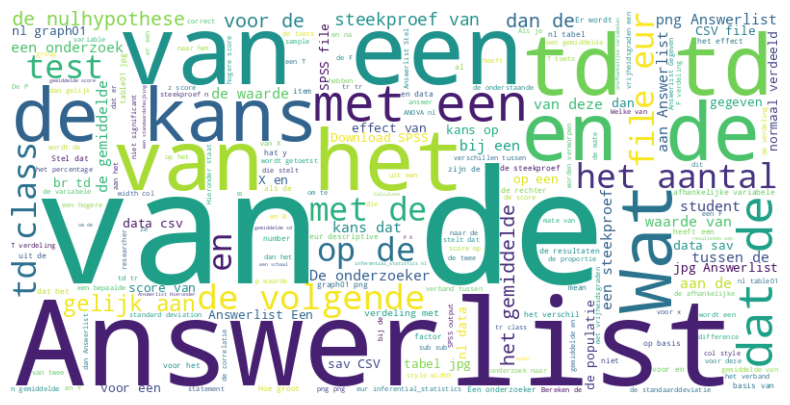

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all texts into a single string
all_text = " ".join(df['question'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Create a regex pattern to match LaTeX-like expressions
latex_pattern = r'\$.*?\$|\\[a-zA-Z]+\{[^}]*\}'

# Filter rows where 'question' column contains LaTeX-like expressions
latex_examples = df[df['question'].str.contains(latex_pattern, regex=True, na=False)]

pd.set_option('display.max_colwidth', None)  # This removes any truncation

# Display the filtered results
latex_examples.shape
latex_examples.head(1)

url  \
11  https://raw.githubusercontent.com/ShareStats/itembank/main/Assumptions/UU-assumptions-002-nl/UU-assumptions-002-nl.Rmd   

                    title  \
11  UU-assumptions-002-nl   

                                                                                                                                                                                                                                   body  \
11  exname: uu-assumptions-002-nl \r\n extype: schoice \r\n exsolution: 0001 \r\n exsection: Assumptions \r\n exextra[Type]: Conceptual \r\n exextra[Program]:  \r\n exextra[Language]: Dutch \r\n exextra[Level]: Statistical Literacy   

                                                                                                                                                                                                                                                                                                                                                                                                                                    question  \
11  Aan welke van de volgende voorwaarden moet zijn voldaan voor een enkelvoudige regressie-analyse waarin je de score op Y voorspelt  uit de score op X?\r\nAnswerlist\r\n----------\r\n* Het verband tussen X en Y moet lineair zijn.\r\n* De variabele $Y$ moet minimaal op intervalniveau zijn gemeten.\r\n* De residuen $\hat{Y}$ behoren ongeveer normaalverdeeld te zijn.\r\n* Er moet aan alle drie de voorwaarden zijn voldaan.\r\n   

                   exname   extype exsolution extol    exsection        Type  \
11  uu-assumptions-002-nl  schoice       0001   NaN  assumptions  conceptual   

    ... old_program Old_Language language title_without_language  \
11  ...                    Dutch       nl     UU-assumptions-002   

               Old_Level mixed_first_level mixed_second_level exsection_old  \
11  Statistical Literacy             False              False   Assumptions   

    first_level  second_level  
11  assumptions           NaN  

[1 rows x 24 columns]

In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=720b73bdec7c28da7f57135a044d5ec16b5c91411bbc8e01743475e76a71c324
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [ ]:
from pylatexenc.latex2text import LatexNodes2Text

# Initialize the LatexNodes2Text converter
latex_to_text_converter = LatexNodes2Text()

# Function to convert LaTeX to plain text
def convert_latex_to_text(latex_string):
    # Escape percent signs that are not already escaped
    latex_string = latex_string.replace('%', r'\%')
    return latex_to_text_converter.latex_to_text(latex_string)

# Apply the function to the 'q' column
df['question_cleaned'] = df['question'].apply(convert_latex_to_text)

In [ ]:
def clean_markdown(text):
    # Remove markdown characters: *, _, ~, #
    text = re.sub(r'[*_~#]', '', text)
    # Replace markdown links to download (.sav SPSS and .csv CSV)
    text = re.sub(r'\s*\(([^)]*\.sav|[^)]*\.csv)\)', '', text)
    # Replace png, jpg, or jpeg images with <image>
    text = re.sub(r'!\[\]\([^)]*\.(jpg|png|jpeg)\)', 'image', text)
    # Replace double backslashes \\ with a space
    text = text.replace('\\', ' ')
    # Remove line breaks
    text = text.replace('\r\n', ' ').replace('\n', ' ')
    # Remove sequences of hyphens (--------) or dash
    text = re.sub(r'[\u2010\u2013\u2014\-]{2,}', '', text)
    # Collapse multiple spaces into one
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Apply the cleaning function
df['question_cleaned'] = df['question_cleaned'].apply(clean_markdown)

In [ ]:
filtered_df = df[df['question'].str.contains('SPSS', case=False, na=False)]
filtered_df_sample = filtered_df.sample(1)
filtered_df_sample

url  \
1272  https://raw.githubusercontent.com/ShareStats/itembank/main/Inferential_Statistics/eur-inferential_statistics-227-nl/eur-inferential_statistics-227-nl.Rmd   

                                  title  \
1272  eur-inferential_statistics-227-nl   

                                                                                                                                                                                                                                                                                                                                                          body  \
1272  exname: eur-inferential_statistics-227-nl \r\n extype: num \r\n exsolution: 0.024 \r\n extol: 0 \r\n exsection: Inferential Statistics / Parametric Techniques / Cross tables / Chi-Squared for Independence \r\n exextra[Type]: Performing analysis \r\n exextra[Program]: SPSS \r\n exextra[Language]: Dutch \r\n exextra[Level]: Statistical Literacy   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         question  \
1272  Mannen en vrouwen hebben in de auto vaak commentaar op elkaars rijgedrag. We kijken naar het geslacht van wie er achter het stuur zit [Chauffeur, waarbij man = 0, vrouw = 1], in welk merk auto iemand rijdt [Auto, waarbij Ford = 1, Audi = 2, Toyota = 3, en Volkswagen = 4], naar de gereden kilometers [Gereden_kilometers] en naar de kilometers als bijrijder [Bijrijder_kilometers]. Ook kijken we naar wie een botsing heeft gekregen en wie niet [Botsing, waarbij geen botsing = 0, wel botsing = 1]..\r\nDe onderzoeker toetst of er een relatie is tussen het geslacht van de chauffeur en het merk van de auto. Schrijf de p-waarde van deze toets in het antwoordvakje (met 3 cijfers achter de komma).\r\n**Download**: [SPSS file](eur-inferential_statistics-227-nl-data.sav), [CSV file](eur-inferential_statistics-227-nl-data.csv)\r\n   

                                 exname extype exsolution extol  \
1272  eur-inferential_statistics-227-nl    num      0.024     0   

                                                                                         exsection  \
1272  inferential statistics / parametric techniques / cross tables / chi-squared for independence   

                     Type  ... Old_Language language  \
1272  performing analysis  ...        Dutch       nl   

              title_without_language             Old_Level mixed_first_level  \
1272  eur-inferential_statistics-227  Statistical Literacy             False   

     mixed_second_level  \
1272              False   

                                                                                     exsection_old  \
1272  Inferential Statistics / Parametric Techniques / Cross tables / Chi-Squared for Independence   

                 first_level           second_level  \
1272  inferential statistics  parametric techniques   

                                                                                                                                                                                                                                                                                                                                                                                     

##  1.4 Pre-processing for both methods

In [ ]:
# Install Hugging Face libraries
!pip install datasets
!pip install optuna

In [ ]:
from transformers import Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset
import torch
import optuna
import os

In [ ]:
# Filtering just Dutch questions
df_mbert = df[df['language'] == 'nl']
df_mbert.shape

(4026, 25)

In [ ]:
# Removing questions with different first_level annotation
df_mbert = df_mbert[df_mbert['mixed_first_level']==False]
df_mbert.shape

(3919, 25)

In [ ]:
# Stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
dutch_stopwords = set(stopwords.words('dutch'))

def remove_stopwords(text):
    if isinstance(text, str):
        words = text.lower().split()
        filtered = [word for word in words if word not in dutch_stopwords]
        return " ".join(filtered)
    else:
        return text

df_mbert['question_cleaned'] = df_mbert['question_cleaned'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'first_level' column
df_mbert['label'] = label_encoder.fit_transform(df_mbert['first_level'])

# Show the mapping between categories and their labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'assumptions': np.int64(0), 'descriptive statistics': np.int64(1), 'distributions': np.int64(2), 'factor analysis': np.int64(3), 'inferential statistics': np.int64(4), 'probability': np.int64(5), 'reliability': np.int64(6), 'type of variable': np.int64(7)}


In [ ]:
import torch
from datasets import Dataset
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Prepare the dataset
df_mbert['text'] = df_mbert['question_cleaned']
#df_filtered = df_mbert[['text', 'label']].reset_index(drop=True)

# Step 2: Stratified split into train+val and test (to balance test set)
train_val_df, test_df = train_test_split(
    df_mbert,
    test_size=0.2,
    stratify=df_mbert['label'],
    random_state=42
)

# Step 3: Stratified split train+val into train and validation
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.1,  # 10% of remaining for validation (i.e., 8% of total)
    stratify=train_val_df['label'],
    random_state=42
)

In [ ]:
# Add a new column to mark the split in the original DataFrame
df_mbert['split'] = 'none'

df_mbert.loc[train_df.index, 'split'] = 'train'
df_mbert.loc[val_df.index, 'split'] = 'val'
df_mbert.loc[test_df.index, 'split'] = 'test'

In [ ]:
df_gpt = df_mbert # for different applications

# 2. Non-Generative Models

## 2.1 Pre-processing Mbert

In [ ]:
# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df.reset_index(drop=True))
val_dataset = Dataset.from_pandas(val_df.reset_index(drop=True))
test_dataset = Dataset.from_pandas(test_df.reset_index(drop=True))

# Load tokenizer and model
from transformers import BertTokenizer, BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased",
    num_labels=len(df_mbert['label'].unique())
)

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples['text'], padding=True, truncation=True)

# Tokenize datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Move model to device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2821 [00:00<?, ? examples/s]

Map:   0%|          | 0/314 [00:00<?, ? examples/s]

Map:   0%|          | 0/784 [00:00<?, ? examples/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [ ]:
! pip install umap-learn wandb

In [ ]:
import os
import wandb
os.environ["WANDB_DISABLED"] = "true"

## 2.2 First-Level

In [ ]:
# Compute metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average=None)
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

    results = {
        'accuracy': accuracy,
        'macro_precision': macro_precision,
        'macro_recall': macro_recall,
        'macro_f1': macro_f1
    }

    for i in range(len(precision)):
        results[f'precision_class_{i}'] = precision[i]
        results[f'recall_class_{i}'] = recall[i]
        results[f'f1_class_{i}'] = f1[i]
    return results


# Define model_init for hyperparameter search
def model_init():
    return BertForSequenceClassification.from_pretrained(
        "bert-base-multilingual-cased",
        num_labels=len(df_mbert['label'].unique())
    )

# Define hyperparameter search space
def hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 2e-5, 5e-4, log=True),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 3, 7),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32])
    }

# Base training arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    weight_decay=0.01,
    warmup_steps=200,
    logging_dir="./logs",
    logging_steps=200,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    report_to="none"  # replaces WANDB_DISABLED
)

# Trainer with model_init instead of model
trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Run hyperparameter search
best_run = trainer.hyperparameter_search(
    direction="maximize",
    n_trials=10,
    hp_space=hp_space,
    backend="optuna"
)

print("Best run:", best_run)

<ipython-input-131-10ab084d69ef>:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[I 2025-05-28 18:46:10,089] A new study created in memory with name: no-name-3b33f737-2ea9-4021-bbbc-a7046ce139be
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-28 19:15:32,783] Trial 5 pruned. 
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Best run: BestRun(run_id='2', objective=23.15179737124192, hyperparameters={'learning_rate': 4.8742997385578026e-05, 'num_train_epochs': 5, 'per_device_train_batch_size': 8}, run_summary=None)


In [ ]:
# Final training with best hyperparameters
best_training_args = TrainingArguments(
    output_dir="./best-results",
    eval_strategy="epoch",
    save_strategy="epoch",
    weight_decay=0.01,
    warmup_steps=200,
    logging_dir="./logs",
    logging_steps=200,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    learning_rate=best_run.hyperparameters["learning_rate"],
    per_device_train_batch_size=best_run.hyperparameters["per_device_train_batch_size"],
    num_train_epochs=best_run.hyperparameters["num_train_epochs"],
    report_to="none"
)

# Recreate trainer for final training
final_trainer = Trainer(
    model_init=model_init,
    args=best_training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train final model
final_trainer.train()

<ipython-input-133-3c02b669f0b4>:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  final_trainer = Trainer(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

TrainOutput(global_step=1765, training_loss=0.5030971408228023, metrics={'train_runtime': 317.5494, 'train_samples_per_second': 44.418, 'train_steps_per_second': 5.558, 'total_flos': 3381991744620480.0, 'train_loss': 0.5030971408228023, 'epoch': 5.0})

In [ ]:
from sklearn.metrics import classification_report

# Get predictions on test dataset
predictions = final_trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

# Create reverse mapping from numeric labels to original class names
reverse_mapping = {v: k for k, v in label_mapping.items()}

# Use the original class names as target names
target_names = [reverse_mapping[i] for i in range(len(label_mapping))]

# Print classification report with original class names
print(classification_report(labels, preds, target_names=target_names, digits=4))

                        precision    recall  f1-score   support

           assumptions     1.0000    0.6842    0.8125        19
descriptive statistics     0.8583    0.8655    0.8619       119
         distributions     0.7619    0.7619    0.7619        42
       factor analysis     0.8750    0.8750    0.8750         8
inferential statistics     0.9435    0.9689    0.9561       483
           probability     0.9231    0.8842    0.9032        95
           reliability     0.7500    0.6000    0.6667        10
      type of variable     1.0000    0.7500    0.8571         8

              accuracy                         0.9171       784
             macro avg     0.8890    0.7987    0.8368       784
          weighted avg     0.9172    0.9171    0.9160       784



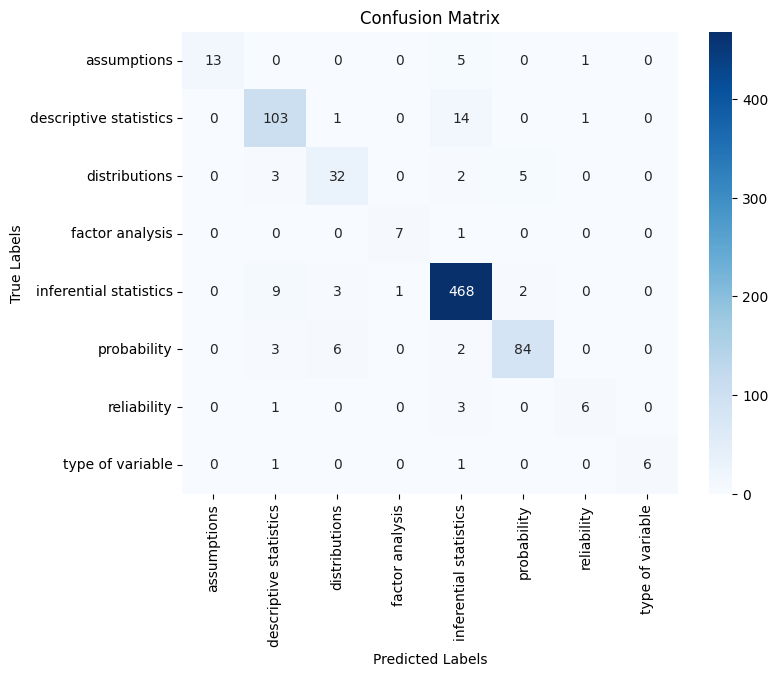

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Use trainer to get predictions and labels
output = final_trainer.predict(test_dataset)

# Extract predictions and labels
predicted_labels = output.predictions.argmax(axis=-1)
true_labels = output.label_ids

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create reverse mapping from numeric labels to original class names
reverse_mapping = {v: k for k, v in label_mapping.items()}

# Use original class names sorted by label index for axis labels
class_names = [reverse_mapping[i] for i in range(len(label_mapping))]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## 2.3 Second-Level

In [ ]:
# Filtering questions which second level were different for the same question
df_mbert = df_mbert[df_mbert['mixed_second_level']==False]
df_mbert.shape

(3785, 28)

### Inferential Statistics

In [ ]:
df_inf = df_mbert[df_mbert['first_level'] == 'inferential statistics']
df_inf.shape

(2321, 28)

In [ ]:
value_counts = df_inf['second_level'].value_counts()
value_counts

second_level
parametric techniques        803
regression                   669
nhst                         421
non-parametric techniques    121
sampling distributions       104
confidence intervals          89
effect size                   32
bayesian statistics           24
multilevel analysis            9
bootstrap                      1
Name: count, dtype: int64

In [ ]:
df_inf = df_inf.dropna(subset=['second_level'])
#remove bootstrap
df_inf = df_inf[df_inf['second_level'] != 'bootstrap']
df_inf.shape

(2272, 28)

In [ ]:
value_counts = df_inf['split'].value_counts(normalize=True) * 100
print(value_counts)

split
train    72.095070
test     19.938380
val       7.966549
Name: proportion, dtype: float64


In [ ]:
df_inf_train = df_inf[df_inf['split'] == 'train']
df_inf_val   = df_inf[df_inf['split'] == 'val']
df_inf_test  = df_inf[df_inf['split'] == 'test']

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_inf_train['label'] = label_encoder.fit_transform(df_inf_train['second_level'])
df_inf_val['label'] = label_encoder.transform(df_inf_val['second_level'])
df_inf_test['label'] = label_encoder.transform(df_inf_test['second_level'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'bayesian statistics': 0, 'confidence intervals': 1, 'effect size': 2, 'multilevel analysis': 3, 'nhst': 4, 'non-parametric techniques': 5, 'parametric techniques': 6, 'regression': 7, 'sampling distributions': 8}


<ipython-input-58-19198e31bd77>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf_train['label'] = label_encoder.fit_transform(df_inf_train['second_level'])
<ipython-input-58-19198e31bd77>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf_val['label'] = label_encoder.transform(df_inf_val['second_level'])
<ipython-input-58-19198e31bd77>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [ ]:
# Prepare the text column
df_inf_train['text'] = df_inf_train['question_cleaned']
df_inf_val['text'] = df_inf_val['question_cleaned']
df_inf_test['text'] = df_inf_test['question_cleaned']

# Hugging Face datasets
train_dataset = Dataset.from_pandas(df_inf_train[['text', 'label']].reset_index(drop=True))
val_dataset = Dataset.from_pandas(df_inf_val[['text', 'label']].reset_index(drop=True))
test_dataset = Dataset.from_pandas(df_inf_test[['text', 'label']].reset_index(drop=True))

# Load tokenizer and model
from transformers import BertTokenizer, BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased",
    num_labels=len(df_inf_train['label'].unique())
)

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples['text'], padding=True, truncation=True)

# Tokenize datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Move model to device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

<ipython-input-59-14058c7a5f28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf_train['text'] = df_inf_train['question_cleaned']
<ipython-input-59-14058c7a5f28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf_val['text'] = df_inf_val['question_cleaned']
<ipython-input-59-14058c7a5f28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

Map:   0%|          | 0/1638 [00:00<?, ? examples/s]

Map:   0%|          | 0/181 [00:00<?, ? examples/s]

Map:   0%|          | 0/453 [00:00<?, ? examples/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

Trials without accounting for data imbalance (not used)

In [ ]:
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define the training arguments
training_args = TrainingArguments(
    output_dir="./results",              # Directory to save model and logs
    num_train_epochs=5,                  # Number of training epochs
    per_device_train_batch_size=8,       # Batch size for training
    per_device_eval_batch_size=8,        # Batch size for evaluation
    warmup_steps=200,                    # Number of steps for warmup
    weight_decay=0.01,                   # Weight decay for optimization
    logging_dir="./logs",                # Directory for logs
    logging_steps=200,                   # Frequency of logging
    eval_strategy="epoch",         # Evaluate after every epoch
    save_strategy="epoch",               # Save checkpoint after every epoch
    load_best_model_at_end=True,        # Load the best model based on validation loss
    metric_for_best_model="macro_f1",
    greater_is_better=True
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    # Calculate accuracy
    accuracy = accuracy_score(labels, preds)
    # Calculate precision, recall, and F1 for each class
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average=None)
    # Calculate macro averages
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    # Create a dictionary with all metrics
    results = {
        'accuracy': accuracy,
        'macro_precision': macro_precision,
        'macro_recall': macro_recall,
        'macro_f1': macro_f1
    }

    # Add per-class metrics
    for i in range(len(precision)):
        results[f'precision_class_{i}'] = precision[i]
        results[f'recall_class_{i}'] = recall[i]
        results[f'f1_class_{i}'] = f1[i]
    return results

# Set up the Trainer
trainer = Trainer(
    model=model,
    args=training_args,                  # Training arguments
    train_dataset=train_dataset,         # Training dataset
    eval_dataset=val_dataset,           # Validation dataset
    tokenizer=tokenizer,                 # Tokenizer for encoding and decoding
    compute_metrics=compute_metrics
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-61-ec20d2c4e82b>:47: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# Start training
trainer.train()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

TrainOutput(global_step=1025, training_loss=0.6158868668719036, metrics={'train_runtime': 193.9037, 'train_samples_per_second': 42.237, 'train_steps_per_second': 5.286, 'total_flos': 1961924550529680.0, 'train_loss': 0.6158868668719036, 'epoch': 5.0})

In [ ]:
## WITH 5 EPOCH
from sklearn.metrics import classification_report

# Get predictions on test dataset
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

# Create reverse mapping from numeric labels to original class names
reverse_mapping = {v: k for k, v in label_mapping.items()}

# Use the original class names as target names
target_names = [reverse_mapping[i] for i in range(len(label_mapping))]

# Print classification report with original class names
print(classification_report(labels, preds, target_names=target_names, digits=4))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                           precision    recall  f1-score   support

      bayesian statistics     0.7500    0.7500    0.7500         4
     confidence intervals     0.7647    1.0000    0.8667        13
              effect size     0.0000    0.0000    0.0000        11
      multilevel analysis     0.0000    0.0000    0.0000         2
                     nhst     0.8384    0.8925    0.8646        93
non-parametric techniques     1.0000    0.9500    0.9744        20
    parametric techniques     0.9048    0.8994    0.9021       169
               regression     0.8971    0.9457    0.9208       129
   sampling distributions     0.7000    0.5833    0.6364        12

                 accuracy                         0.8808       453
                macro avg     0.6505    0.6690    0.6572       453
             weighted avg     0.8564    0.8808    0.8676       453



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Dealing with class imbalance

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

# Compute alpha per class (inverse frequency)
train_labels = df_inf_train['label'].values
classes = np.unique(train_labels)

alpha_values = compute_class_weight(class_weight='balanced', classes=classes, y=train_labels)

# Convert to tensor and normalize (optional but recommended)
alpha = torch.tensor(alpha_values, dtype=torch.float)
alpha = alpha / alpha.sum()  # normalize to sum to 1
alpha = alpha.to(device)

In [ ]:
import torch.nn.functional as F
import torch.nn as nn

def focal_loss(logits, labels, alpha=1.0, gamma=2.0):
    ce_loss = F.cross_entropy(logits, labels, reduction='none')  # shape: (batch,)
    pt = torch.exp(-ce_loss)
    focal = alpha * (1 - pt) ** gamma * ce_loss
    return focal.mean()

In [ ]:
import torch.nn.functional as F
import torch.nn as nn

class FocalLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):  # <-- add **kwargs
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        # Compute softmax probabilities
        probs = F.softmax(logits, dim=1)
        log_probs = F.log_softmax(logits, dim=1)

        gamma = 2.0  # focusing parameter
        at = alpha[labels]  # alpha_t per sample
        pt = probs[range(len(labels)), labels]  # p_t for the correct class

        # Compute focal loss
        focal_loss = -at * (1 - pt) ** gamma * log_probs[range(len(labels)), labels]

        loss = focal_loss.mean()

        return (loss, outputs) if return_outputs else loss

In [ ]:
# Compute metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average=None)
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

    results = {
        'accuracy': accuracy,
        'macro_precision': macro_precision,
        'macro_recall': macro_recall,
        'macro_f1': macro_f1
    }

    for i in range(len(precision)):
        results[f'precision_class_{i}'] = precision[i]
        results[f'recall_class_{i}'] = recall[i]
        results[f'f1_class_{i}'] = f1[i]
    return results

# Base training arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="no",
    save_strategy="no",
    weight_decay=0.01,
    warmup_steps=200,
    logging_dir="./logs",
    logging_steps=200,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True
)

import optuna
from transformers import TrainerCallback

# Define objective function for Optuna
def model_init():
    return BertForSequenceClassification.from_pretrained(
        "bert-base-multilingual-cased",
        num_labels=len(df_inf_train['label'].unique())
    )

def optuna_hp_space(trial):
     return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 4, 8),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32])
    }

class OptunaCallback(TrainerCallback):
    def on_trial_end(self, args, state, control, trial=None, **kwargs):
        print(f"Trial {trial.number} finished with value: {trial.value} and params: {trial.params}")

# Run hyperparameter search
trainer = FocalLossTrainer(
    model_init=model_init,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

best_trial = trainer.hyperparameter_search(
    direction="maximize",
    hp_space=optuna_hp_space,
    n_trials=10,
    backend="optuna"
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-64-75a497d36a68>:59: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `FocalLossTrainer.__init__`. Use `processing_class` instead.
  trainer = FocalLossTrainer(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[I 2025-05-29 09:22:00,472] A new study created in memory with name: no-name-ce4185b7-6849-40cf-a391-d6ae4a1295ec
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'c

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 09:26:33,549] Trial 0 finished with value: 20.83154592042999 and parameters: {'learning_rate': 1.381768983261649e-05, 'num_train_epochs': 8, 'per_device_train_batch_size': 8}. Best is trial 0 with value: 20.83154592042999.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 09:30:26,395] Trial 1 finished with value: 19.794991079437622 and parameters: {'learning_rate': 1.6515488856886365e-05, 'num_train_epochs': 8, 'per_device_train_batch_size': 32}. Best is trial 0 with value: 20.83154592042999.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased a

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 09:34:19,057] Trial 2 finished with value: 21.094883308928416 and parameters: {'learning_rate': 1.124763722023984e-05, 'num_train_epochs': 8, 'per_device_train_batch_size': 32}. Best is trial 2 with value: 21.094883308928416.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased a

[I 2025-05-29 09:37:44,196] Trial 3 finished with value: 26.931104408878646 and parameters: {'learning_rate': 1.0623511836488394e-05, 'num_train_epochs': 6, 'per_device_train_batch_size': 8}. Best is trial 3 with value: 26.931104408878646.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 09:42:16,531] Trial 4 finished with value: 21.04694819266264 and parameters: {'learning_rate': 4.6631293792500806e-05, 'num_train_epochs': 8, 'per_device_train_batch_size': 8}. Best is trial 3 with value: 26.931104408878646.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased an

[I 2025-05-29 09:44:34,378] Trial 5 finished with value: 22.669343819218014 and parameters: {'learning_rate': 1.2880800201353374e-05, 'num_train_epochs': 4, 'per_device_train_batch_size': 8}. Best is trial 3 with value: 26.931104408878646.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2025-05-29 09:47:01,036] Trial 6 finished with value: 23.434710535407387 and parameters: {'learning_rate': 3.233878900684586e-05, 'num_train_epochs': 5, 'per_device_train_batch_size': 32}. Best is trial 3 with value: 26.931104408878646.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2025-05-29 09:49:18,921] Trial 7 finished with value: 22.668977492932164 and parameters: {'learning_rate': 1.4480587178561104e-05, 'num_train_epochs': 4, 'per_device_train_batch_size': 8}. Best is trial 3 with value: 26.931104408878646.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2025-05-29 09:51:16,888] Trial 8 finished with value: 21.596138436285766 and parameters: {'learning_rate': 2.7939098927801038e-05, 'num_train_epochs': 4, 'per_device_train_batch_size': 32}. Best is trial 3 with value: 26.931104408878646.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 09:54:22,598] Trial 9 finished with value: 20.145969630561915 and parameters: {'learning_rate': 1.2458559482991621e-05, 'num_train_epochs': 6, 'per_device_train_batch_size': 16}. Best is trial 3 with value: 26.931104408878646.


In [ ]:
# Update training args with best hyperparameters
best_args = training_args
best_args.learning_rate = best_trial.hyperparameters["learning_rate"]
best_args.per_device_train_batch_size = best_trial.hyperparameters["per_device_train_batch_size"]
best_args.num_train_epochs = best_trial.hyperparameters["num_train_epochs"]

In [ ]:
# Final trainer with best hyperparameters
final_trainer = FocalLossTrainer(
    model_init=model_init,
    args=best_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train final model
final_trainer.train()

<ipython-input-66-abcd1bf7c026>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `FocalLossTrainer.__init__`. Use `processing_class` instead.
  final_trainer = FocalLossTrainer(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TrainOutput(global_step=1230, training_loss=0.013386593934724002, metrics={'train_runtime': 201.6662, 'train_samples_per_second': 48.734, 'train_steps_per_second': 6.099, 'total_flos': 2354013442094688.0, 'train_loss': 0.013386593934724002, 'epoch': 6.0})

In [ ]:
from sklearn.metrics import classification_report

# Get predictions on test dataset
predictions = final_trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

# Create reverse mapping from numeric labels to original class names
reverse_mapping = {v: k for k, v in label_mapping.items()}

# Use the original class names as target names
target_names = [reverse_mapping[i] for i in range(len(label_mapping))]

# Print classification report with original class names
print(classification_report(labels, preds, target_names=target_names, digits=4))

                           precision    recall  f1-score   support

      bayesian statistics     1.0000    0.7500    0.8571         4
     confidence intervals     0.6000    0.9231    0.7273        13
              effect size     0.5333    0.7273    0.6154        11
      multilevel analysis     0.3333    0.5000    0.4000         2
                     nhst     0.7212    0.8065    0.7614        93
non-parametric techniques     1.0000    0.9000    0.9474        20
    parametric techniques     0.8521    0.7160    0.7781       169
               regression     0.8779    0.8915    0.8846       129
   sampling distributions     0.5294    0.7500    0.6207        12

                 accuracy                         0.7991       453
                macro avg     0.7164    0.7738    0.7324       453
             weighted avg     0.8146    0.7991    0.8019       453



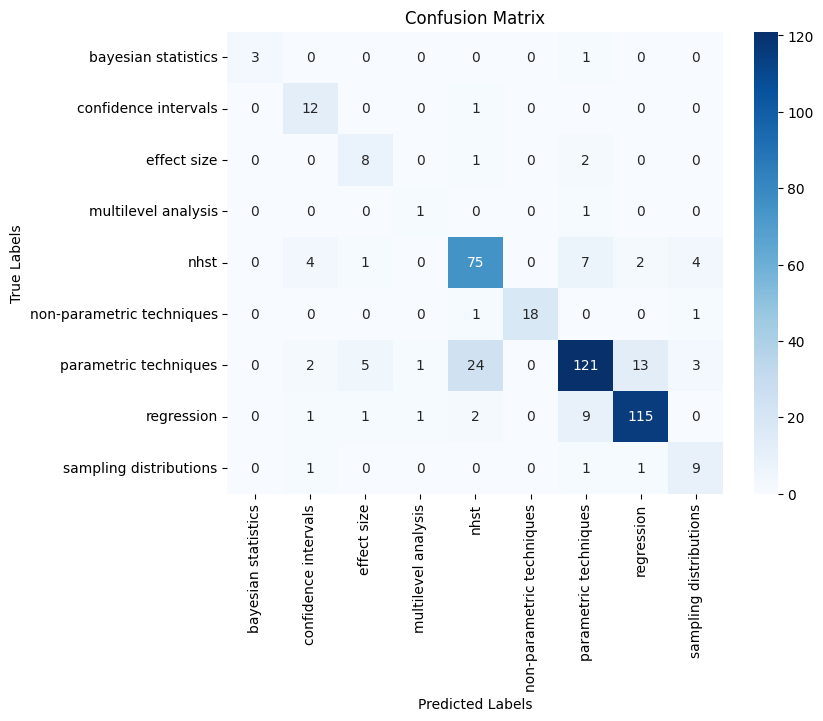

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Use trainer to get predictions and labels
output = final_trainer.predict(test_dataset)

# Extract predictions and labels
predicted_labels = output.predictions.argmax(axis=-1)
true_labels = output.label_ids

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create reverse mapping from numeric labels to original class names
reverse_mapping = {v: k for k, v in label_mapping.items()}

# Use original class names sorted by label index for axis labels
class_names = [reverse_mapping[i] for i in range(len(label_mapping))]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Descriptive Statistics

In [ ]:
df_des = df_mbert[df_mbert['first_level'] == 'descriptive statistics']
df_des.shape

(561, 28)

In [ ]:
df_des = df_des.dropna(subset=['second_level'])
df_des.shape

(538, 28)

In [ ]:
value_counts = df_des['second_level'].value_counts()
value_counts

second_level
summary statistics      399
data representation      99
score interpretation     40
Name: count, dtype: int64

In [ ]:
value_counts = df_des['split'].value_counts(normalize=True) * 100
print(value_counts)

split
train    71.747212
test     20.260223
val       7.992565
Name: proportion, dtype: float64


In [ ]:
df_des_train = df_des[df_des['split'] == 'train']
df_des_val   = df_des[df_des['split'] == 'val']
df_des_test  = df_des[df_des['split'] == 'test']

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_des_train['label'] = label_encoder.fit_transform(df_des_train['second_level'])
df_des_val['label'] = label_encoder.transform(df_des_val['second_level'])
df_des_test['label'] = label_encoder.transform(df_des_test['second_level'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'data representation': 0, 'score interpretation': 1, 'summary statistics': 2}


<ipython-input-73-78edeb559d36>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf_train['label'] = label_encoder.fit_transform(df_inf_train['second_level'])
<ipython-input-73-78edeb559d36>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf_val['label'] = label_encoder.transform(df_inf_val['second_level'])
<ipython-input-73-78edeb559d36>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [ ]:
# Prepare the text column
df_des_train['text'] = df_des_train['question_cleaned']
df_des_val['text'] = df_des_val['question_cleaned']
df_des_test['text'] = df_des_test['question_cleaned']

# Hugging Face datasets
train_dataset = Dataset.from_pandas(df_des_train[['text', 'label']].reset_index(drop=True))
val_dataset = Dataset.from_pandas(df_des_val[['text', 'label']].reset_index(drop=True))
test_dataset = Dataset.from_pandas(df_des_test[['text', 'label']].reset_index(drop=True))

# Load tokenizer and model
from transformers import BertTokenizer, BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased",
    num_labels=len(df_des_train['label'].unique())
)

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples['text'], padding=True, truncation=True)

# Tokenize datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Move model to device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

<ipython-input-74-14058c7a5f28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf_train['text'] = df_inf_train['question_cleaned']
<ipython-input-74-14058c7a5f28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf_val['text'] = df_inf_val['question_cleaned']
<ipython-input-74-14058c7a5f28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

Map:   0%|          | 0/386 [00:00<?, ? examples/s]

Map:   0%|          | 0/43 [00:00<?, ? examples/s]

Map:   0%|          | 0/109 [00:00<?, ? examples/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [ ]:
import optuna
from transformers import Trainer, TrainingArguments, BertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Tokenizer and datasets already defined above

# Define metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average=None)
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

    results = {
        'accuracy': accuracy,
        'macro_precision': macro_precision,
        'macro_recall': macro_recall,
        'macro_f1': macro_f1
    }

    for i in range(len(precision)):
        results[f'precision_class_{i}'] = precision[i]
        results[f'recall_class_{i}'] = recall[i]
        results[f'f1_class_{i}'] = f1[i]
    return results

# Model initialization for Trainer
def model_init():
    return BertForSequenceClassification.from_pretrained(
        "bert-base-multilingual-cased",
        num_labels=len(df_inf_train['label'].unique())
    )

# Hyperparameter space
def hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 2e-5, 5e-5, log=True),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 3, 7),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32])
    }

# Base training arguments
training_args = TrainingArguments(
    output_dir="./second_level_results",
    eval_strategy="epoch",
    save_strategy="epoch",
    weight_decay=0.01,
    warmup_steps=200,
    logging_dir="./second_level_logs",
    logging_steps=200,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    report_to="none"
)

# Trainer
trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Hyperparameter search
best_run = trainer.hyperparameter_search(
    direction="maximize",
    n_trials=10,
    hp_space=hp_space,
    backend="optuna"
)

print("Best run:", best_run)

<ipython-input-75-9a329a53bece>:59: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[I 2025-05-29 09:59:56,405] A new study created in memory with name: no-name-58157280-044b-414c-9e39-e7fb672d8365
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Best run: BestRun(run_id='1', objective=8.565110712223078, hyperparameters={'learning_rate': 2.0953751850338844e-05, 'num_train_epochs': 5, 'per_device_train_batch_size': 16}, run_summary=None)


In [ ]:
# Final training with best hyperparameters
best_training_args = TrainingArguments(
    output_dir="./second_level_best_results",
    eval_strategy="epoch",
    save_strategy="epoch",
    weight_decay=0.01,
    warmup_steps=200,
    logging_dir="./second_level_logs",
    logging_steps=200,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    learning_rate=best_run.hyperparameters["learning_rate"],
    per_device_train_batch_size=best_run.hyperparameters["per_device_train_batch_size"],
    num_train_epochs=best_run.hyperparameters["num_train_epochs"],
    report_to="none"
)

final_trainer = Trainer(
    model_init=model_init,
    args=best_training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Final training
final_trainer.train()

<ipython-input-76-42cebc1313cd>:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  final_trainer = Trainer(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

TrainOutput(global_step=125, training_loss=0.6802930297851563, metrics={'train_runtime': 53.8977, 'train_samples_per_second': 35.809, 'train_steps_per_second': 2.319, 'total_flos': 344159544895740.0, 'train_loss': 0.6802930297851563, 'epoch': 5.0})

In [ ]:
## WITH 5 EPOCH
from sklearn.metrics import classification_report

# Get predictions on test dataset
predictions = final_trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

# Create reverse mapping from numeric labels to original class names
reverse_mapping = {v: k for k, v in label_mapping.items()}

# Use the original class names as target names
target_names = [reverse_mapping[i] for i in range(len(label_mapping))]

# Print classification report with original class names
print(classification_report(labels, preds, target_names=target_names, digits=4))

                      precision    recall  f1-score   support

 data representation     0.7200    0.9474    0.8182        19
score interpretation     1.0000    0.7500    0.8571         8
  summary statistics     0.9615    0.9146    0.9375        82

            accuracy                         0.9083       109
           macro avg     0.8938    0.8707    0.8709       109
        weighted avg     0.9223    0.9083    0.9108       109



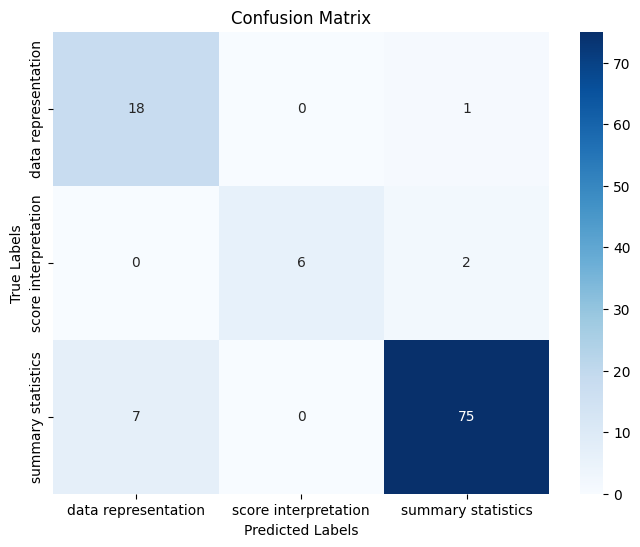

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Use trainer to get predictions and labels
output = final_trainer.predict(test_dataset)

# Extract predictions and labels
predicted_labels = output.predictions.argmax(axis=-1)
true_labels = output.label_ids

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create reverse mapping from numeric labels to original class names
reverse_mapping = {v: k for k, v in label_mapping.items()}

# Use original class names sorted by label index for axis labels
class_names = [reverse_mapping[i] for i in range(len(label_mapping))]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Probability

In [ ]:
df_prob = df_mbert[df_mbert['first_level'] == 'probability']
df_prob.shape

(475, 28)

In [ ]:
df_prob = df_prob.dropna(subset=['second_level'])
df_prob.shape

(384, 28)

In [ ]:
value_counts = df_prob['second_level'].value_counts()
value_counts

second_level
general rules              167
random variables           121
sample space                42
conditional probability     38
events                      16
Name: count, dtype: int64

In [ ]:
df_prob_train = df_prob[df_prob['split'] == 'train']
df_prob_val   = df_prob[df_prob['split'] == 'val']
df_prob_test  = df_prob[df_prob['split'] == 'test']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_prob_train['label'] = label_encoder.fit_transform(df_prob_train['second_level'])
df_prob_val['label'] = label_encoder.transform(df_prob_val['second_level'])
df_prob_test['label'] = label_encoder.transform(df_prob_test['second_level'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'conditional probability': np.int64(0), 'events': np.int64(1), 'general rules': np.int64(2), 'random variables': np.int64(3), 'sample space': np.int64(4)}


<ipython-input-81-5a51da4240b0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prob_train['label'] = label_encoder.fit_transform(df_prob_train['second_level'])
<ipython-input-81-5a51da4240b0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prob_val['label'] = label_encoder.transform(df_prob_val['second_level'])
<ipython-input-81-5a51da4240b0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [ ]:
# Prepare the text column
df_prob_train['text'] = df_prob_train['question_cleaned']
df_prob_val['text'] = df_prob_val['question_cleaned']
df_prob_test['text'] = df_prob_test['question_cleaned']

# Hugging Face datasets
train_dataset = Dataset.from_pandas(df_prob_train[['text', 'label']].reset_index(drop=True))
val_dataset = Dataset.from_pandas(df_prob_val[['text', 'label']].reset_index(drop=True))
test_dataset = Dataset.from_pandas(df_prob_test[['text', 'label']].reset_index(drop=True))

# Load tokenizer and model
from transformers import BertTokenizer, BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased",
    num_labels=len(df_prob_train['label'].unique())
)

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples['text'], padding=True, truncation=True)

# Tokenize datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Move model to device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

<ipython-input-82-14058c7a5f28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf_train['text'] = df_inf_train['question_cleaned']
<ipython-input-82-14058c7a5f28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf_val['text'] = df_inf_val['question_cleaned']
<ipython-input-82-14058c7a5f28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

Map:   0%|          | 0/278 [00:00<?, ? examples/s]

Map:   0%|          | 0/30 [00:00<?, ? examples/s]

Map:   0%|          | 0/76 [00:00<?, ? examples/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

Trial without account for class imbalance (not used)

In [ ]:
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define the training arguments
training_args = TrainingArguments(
    output_dir="./results",              # Directory to save model and logs
    num_train_epochs=7,                  # Number of training epochs
    per_device_train_batch_size=8,       # Batch size for training
    per_device_eval_batch_size=8,        # Batch size for evaluation
    warmup_steps=200,                    # Number of steps for warmup
    weight_decay=0.01,                   # Weight decay for optimization
    logging_dir="./logs",                # Directory for logs
    logging_steps=200,                   # Frequency of logging
    eval_strategy="epoch",         # Evaluate after every epoch
    save_strategy="epoch",               # Save checkpoint after every epoch
    load_best_model_at_end=True,        # Load the best model based on validation loss
    metric_for_best_model="macro_f1",
    greater_is_better=True
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    # Calculate accuracy
    accuracy = accuracy_score(labels, preds)
    # Calculate precision, recall, and F1 for each class
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average=None)
    # Calculate macro averages
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    # Create a dictionary with all metrics
    results = {
        'accuracy': accuracy,
        'macro_precision': macro_precision,
        'macro_recall': macro_recall,
        'macro_f1': macro_f1
    }

    # Add per-class metrics
    for i in range(len(precision)):
        results[f'precision_class_{i}'] = precision[i]
        results[f'recall_class_{i}'] = recall[i]
        results[f'f1_class_{i}'] = f1[i]
    return results

# Set up the Trainer
trainer = Trainer(
    model=model,
    args=training_args,                  # Training arguments
    train_dataset=train_dataset,         # Training dataset
    eval_dataset=val_dataset,           # Validation dataset
    tokenizer=tokenizer,                 # Tokenizer for encoding and decoding
    compute_metrics=compute_metrics
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-73-faf99a4573de>:47: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# Start training
trainer.train()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

TrainOutput(global_step=245, training_loss=0.9096507091911472, metrics={'train_runtime': 50.0039, 'train_samples_per_second': 38.917, 'train_steps_per_second': 4.9, 'total_flos': 198010791477576.0, 'train_loss': 0.9096507091911472, 'epoch': 7.0})

In [ ]:
from sklearn.metrics import classification_report

# Get predictions on test dataset
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

# Create reverse mapping from numeric labels to original class names
reverse_mapping = {v: k for k, v in label_mapping.items()}

# Use the original class names as target names
target_names = [reverse_mapping[i] for i in range(len(label_mapping))]

# Print classification report with original class names
print(classification_report(labels, preds, target_names=target_names, digits=4))

                         precision    recall  f1-score   support

conditional probability     0.2500    1.0000    0.4000         4
                 events     0.6667    0.4000    0.5000         5
          general rules     0.9130    0.6562    0.7636        32
       random variables     0.7931    0.8519    0.8214        27
           sample space     1.0000    0.6250    0.7692         8

               accuracy                         0.7237        76
              macro avg     0.7246    0.7066    0.6509        76
           weighted avg     0.8285    0.7237    0.7483        76



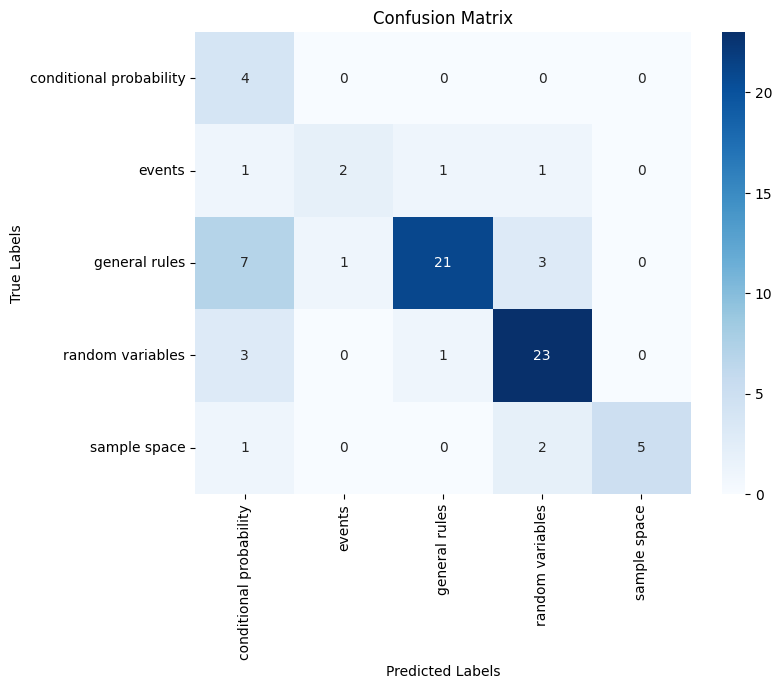

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Use trainer to get predictions and labels
output = trainer.predict(test_dataset)

# Extract predictions and labels
predicted_labels = output.predictions.argmax(axis=-1)
true_labels = output.label_ids

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create reverse mapping from numeric labels to original class names
reverse_mapping = {v: k for k, v in label_mapping.items()}

# Use original class names sorted by label index for axis labels
class_names = [reverse_mapping[i] for i in range(len(label_mapping))]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Dealing with class imbalance

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

# Compute alpha per class (inverse frequency)
train_labels = df_inf_train['label'].values
classes = np.unique(train_labels)

alpha_values = compute_class_weight(class_weight='balanced', classes=classes, y=train_labels)

# Convert to tensor and normalize (optional but recommended)
alpha = torch.tensor(alpha_values, dtype=torch.float)
alpha = alpha / alpha.sum()  # normalize to sum to 1
alpha = alpha.to(device)

In [ ]:
import torch.nn.functional as F
import torch.nn as nn

def focal_loss(logits, labels, alpha=1.0, gamma=2.0):
    ce_loss = F.cross_entropy(logits, labels, reduction='none')  # shape: (batch,)
    pt = torch.exp(-ce_loss)
    focal = alpha * (1 - pt) ** gamma * ce_loss
    return focal.mean()

In [ ]:
import torch.nn.functional as F
import torch.nn as nn

class FocalLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):  # <-- add **kwargs
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        # Compute softmax probabilities
        probs = F.softmax(logits, dim=1)
        log_probs = F.log_softmax(logits, dim=1)

        gamma = 2.0  # focusing parameter
        at = alpha[labels]  # alpha_t per sample
        pt = probs[range(len(labels)), labels]  # p_t for the correct class

        # Compute focal loss
        focal_loss = -at * (1 - pt) ** gamma * log_probs[range(len(labels)), labels]

        loss = focal_loss.mean()

        return (loss, outputs) if return_outputs else loss

In [ ]:
# Compute metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average=None)
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

    results = {
        'accuracy': accuracy,
        'macro_precision': macro_precision,
        'macro_recall': macro_recall,
        'macro_f1': macro_f1
    }

    for i in range(len(precision)):
        results[f'precision_class_{i}'] = precision[i]
        results[f'recall_class_{i}'] = recall[i]
        results[f'f1_class_{i}'] = f1[i]
    return results

# Base training arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="no",
    save_strategy="no",
    weight_decay=0.01,
    warmup_steps=200,
    logging_dir="./logs",
    logging_steps=200,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    report_to="none"  # replaces WANDB_DISABLED
)

import optuna
from transformers import TrainerCallback

# Define objective function for Optuna
def model_init():
    return BertForSequenceClassification.from_pretrained(
        "bert-base-multilingual-cased",
        num_labels=len(df_inf_train['label'].unique())
    )

def optuna_hp_space(trial):
     return {
        "learning_rate": trial.suggest_float("learning_rate", 2e-5, 5e-5, log=True),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 4, 8),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8, 16])
    }

class OptunaCallback(TrainerCallback):
    def on_trial_end(self, args, state, control, trial=None, **kwargs):
        print(f"Trial {trial.number} finished with value: {trial.value} and params: {trial.params}")

# Run hyperparameter search
trainer = FocalLossTrainer(
    model_init=model_init,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

best_trial = trainer.hyperparameter_search(
    direction="maximize",
    hp_space=optuna_hp_space,
    n_trials=20,
    backend="optuna"
)

<ipython-input-95-0c7fe998e0f4>:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `FocalLossTrainer.__init__`. Use `processing_class` instead.
  trainer = FocalLossTrainer(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[I 2025-05-29 10:31:39,305] A new study created in memory with name: no-name-62610ac6-5648-4deb-96e6-0a1723a3bf36
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 10:31:53,737] Trial 0 finished with value: 7.060952380952381 and parameters: {'learning_rate': 2.375725715740905e-05, 'num_train_epochs': 5, 'per_device_train_batch_size': 16}. Best is trial 0 with value: 7.060952380952381.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 10:32:13,135] Trial 1 finished with value: 8.91467787114846 and parameters: {'learning_rate': 4.483853824274383e-05, 'num_train_epochs': 6, 'per_device_train_batch_size': 8}. Best is trial 1 with value: 8.91467787114846.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and ar

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 10:32:25,010] Trial 2 finished with value: 8.335789827094175 and parameters: {'learning_rate': 4.172701504679509e-05, 'num_train_epochs': 4, 'per_device_train_batch_size': 16}. Best is trial 1 with value: 8.91467787114846.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and 

[I 2025-05-29 10:32:38,863] Trial 3 finished with value: 8.314285714285715 and parameters: {'learning_rate': 3.317378315603609e-05, 'num_train_epochs': 4, 'per_device_train_batch_size': 8}. Best is trial 1 with value: 8.91467787114846.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 10:33:03,879] Trial 4 finished with value: 8.89047619047619 and parameters: {'learning_rate': 4.668893807358215e-05, 'num_train_epochs': 8, 'per_device_train_batch_size': 8}. Best is trial 1 with value: 8.91467787114846.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and ar

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 10:33:20,583] Trial 5 finished with value: 7.763918888129416 and parameters: {'learning_rate': 3.527334316323116e-05, 'num_train_epochs': 6, 'per_device_train_batch_size': 16}. Best is trial 1 with value: 8.91467787114846.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 10:33:45,602] Trial 6 finished with value: 11.187211529773199 and parameters: {'learning_rate': 3.5191216831955246e-05, 'num_train_epochs': 8, 'per_device_train_batch_size': 8}. Best is trial 6 with value: 11.187211529773199.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased a

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 10:33:57,470] Trial 7 finished with value: 6.139687358814493 and parameters: {'learning_rate': 2.7172360625277243e-05, 'num_train_epochs': 4, 'per_device_train_batch_size': 16}. Best is trial 6 with value: 11.187211529773199.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased a

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 10:34:16,791] Trial 8 finished with value: 6.624909600203718 and parameters: {'learning_rate': 2.859799254513115e-05, 'num_train_epochs': 6, 'per_device_train_batch_size': 8}. Best is trial 6 with value: 11.187211529773199.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and

[I 2025-05-29 10:34:30,409] Trial 9 finished with value: 5.74926406926407 and parameters: {'learning_rate': 2.028726356037741e-05, 'num_train_epochs': 4, 'per_device_train_batch_size': 8}. Best is trial 6 with value: 11.187211529773199.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 10:34:55,430] Trial 10 finished with value: 7.510476190476189 and parameters: {'learning_rate': 3.780030283331799e-05, 'num_train_epochs': 8, 'per_device_train_batch_size': 8}. Best is trial 6 with value: 11.187211529773199.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased an

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 10:35:18,062] Trial 11 finished with value: 8.726666666666667 and parameters: {'learning_rate': 4.934517963893533e-05, 'num_train_epochs': 7, 'per_device_train_batch_size': 8}. Best is trial 6 with value: 11.187211529773199.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased an

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 10:35:40,224] Trial 12 finished with value: 9.256917748917749 and parameters: {'learning_rate': 3.98776824098358e-05, 'num_train_epochs': 7, 'per_device_train_batch_size': 8}. Best is trial 6 with value: 11.187211529773199.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 10:36:02,425] Trial 13 finished with value: 7.4682352941176475 and parameters: {'learning_rate': 3.958055099556967e-05, 'num_train_epochs': 7, 'per_device_train_batch_size': 8}. Best is trial 6 with value: 11.187211529773199.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased a

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 10:36:25,117] Trial 14 finished with value: 6.169924812030075 and parameters: {'learning_rate': 3.069314042421299e-05, 'num_train_epochs': 7, 'per_device_train_batch_size': 8}. Best is trial 6 with value: 11.187211529773199.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased an

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 10:36:50,166] Trial 15 finished with value: 9.97452380952381 and parameters: {'learning_rate': 3.5437494597097354e-05, 'num_train_epochs': 8, 'per_device_train_batch_size': 8}. Best is trial 6 with value: 11.187211529773199.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased an

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 10:37:15,190] Trial 16 finished with value: 8.102296918767507 and parameters: {'learning_rate': 3.3992466100084204e-05, 'num_train_epochs': 8, 'per_device_train_batch_size': 8}. Best is trial 6 with value: 11.187211529773199.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased a

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 10:37:40,229] Trial 17 finished with value: 9.229915966386553 and parameters: {'learning_rate': 2.6257527556532435e-05, 'num_train_epochs': 8, 'per_device_train_batch_size': 8}. Best is trial 6 with value: 11.187211529773199.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased a

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 10:38:01,716] Trial 18 finished with value: 6.628851540616247 and parameters: {'learning_rate': 3.0617560658870006e-05, 'num_train_epochs': 8, 'per_device_train_batch_size': 16}. Best is trial 6 with value: 11.187211529773199.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 10:38:18,160] Trial 19 finished with value: 6.111552410437859 and parameters: {'learning_rate': 3.657604141719459e-05, 'num_train_epochs': 5, 'per_device_train_batch_size': 8}. Best is trial 6 with value: 11.187211529773199.


In [ ]:
# Define the training arguments
training_args = TrainingArguments(
    output_dir="./results",              # Directory to save model and logs
    warmup_steps=200,                    # Number of steps for warmup
    weight_decay=0.01,                   # Weight decay for optimization
    logging_dir="./logs",                # Directory for logs
    logging_steps=200,                   # Frequency of logging
    eval_strategy="epoch",         # Evaluate after every epoch
    save_strategy="epoch",               # Save checkpoint after every epoch
    load_best_model_at_end=True,        # Load the best model based on validation loss
    metric_for_best_model="macro_f1",
    greater_is_better=True
)

# Update training args with best hyperparameters
best_args = training_args
best_args.learning_rate = best_trial.hyperparameters["learning_rate"]
best_args.per_device_train_batch_size = best_trial.hyperparameters["per_device_train_batch_size"]
best_args.num_train_epochs = best_trial.hyperparameters["num_train_epochs"]

# Final trainer with best hyperparameters
final_trainer = FocalLossTrainer(
    model_init=model_init,
    args=best_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train final model
final_trainer.train()

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-96-2a348c7f9b82>:22: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `FocalLossTrainer.__init__`. Use `processing_class` instead.
  final_trainer = FocalLossTrainer(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predi

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

TrainOutput(global_step=280, training_loss=0.05478103799479348, metrics={'train_runtime': 66.5648, 'train_samples_per_second': 33.411, 'train_steps_per_second': 4.206, 'total_flos': 226298047402944.0, 'train_loss': 0.05478103799479348, 'epoch': 8.0})

In [ ]:
from sklearn.metrics import classification_report

# Get predictions on test dataset
predictions = final_trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

# Create reverse mapping from numeric labels to original class names
reverse_mapping = {v: k for k, v in label_mapping.items()}

# Use the original class names as target names
target_names = [reverse_mapping[i] for i in range(len(label_mapping))]

# Print classification report with original class names
print(classification_report(labels, preds, target_names=target_names, digits=4))

                         precision    recall  f1-score   support

conditional probability     0.3077    1.0000    0.4706         4
                 events     0.6667    0.4000    0.5000         5
          general rules     0.8182    0.8438    0.8308        32
       random variables     0.9500    0.7037    0.8085        27
           sample space     1.0000    0.8750    0.9333         8

               accuracy                         0.7763        76
              macro avg     0.7485    0.7645    0.7086        76
           weighted avg     0.8473    0.7763    0.7929        76



### Distribution

In [ ]:
df_dist = df_mbert[df_mbert['first_level'] == 'distributions']
df_dist.shape

(211, 28)

In [ ]:
df_dist = df_dist.dropna(subset=['second_level'])
df_dist.shape

(211, 28)

In [ ]:
value_counts = df_dist['second_level'].value_counts()
value_counts

second_level
continuous        160
discrete           34
limit theorems     17
Name: count, dtype: int64

In [ ]:
df_dist_train = df_dist[df_dist['split'] == 'train']
df_dist_val   = df_dist[df_dist['split'] == 'val']
df_dist_test  = df_dist[df_dist['split'] == 'test']

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_dist_train['label'] = label_encoder.fit_transform(df_dist_train['second_level'])
df_dist_val['label'] = label_encoder.transform(df_dist_val['second_level'])
df_dist_test['label'] = label_encoder.transform(df_dist_test['second_level'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

# Prepare the text column
df_dist_train['text'] = df_dist_train['question_cleaned']
df_dist_val['text'] = df_dist_val['question_cleaned']
df_dist_test['text'] = df_dist_test['question_cleaned']

# Hugging Face datasets
train_dataset = Dataset.from_pandas(df_dist_train[['text', 'label']].reset_index(drop=True))
val_dataset = Dataset.from_pandas(df_dist_val[['text', 'label']].reset_index(drop=True))
test_dataset = Dataset.from_pandas(df_dist_test[['text', 'label']].reset_index(drop=True))

# Load tokenizer and model
from transformers import BertTokenizer, BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased",
    num_labels=len(df_dist_train['label'].unique())
)

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples['text'], padding=True, truncation=True)

# Tokenize datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Move model to device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

<ipython-input-56-34837b90a673>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf_train['label'] = label_encoder.fit_transform(df_inf_train['second_level'])
<ipython-input-56-34837b90a673>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf_val['label'] = label_encoder.transform(df_inf_val['second_level'])
<ipython-input-56-34837b90a673>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

{'continuous': np.int64(0), 'discrete': np.int64(1), 'limit theorems': np.int64(2)}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/152 [00:00<?, ? examples/s]

Map:   0%|          | 0/17 [00:00<?, ? examples/s]

Map:   0%|          | 0/42 [00:00<?, ? examples/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

Trial without accounting for class imbalance (not used)

In [ ]:
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define the training arguments
training_args = TrainingArguments(
    output_dir="./results",              # Directory to save model and logs
    num_train_epochs=7,                  # Number of training epochs
    per_device_train_batch_size=8,       # Batch size for training
    per_device_eval_batch_size=8,        # Batch size for evaluation
    warmup_steps=200,                    # Number of steps for warmup
    weight_decay=0.01,                   # Weight decay for optimization
    logging_dir="./logs",                # Directory for logs
    logging_steps=200,                   # Frequency of logging
    eval_strategy="epoch",         # Evaluate after every epoch
    save_strategy="epoch",               # Save checkpoint after every epoch
    load_best_model_at_end=True,        # Load the best model based on validation loss
    metric_for_best_model="macro_f1",
    greater_is_better=True
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    # Calculate accuracy
    accuracy = accuracy_score(labels, preds)
    # Calculate precision, recall, and F1 for each class
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average=None)
    # Calculate macro averages
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    # Create a dictionary with all metrics
    results = {
        'accuracy': accuracy,
        'macro_precision': macro_precision,
        'macro_recall': macro_recall,
        'macro_f1': macro_f1
    }

    # Add per-class metrics
    for i in range(len(precision)):
        results[f'precision_class_{i}'] = precision[i]
        results[f'recall_class_{i}'] = recall[i]
        results[f'f1_class_{i}'] = f1[i]
    return results

# Set up the Trainer
trainer = Trainer(
    model=model,
    args=training_args,                  # Training arguments
    train_dataset=train_dataset,         # Training dataset
    eval_dataset=val_dataset,           # Validation dataset
    tokenizer=tokenizer,                 # Tokenizer for encoding and decoding
    compute_metrics=compute_metrics
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-57-faf99a4573de>:47: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# Start training
trainer.train()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

TrainOutput(global_step=133, training_loss=0.4696148176838581, metrics={'train_runtime': 43.4974, 'train_samples_per_second': 24.461, 'train_steps_per_second': 3.058, 'total_flos': 102248340817392.0, 'train_loss': 0.4696148176838581, 'epoch': 7.0})

In [ ]:
from sklearn.metrics import classification_report

# Get predictions on test dataset
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

# Create reverse mapping from numeric labels to original class names
reverse_mapping = {v: k for k, v in label_mapping.items()}

# Use the original class names as target names
target_names = [reverse_mapping[i] for i in range(len(label_mapping))]

# Print classification report with original class names
print(classification_report(labels, preds, target_names=target_names, digits=4))

                precision    recall  f1-score   support

    continuous     0.9355    0.8788    0.9062        33
      discrete     0.7500    0.8571    0.8000         7
limit theorems     0.0000    0.0000    0.0000         2

      accuracy                         0.8333        42
     macro avg     0.5618    0.5786    0.5687        42
  weighted avg     0.8600    0.8333    0.8454        42



Dealing with class imbalance

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

# Compute alpha per class (inverse frequency)
train_labels = df_inf_train['label'].values
classes = np.unique(train_labels)

alpha_values = compute_class_weight(class_weight='balanced', classes=classes, y=train_labels)

# Convert to tensor and normalize (optional but recommended)
alpha = torch.tensor(alpha_values, dtype=torch.float)
alpha = alpha / alpha.sum()  # normalize to sum to 1
alpha = alpha.to(device)

In [ ]:
import torch.nn.functional as F
import torch.nn as nn

def focal_loss(logits, labels, alpha=1.0, gamma=2.0):
    ce_loss = F.cross_entropy(logits, labels, reduction='none')  # shape: (batch,)
    pt = torch.exp(-ce_loss)
    focal = alpha * (1 - pt) ** gamma * ce_loss
    return focal.mean()

In [ ]:
import torch.nn.functional as F
import torch.nn as nn

class FocalLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):  # <-- add **kwargs
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        # Compute softmax probabilities
        probs = F.softmax(logits, dim=1)
        log_probs = F.log_softmax(logits, dim=1)

        gamma = 2.0  # focusing parameter
        at = alpha[labels]  # alpha_t per sample
        pt = probs[range(len(labels)), labels]  # p_t for the correct class

        # Compute focal loss
        focal_loss = -at * (1 - pt) ** gamma * log_probs[range(len(labels)), labels]

        loss = focal_loss.mean()

        return (loss, outputs) if return_outputs else loss

In [ ]:
# Compute metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average=None)
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

    results = {
        'accuracy': accuracy,
        'macro_precision': macro_precision,
        'macro_recall': macro_recall,
        'macro_f1': macro_f1
    }

    for i in range(len(precision)):
        results[f'precision_class_{i}'] = precision[i]
        results[f'recall_class_{i}'] = recall[i]
        results[f'f1_class_{i}'] = f1[i]
    return results

# Base training arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="no",
    save_strategy="no",
    weight_decay=0.01,
    warmup_steps=200,
    logging_dir="./logs",
    logging_steps=200,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    report_to="none"  # replaces WANDB_DISABLED
)

import optuna
from transformers import TrainerCallback

# Define objective function for Optuna
def model_init():
    return BertForSequenceClassification.from_pretrained(
        "bert-base-multilingual-cased",
        num_labels=len(df_inf_train['label'].unique())
    )

def optuna_hp_space(trial):
     return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 5, 10),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32])
    }

class OptunaCallback(TrainerCallback):
    def on_trial_end(self, args, state, control, trial=None, **kwargs):
        print(f"Trial {trial.number} finished with value: {trial.value} and params: {trial.params}")

# Run hyperparameter search
trainer = FocalLossTrainer(
    model_init=model_init,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

best_trial = trainer.hyperparameter_search(
    direction="maximize",
    hp_space=optuna_hp_space,
    n_trials=20,
    backend="optuna"
)

<ipython-input-63-7755076ee798>:60: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `FocalLossTrainer.__init__`. Use `processing_class` instead.
  trainer = FocalLossTrainer(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[I 2025-05-29 11:57:55,168] A new study created in memory with name: no-name-a6fcfb64-91be-4d10-8007-0865bf0c613f
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2025-05-29 11:58:07,200] Trial 0 finished with value: 8.151380815830944 and parameters: {'learning_rate': 1.665072890044695e-05, 'num_train_epochs': 9, 'per_device_train_batch_size': 32}. Best is trial 0 with value: 8.151380815830944.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 11:58:17,702] Trial 1 finished with value: 6.685340802987861 and parameters: {'learning_rate': 1.585195592550328e-05, 'num_train_epochs': 7, 'per_device_train_batch_size': 16}. Best is trial 0 with value: 8.151380815830944.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and

[I 2025-05-29 11:58:29,806] Trial 2 finished with value: 9.973075290722349 and parameters: {'learning_rate': 3.189172191821121e-05, 'num_train_epochs': 7, 'per_device_train_batch_size': 8}. Best is trial 2 with value: 9.973075290722349.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 11:58:39,143] Trial 3 finished with value: 6.685340802987861 and parameters: {'learning_rate': 3.542485225935295e-05, 'num_train_epochs': 5, 'per_device_train_batch_size': 8}. Best is trial 2 with value: 9.973075290722349.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and 

[I 2025-05-29 11:58:49,791] Trial 4 finished with value: 8.573603038053166 and parameters: {'learning_rate': 1.6046577732616357e-05, 'num_train_epochs': 6, 'per_device_train_batch_size': 8}. Best is trial 2 with value: 9.973075290722349.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 11:58:57,724] Trial 5 finished with value: 6.8294189470660065 and parameters: {'learning_rate': 2.5281684345514045e-05, 'num_train_epochs': 5, 'per_device_train_batch_size': 16}. Best is trial 2 with value: 9.973075290722349.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased a

[I 2025-05-29 11:59:06,005] Trial 6 finished with value: 6.575967823026648 and parameters: {'learning_rate': 3.5630313099324485e-05, 'num_train_epochs': 6, 'per_device_train_batch_size': 32}. Best is trial 2 with value: 9.973075290722349.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 11:59:16,551] Trial 7 finished with value: 5.735947712418301 and parameters: {'learning_rate': 1.1607910416573982e-05, 'num_train_epochs': 7, 'per_device_train_batch_size': 16}. Best is trial 2 with value: 9.973075290722349.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased an

[I 2025-05-29 11:59:28,141] Trial 8 finished with value: 6.313725490196079 and parameters: {'learning_rate': 1.7433731970139666e-05, 'num_train_epochs': 9, 'per_device_train_batch_size': 32}. Best is trial 2 with value: 9.973075290722349.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2025-05-29 11:59:40,782] Trial 9 finished with value: 8.17548595195654 and parameters: {'learning_rate': 4.456895037845076e-05, 'num_train_epochs': 10, 'per_device_train_batch_size': 32}. Best is trial 2 with value: 9.973075290722349.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2025-05-29 11:59:54,422] Trial 10 finished with value: 12.074167923579688 and parameters: {'learning_rate': 2.7663529016862386e-05, 'num_train_epochs': 8, 'per_device_train_batch_size': 8}. Best is trial 10 with value: 12.074167923579688.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2025-05-29 12:00:08,045] Trial 11 finished with value: 11.126797385620916 and parameters: {'learning_rate': 2.66360875361153e-05, 'num_train_epochs': 8, 'per_device_train_batch_size': 8}. Best is trial 10 with value: 12.074167923579688.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2025-05-29 12:00:21,659] Trial 12 finished with value: 10.261737580407656 and parameters: {'learning_rate': 2.4634748608499102e-05, 'num_train_epochs': 8, 'per_device_train_batch_size': 8}. Best is trial 10 with value: 12.074167923579688.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2025-05-29 12:00:35,249] Trial 13 finished with value: 10.767090425913956 and parameters: {'learning_rate': 2.7707676784258143e-05, 'num_train_epochs': 8, 'per_device_train_batch_size': 8}. Best is trial 10 with value: 12.074167923579688.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2025-05-29 12:00:50,421] Trial 14 finished with value: 9.611170528817587 and parameters: {'learning_rate': 2.0129904258519154e-05, 'num_train_epochs': 9, 'per_device_train_batch_size': 8}. Best is trial 10 with value: 12.074167923579688.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2025-05-29 12:01:07,081] Trial 15 finished with value: 9.636178984414277 and parameters: {'learning_rate': 2.177907277422583e-05, 'num_train_epochs': 10, 'per_device_train_batch_size': 8}. Best is trial 10 with value: 12.074167923579688.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2025-05-29 12:01:20,739] Trial 16 finished with value: 9.636178984414277 and parameters: {'learning_rate': 4.106546936074518e-05, 'num_train_epochs': 8, 'per_device_train_batch_size': 8}. Best is trial 10 with value: 12.074167923579688.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[I 2025-05-29 12:01:35,886] Trial 17 finished with value: 10.48395980262988 and parameters: {'learning_rate': 3.078575730425577e-05, 'num_train_epochs': 9, 'per_device_train_batch_size': 8}. Best is trial 10 with value: 12.074167923579688.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 12:01:49,505] Trial 18 finished with value: 7.69760348583878 and parameters: {'learning_rate': 1.0109770883120526e-05, 'num_train_epochs': 8, 'per_device_train_batch_size': 8}. Best is trial 10 with value: 12.074167923579688.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased a

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2025-05-29 12:01:58,694] Trial 19 finished with value: 5.636746550472041 and parameters: {'learning_rate': 1.344436681764101e-05, 'num_train_epochs': 6, 'per_device_train_batch_size': 16}. Best is trial 10 with value: 12.074167923579688.


In [ ]:
# Define the training arguments
training_args = TrainingArguments(
    output_dir="./results",              # Directory to save model and logs
    warmup_steps=200,                    # Number of steps for warmup
    weight_decay=0.01,                   # Weight decay for optimization
    logging_dir="./logs",                # Directory for logs
    logging_steps=200,                   # Frequency of logging
    eval_strategy="epoch",         # Evaluate after every epoch
    save_strategy="epoch",               # Save checkpoint after every epoch
    load_best_model_at_end=True,        # Load the best model based on validation loss
    metric_for_best_model="macro_f1",
    greater_is_better=True
)

# Update training args with best hyperparameters
best_args = training_args
best_args.learning_rate = best_trial.hyperparameters["learning_rate"]
best_args.per_device_train_batch_size = best_trial.hyperparameters["per_device_train_batch_size"]
best_args.num_train_epochs = best_trial.hyperparameters["num_train_epochs"]

# Final trainer with best hyperparameters
final_trainer = FocalLossTrainer(
    model_init=model_init,
    args=best_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train final model
final_trainer.train()

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-64-2a348c7f9b82>:22: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `FocalLossTrainer.__init__`. Use `processing_class` instead.
  final_trainer = FocalLossTrainer(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predi

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

TrainOutput(global_step=152, training_loss=0.03957224833337884, metrics={'train_runtime': 56.8909, 'train_samples_per_second': 21.374, 'train_steps_per_second': 2.672, 'total_flos': 116855246648448.0, 'train_loss': 0.03957224833337884, 'epoch': 8.0})

In [ ]:
from sklearn.metrics import classification_report

# Get predictions on test dataset
predictions = final_trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

# Create reverse mapping from numeric labels to original class names
reverse_mapping = {v: k for k, v in label_mapping.items()}

# Use the original class names as target names
target_names = [reverse_mapping[i] for i in range(len(label_mapping))]

# Print classification report with original class names
print(classification_report(labels, preds, target_names=target_names, digits=4))

                precision    recall  f1-score   support

    continuous     0.9143    0.9697    0.9412        33
      discrete     1.0000    0.7143    0.8333         7
limit theorems     0.0000    0.0000    0.0000         2

      accuracy                         0.8810        42
     macro avg     0.6381    0.5613    0.5915        42
  weighted avg     0.8850    0.8810    0.8784        42



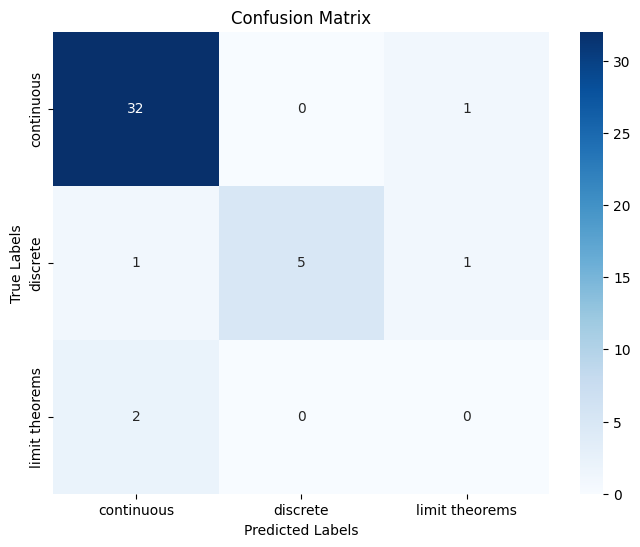

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Use trainer to get predictions and labels
output = final_trainer.predict(test_dataset)

# Extract predictions and labels
predicted_labels = output.predictions.argmax(axis=-1)
true_labels = output.label_ids

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create reverse mapping from numeric labels to original class names
reverse_mapping = {v: k for k, v in label_mapping.items()}

# Use original class names sorted by label index for axis labels
class_names = [reverse_mapping[i] for i in range(len(label_mapping))]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Assumptions

Conclusions: Not use because of small sample

In [ ]:
df_assumptions = df_mbert[df_mbert['first_level'] == 'assumptions']
df_assumptions.shape

(89, 28)

In [ ]:
df_assumptions = df_assumptions.dropna(subset=['second_level'])
df_assumptions.shape

(72, 28)

In [ ]:
value_counts = df_assumptions['second_level'].value_counts()
value_counts

second_level
homogeneity of variance    23
multicolinearity           18
homoscedasticity           15
sphericity                  9
linearity                   4
normality                   3
Name: count, dtype: int64

### Reliability
Conclusions: It has only 2 levels, where the second one has only 1 question. In addition, it is a small sample. Do not use

In [ ]:
df_rel = df_mbert[df_mbert['first_level'] == 'reliability']
df_rel.shape

(47, 28)

In [ ]:
df_rel = df_rel.dropna(subset=['second_level'])
df_rel.shape

(36, 28)

In [ ]:
value_counts = df_rel['second_level'].value_counts()
value_counts

second_level
analysis        35
descriptives     1
Name: count, dtype: int64

### Factor Analysis
Conclusions: Not enough sample for many levels. Small sample in general. Do not use

In [ ]:
df_fac = df_mbert[df_mbert['first_level'] == 'factor analysis']
df_fac.shape

(40, 28)

In [ ]:
df_fac = df_fac.dropna(subset=['second_level'])
df_fac.shape

(27, 28)

In [ ]:
value_counts = df_fac['second_level'].value_counts()
value_counts

second_level
explained variance               7
compontent correlation matrix    4
factor loadings                  3
eigenvalues                      3
scree plot                       3
rotations                        2
communalities                    1
structure matrix                 1
factor correlation matrix        1
pattern matrix                   1
exploratory factor analysis      1
Name: count, dtype: int64

### Type of Variable
Conclusions: Not enough sample for many levels. Small sample in general. Do not use

In [ ]:
df_tov = df_mbert[df_mbert['first_level'] == 'type of variable']
df_tov.shape

(41, 28)

In [ ]:
df_tov = df_tov.dropna(subset=['second_level'])
df_tov.shape

(21, 28)

In [ ]:
value_counts = df_tov['second_level'].value_counts()
value_counts

second_level
interval               7
nominal                6
ratio                  3
ordinal                3
discrete variable      1
continuous variable    1
Name: count, dtype: int64

# 3. Generative Models

#### Pre Processing

In [ ]:
df_gpt.shape # this commons from pre-processing 1.4 Section

(3919, 28)

In [ ]:
df_gpt['split'].value_counts()

split
train    2821
test      784
val       314
Name: count, dtype: int64

In [ ]:
df_gpt_test  = df_gpt[df_gpt['split'] == 'test']

In [ ]:
!pip install openai
import openai

In [ ]:
import time
from tqdm import tqdm
import random

In [ ]:
df_gpt_test['first_level'].value_counts()

first_level
inferential statistics    483
descriptive statistics    119
probability                95
distributions              42
assumptions                19
reliability                10
type of variable            8
factor analysis             8
Name: count, dtype: int64

In [ ]:
import codecs

def decode_escapes(text):
    if not isinstance(text, str):
        return text
    # codecs.decode with 'unicode_escape' decodes \r, \n, \t, \\, etc.
    try:
        return codecs.decode(text, 'unicode_escape')
    except Exception:
        # If it fails, just return original text
        return text

df_gpt_test['question_format'] = df_gpt_test['question'].apply(decode_escapes)

<ipython-input-5-9d95181d89a9>:8: DeprecationWarning: invalid escape sequence '\g'
  return codecs.decode(text, 'unicode_escape')
<ipython-input-5-9d95181d89a9>:8: DeprecationWarning: invalid escape sequence '\['
  return codecs.decode(text, 'unicode_escape')
<ipython-input-5-9d95181d89a9>:8: DeprecationWarning: invalid escape sequence '\m'
  return codecs.decode(text, 'unicode_escape')
'
  return codecs.decode(text, 'unicode_escape')
<ipython-input-5-9d95181d89a9>:8: DeprecationWarning: invalid escape sequence '\p'
  return codecs.decode(text, 'unicode_escape')
<ipython-input-5-9d95181d89a9>:8: DeprecationWarning: invalid escape sequence '\o'
  return codecs.decode(text, 'unicode_escape')
<ipython-input-5-9d95181d89a9>:8: DeprecationWarning: invalid escape sequence '\.'
  return codecs.decode(text, 'unicode_escape')
<ipython-input-5-9d95181d89a9>:8: DeprecationWarning: invalid escape sequence '\~'
  return codecs.decode(text, 'unicode_escape')
<ipython-input-5-9d95181d89a9>:8: Depreca

In [ ]:
from openai import OpenAI

# Initialize the OpenAI client with your API key
client = OpenAI(api_key='') # include API

## 3.1 Labeled - First-Level

### ICL Settings

#### Baseline Prompt
System: You are an expert in educational content evaluation, specializing in university-level Statistics. You classify questions according to core statistical concepts.

User:
Analyze the following question to determine the most appropriate topic from this list of statistical concepts:
['assumptions', 'factor analysis', 'descriptive statistics', 'variable type', 'inferential statistics',
'distributions', 'reliability', 'measurement level', 'probability'].

Your task is to examine the question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Question: {input}

Please provide both the topic and rationale as follows:

Final Topic: exact topic from the list above
Rationale: detailed explanation for the selected topic

In [ ]:
# Define instructions with a prompt structure
instructions = """
Analyze the following question to determine the most appropriate topic from this list of statistical concepts:
['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability'].

Your task is to examine the question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Question: {input}

Please provide both the topic and rationale as follows:

Final Topic: <exact topic from the list above>
Rationale: <detailed explanation for the selected topic>
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = instructions.format(input=question_text)  # Format the prompt with the actual question text

    # Make the API call
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": "You are an expert in educational content evaluation, specializing in university-level Statistics. You classify questions according to core statistical concepts."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.3,
        max_tokens=150
    )

    # Extract the predicted topic and rationale from the assistant's message
    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = instructions.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_baseline'] = prompts
    df['output_baseline'] = outputs

    return df

In [ ]:
df_gpt_test = apply_with_delay(df_gpt_test, rpm_limit=10000)

<ipython-input-58-8521f21f435f>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prompt_baseline'] = prompts
<ipython-input-58-8521f21f435f>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['output_baseline'] = outputs


In [ ]:
# Extract only the topic from the full model response
import re
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return None


# Apply the topic extraction
df_gpt_test['predicted_topic_baseline'] = df_gpt_test['output_baseline'].apply(extract_topic)

<ipython-input-60-248de32aed89>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt_test['predicted_topic_baseline'] = df_gpt_test['output_baseline'].apply(extract_topic)


In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['predicted_topic_baseline']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()))
print(report)

                        precision    recall  f1-score   support

           assumptions       0.35      0.89      0.51        19
descriptive statistics       0.87      0.44      0.58       119
         distributions       0.14      0.50      0.22        42
       factor analysis       0.30      0.75      0.43         8
inferential statistics       0.85      0.72      0.78       483
           probability       0.89      0.53      0.66        95
           reliability       0.50      0.50      0.50        10
      type of variable       0.54      0.88      0.67         8

             micro avg       0.66      0.64      0.65       784
             macro avg       0.56      0.65      0.54       784
          weighted avg       0.79      0.64      0.69       784



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6441326530612245


In [ ]:
# Define your list of allowed topics (all should be lowercase if your extraction function lowercases topics)
allowed_topics = ['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability']

# Count how many rows do NOT match the allowed topics
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_baseline'].isin(allowed_topics)]
invalid_rows.shape

(21, 49)

In [ ]:
invalid_rows['predicted_topic_baseline'].unique()

array(['interpretation of scatterplots and line of equality (45-degree line)',
       'residuals** (note: since "residuals" is not explicitly listed among the provided options, the closest and most relevant concept from the list is **\'distributions\'** or **\'assumptions\'**. however, given the focus on residuals and their contribution to sse, the most precise categorization aligns with understanding residuals within regression analysis, which is a core component of inferential statistics. since \'residuals\' is not explicitly listed, the best fit is **\'inferential statistics\'** because residual analysis is fundamental in assessing model fit and assumptions in regression, which are inferential concepts.)',
       'effect sizes', 'chi-kwadraat-toets voor onafhankelijkheid',
       "interpretation of regression parameters (which aligns most closely with 'inferential statistics' or 'assumptions' in the list)",
       "interpretation of regression equations (related to 'inferential stat

In [ ]:
def clean_predicted_topic(entry):
    if pd.isnull(entry):
        return None

    x_lower = entry.lower()
    x_lower = x_lower.replace('inferentiële statistiek', 'inferential statistics')

    # If any parenthesis content contains " or ", mark as ambiguous
    notes = re.findall(r'\(([^)]*)\)', x_lower)
    for note in notes:
        if ' or ' in note:
            return 'mixed'

    # Return the most relevant valid category if clearly mentioned
    for cat in allowed_topics:
        if cat in x_lower:
            return cat

    # Otherwise, keep original text
    return entry

# Filter invalid rows mask
mask_invalid = ~df_gpt_test['predicted_topic_baseline'].isin(allowed_topics)

# Apply the cleaning function only to invalid rows
df_gpt_test.loc[mask_invalid, 'new_predicted_topic_baseline'] = (
    df_gpt_test.loc[mask_invalid, 'predicted_topic_baseline'].apply(clean_predicted_topic)
)

# For valid rows, just copy original value (or you can decide differently)
df_gpt_test.loc[~mask_invalid, 'new_predicted_topic_baseline'] = (
    df_gpt_test.loc[~mask_invalid, 'predicted_topic_baseline']
)

In [ ]:
# Re-create invalid_rows based on updated df_gpt_test (to have the new column)
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_baseline'].isin(allowed_topics)]

# Select the two columns you want to check
checking = invalid_rows[['new_predicted_topic_baseline', 'predicted_topic_baseline']]
checking

new_predicted_topic_baseline  \
81   interpretation of scatterplots and line of equ...   
113                                              mixed   
218                                       effect sizes   
223          chi-kwadraat-toets voor onafhankelijkheid   
316                                              mixed   
329                             inferential statistics   
338                             inferential statistics   
345                             inferential statistics   
550                             inferential statistics   
553                                              mixed   
574                                              mixed   
575                                      distributions   
603                             inferential statistics   
642       interpretatie van b<sub>2</sub> in regressie   
655                                              mixed   
675                                      probabilities   
702  set theory (not explicitly listed, but closely...   
747                                        probability   
752                                      probabilities   
768                                        probability   
776                                    betrouwbaarheid   

                              predicted_topic_baseline  
81   interpretation of scatterplots and line of equ...  
113  residuals** (note: since "residuals" is not ex...  
218                                       effect sizes  
223          chi-kwadraat-toets voor onafhankelijkheid  
316  interpretation of regression parameters (which...  
329  interpretation of regression equations (relate...  
338                            inferentiële statistiek  
345  interpretation of regression coefficients' (no...  
550  interpretation of regression coefficients' (no...  
553  least squares estimation' (note: since 'least ...  
574  interactions' (note: since 'interactions' is n...  
575                    interpretation of distributions  
603  interpretation of regression coefficients (rel...  
642       interpretatie van b<sub>2</sub> in regressie  
655  residuals (implied under 'assumptions' or 'inf...  
675                                      probabilities  
702  set theory (not explicitly listed, but closely...  
747                            conditional probability  
752                                      probabilities  
768                            conditional probability  
776                                    betrouwbaarheid

In [ ]:
df_gpt_test = pd.read_csv(data_path + 'df_gpt_test_baseline&cross&oneshot&fewshot&cto.csv')

In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['new_predicted_topic_baseline']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()), digits=4)
print(report)

                        precision    recall  f1-score   support

           assumptions     0.3542    0.8947    0.5075        19
descriptive statistics     0.8667    0.4370    0.5810       119
         distributions     0.1409    0.5000    0.2199        42
       factor analysis     0.3000    0.7500    0.4286         8
inferential statistics     0.8523    0.7288    0.7857       483
           probability     0.8966    0.5474    0.6797        95
           reliability     0.5000    0.5000    0.5000        10
      type of variable     0.5385    0.8750    0.6667         8

             micro avg     0.6641    0.6531    0.6585       784
             macro avg     0.5561    0.6541    0.5461       784
          weighted avg     0.7963    0.6531    0.6962       784



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6530612244897959


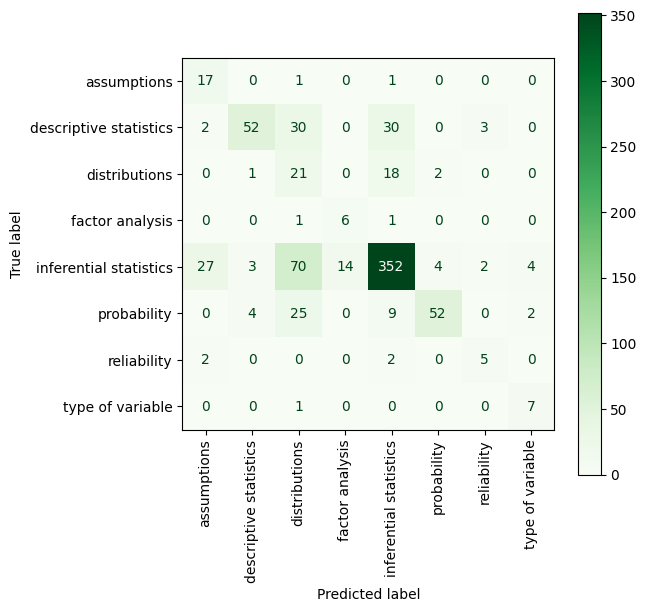

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the unique labels from the true labels
labels = sorted(y_true.unique())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Create display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot with a nicer colormap and colorbar
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap=plt.cm.Greens, ax=ax, xticks_rotation=90, colorbar=True)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_recall_fscore_support
import pandas as pd
import re
import time

# Store metrics across runs
num_runs = 5
accuracies = []
macro_f1s = []

def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()
        topic = topic.strip("'").strip("*")
        return topic
    return None

# Initialize the base dataframe
df_temp_baseline = df_gpt_test.copy()

# Start multiple runs
for run in range(num_runs):
    print(f"Starting run {run+1}...")

    # Apply your function with delay
    df_temp_baseline = apply_with_delay(df_temp_baseline, rpm_limit=10000)

    # Extract topics and store in new column
    predicted_col = f'predicted_topic_run{run+1}'
    df_temp_baseline[predicted_col] = df_temp_baseline['output_baseline'].apply(extract_topic)

    # Metrics
    y_true = df_gpt_test['first_level'].str.lower()
    y_pred = df_temp_baseline[predicted_col]

    acc = accuracy_score(y_true, y_pred)
    print(f"Run {run+1} Accuracy: {acc:.4f}")
    accuracies.append(acc)

# Report overall variability
print("\n=== Final Results Across Runs ===")
print(f"Accuracy: Mean = {sum(accuracies)/num_runs:.4f}, Std = {pd.Series(accuracies).std():.4f}")

# Save results
df_temp_baseline.to_csv(data_path + 'df_temp_baseline_final.csv', index=False)

Starting run 1...
Run 1 Accuracy: 0.6518
Starting run 2...
Run 2 Accuracy: 0.6314
Starting run 3...
Run 3 Accuracy: 0.6416
Starting run 4...
Run 4 Accuracy: 0.6403
Starting run 5...
Run 5 Accuracy: 0.6352

=== Final Results Across Runs ===
Accuracy: Mean = 0.6401, Std = 0.0077


In [ ]:
for i in range(1, 6):
    col = f'predicted_topic_run{i}'
    new_col = f'new_{col}'

    # Create mask for invalid rows
    mask_invalid = ~df_temp_baseline[col].isin(allowed_topics)

    # Clean invalid rows
    df_temp_baseline.loc[mask_invalid, new_col] = (
        df_temp_baseline.loc[mask_invalid, col].apply(clean_predicted_topic)
    )

    # Copy valid rows
    df_temp_baseline.loc[~mask_invalid, new_col] = (
        df_temp_baseline.loc[~mask_invalid, col]
    )

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Make sure true labels are lowercase
y_true = df_temp_baseline['first_level'].str.lower()

# Store results
results = {}
accuracies = []
macro_f1s = []

for i in range(1, 6):
    y_pred = df_temp_baseline[f'new_predicted_topic_run{i}']

    # Accuracy
    acc = accuracy_score(y_true, y_pred)
    accuracies.append(acc)

    # Classification report as dictionary
    report_dict = classification_report(
        y_true, y_pred,
        output_dict=True,
        labels=sorted(y_true.unique())
    )
    macro_f1 = report_dict['macro avg']['f1-score']
    macro_f1s.append(macro_f1)

    results[f'run{i}'] = {
        'accuracy': acc,
        'macro_f1': macro_f1
    }

# Print individual run results
for run, metrics in results.items():
    print(f"{run} - Accuracy: {metrics['accuracy']:.4f}, Macro F1: {metrics['macro_f1']:.4f}")

# Print mean and standard deviation
print("\nSummary:")
print(f"Accuracy - Mean: {np.mean(accuracies):.4f}, SD: {np.std(accuracies, ddof=1):.4f}")
print(f"Macro F1 - Mean: {np.mean(macro_f1s):.4f}, SD: {np.std(macro_f1s, ddof=1):.4f}")

run1 - Accuracy: 0.6735, Macro F1: 0.5590
run2 - Accuracy: 0.6543, Macro F1: 0.5509
run3 - Accuracy: 0.6633, Macro F1: 0.5478
run4 - Accuracy: 0.6633, Macro F1: 0.5519
run5 - Accuracy: 0.6569, Macro F1: 0.5375

Summary:
Accuracy - Mean: 0.6622, SD: 0.0074
Macro F1 - Mean: 0.5494, SD: 0.0078


#### Baseline + Cross-Lingual Prompt
System: You are an expert in educational content evaluation, specializing in university-level Statistics. You classify questions according to core statistical concepts. You should act as an expert in understanding and interpreting questions written in Dutch.

User:
Analyze the following Dutch question to determine the most appropriate topic from this list of statistical concepts:
['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability'].

Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Question: {input}

Important: Although the question is in Dutch, your output must be in English.

Please provide both the topic and rationale in as follows:
Final Topic: <exact topic from the list above>
Rationale: <detailed explanation for the selected topic>

In [ ]:
# Define instructions with a prompt structure
# System message: sets behavior and roleplay tone
system_message = """
You are an expert in educational content evaluation, specializing in university-level Statistics.
You classify questions according to core statistical concepts. You should act as an expert in understanding
and interpreting questions written in Dutch.
"""

# Template for the prompt (user message)
user_template = """
Analyze the following Dutch question to determine the most appropriate topic from this list of statistical concepts:
['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability'].

Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Question: {input}

Important: Although the question is in Dutch, your output must be in English.

Please provide both the topic and rationale in as follows:
Final Topic: <exact topic from the list above>
Rationale: <detailed explanation for the selected topic>

"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = instructions.format(input=question_text)  # Format the prompt with the actual question text
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": system_message.strip()},
            {"role": "user", "content": user_prompt.strip()}
        ],
        temperature=0.3,
        max_tokens=150
    )

    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = instructions.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_crosslingual'] = prompts
    df['output_crosslingual'] = outputs

    return df

In [ ]:
# Apply the function to each question in the 'question' column
df_gpt_test = apply_with_delay(df_gpt_test, rpm_limit=10000)

<ipython-input-70-4ce6eca339bd>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prompt_crosslingual'] = prompts
<ipython-input-70-4ce6eca339bd>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['output_crosslingual'] = outputs


In [ ]:
# Extract only the topic from the full model response
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return None

# Apply the topic extraction
df_gpt_test['predicted_topic_crosslingual'] = df_gpt_test['output_crosslingual'].apply(extract_topic)

<ipython-input-72-0f77947d11a6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt_test['predicted_topic_crosslingual'] = df_gpt_test['output_crosslingual'].apply(extract_topic)


In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['predicted_topic_crosslingual']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()))
print(report)

                        precision    recall  f1-score   support

           assumptions       0.46      0.89      0.61        19
descriptive statistics       0.76      0.45      0.57       119
         distributions       0.14      0.50      0.22        42
       factor analysis       0.50      0.75      0.60         8
inferential statistics       0.84      0.76      0.80       483
           probability       0.88      0.45      0.60        95
           reliability       0.67      0.60      0.63        10
      type of variable       0.54      0.88      0.67         8

             micro avg       0.67      0.66      0.67       784
             macro avg       0.60      0.66      0.59       784
          weighted avg       0.78      0.66      0.70       784



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6619897959183674


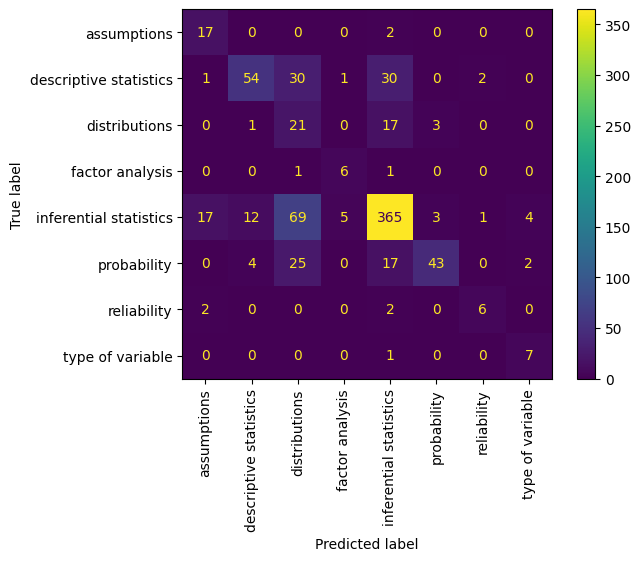

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['predicted_topic_crosslingual']

# Get the unique labels from the true labels
labels = sorted(y_true.unique())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=90)

In [ ]:
# Define your list of allowed topics (all should be lowercase if your extraction function lowercases topics)
allowed_topics = ['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability']

# Count how many rows do NOT match the allowed topics
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_crosslingual'].isin(allowed_topics)]
invalid_rows.shape

(12, 36)

In [ ]:
invalid_rows['predicted_topic_crosslingual'].unique()

array(["correlations' (note: since 'correlations' is not explicitly listed, the closest relevant concept from the provided list is 'inferential statistics' or 'distributions'. however, given the options, the most appropriate is 'inferential statistics' because it involves interpreting relationships between variables.)",
       "regressieanalyse' (regression analysis) — which falls under 'inferential statistics",
       'chi-kwadraat-toets voor onafhankelijkheid',
       'inference statistics', 'within-subjects factor',
       "interpretation of regression coefficients' (note: since this specific option is not explicitly listed, the closest and most appropriate category from the provided list is 'inferential statistics', as it involves interpreting model parameters and their implications.)",
       "link functions' (note: this specific topic is not explicitly listed in the provided options, but the closest relevant concept from the list is 'distributions' or 'assumptions', since link fu

In [ ]:
def clean_predicted_topic(x):
    if pd.isnull(x):
        return None

    x_lower = x.lower()

    # If the topic is specifically "set theory / venn diagrams", return None
    if 'set theory' in x_lower or 'venn diagram' in x_lower:
        return "mixed"

    # Standardize: map "probabilities" → "probability"
    x_lower = x_lower.replace('probabilities', 'probability')

    # Find all categories mentioned in the note
    categories_found = [cat for cat in allowed_topics if cat in x_lower]

    # Look for decisive phrasing indicating one clear category
    for cat in categories_found:
        if (
            f"most appropriate category is '{cat}'" in x_lower or
            f"most relevant overarching category is '{cat}'" in x_lower or
            f"closest relevant category is '{cat}'" in x_lower or
            f"closest and most appropriate category is '{cat}'" in x_lower or
            (f"most appropriate" in x_lower and cat in x_lower)
        ):
            return cat

    # If only one category is found, assume it's the intended one
    if len(categories_found) == 1:
        return categories_found[0]

    # Ambiguous or no clear category
    return "mixed"

# Filter invalid rows mask
mask_invalid = ~df_gpt_test['predicted_topic_crosslingual'].isin(allowed_topics)

# Apply the cleaning function only to invalid rows
df_gpt_test.loc[mask_invalid, 'new_predicted_topic_crosslingual'] = (
    df_gpt_test.loc[mask_invalid, 'predicted_topic_crosslingual'].apply(clean_predicted_topic)
)

# For valid rows, just copy original value (or you can decide differently)
df_gpt_test.loc[~mask_invalid, 'new_predicted_topic_crosslingual'] = (
    df_gpt_test.loc[~mask_invalid, 'predicted_topic_crosslingual']
)

<ipython-input-78-5a49e7a1237a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt_test.loc[mask_invalid, 'new_predicted_topic_crosslingual'] = (


In [ ]:
# Re-create invalid_rows based on updated df_gpt_test (to have the new column)
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_crosslingual'].isin(allowed_topics)]

# Select the two columns you want to check
checking = invalid_rows[['new_predicted_topic_crosslingual', 'predicted_topic_crosslingual']]
checking

new_predicted_topic_crosslingual  \
687                                       mixed   
1411                     inferential statistics   
1458  chi-kwadraat-toets voor onafhankelijkheid   
2454                       inference statistics   
3382                     within-subjects factor   
3481                     inferential statistics   
3483                                      mixed   
3638                       confounder variables   
4320                                probability   
4362                                probability   
4409                                probability   
4470                                      mixed   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                       predicted_topic_crosslingual  
687                                                                                                                                                                         correlations' (note: since 'correlations' is not explicitly listed, the closest relevant concept from the provided list is 'inferential statistics' or 'distributions'. however, given the options, the most appropriate is 'inferential statistics' because it involves interpreting relationships between variables.)  
1411                                                                                                                                                                                                                                                                                                                                                                                                            regressieanalyse' (regression analysis) — which falls under 'inferential statistics  
1458                                                                                                                                                                                                                                                                                                                                                                                                                                                      chi-kwadraat-toets voor onafhankelijkheid  
2454                                                                                                                                                                                                                                                                                                                                                                                                                                                                           inference statistics  
3382                                                                                                                                                                                                                                                                                                                                                                                                                                                                         within-subjects factor  
3481                                                                                                                                                                                                                     interpretation of regression coefficients' (note: since this specific option is not explicitly listed, the closest and most appropriate category from the provided list is 'inferential statistics', as it involves interp

In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['new_predicted_topic_crosslingual']

# Generate and print the classification report
# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()), digits=4)
print(report)

                        precision    recall  f1-score   support

           assumptions     0.4595    0.8947    0.6071        19
descriptive statistics     0.7606    0.4538    0.5684       119
         distributions     0.1438    0.5000    0.2234        42
       factor analysis     0.5000    0.7500    0.6000         8
inferential statistics     0.8398    0.7598    0.7978       483
           probability     0.8846    0.4842    0.6259        95
           reliability     0.6667    0.6000    0.6316        10
      type of variable     0.5385    0.8750    0.6667         8

             micro avg     0.6744    0.6684    0.6714       784
             macro avg     0.5992    0.6647    0.5901       784
          weighted avg     0.7780    0.6684    0.7013       784



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6683673469387755


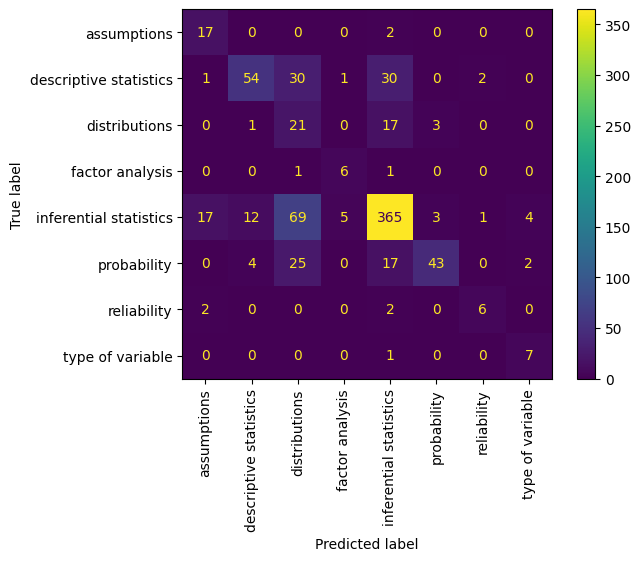

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['predicted_topic_crosslingual']

# Get the unique labels from the true labels
labels = sorted(y_true.unique())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=90)  # Rotate labels for better readability (optional)

In [ ]:
df_gpt_test.to_csv(data_path + 'df_gpt_test_baseline&cross.csv', index=False)

#### Cross-Lingual Prompt + One Shot

System: You are an expert in educational content evaluation, specializing in university-level Statistics. You classify questions according to core statistical concepts. You should act as an expert in understanding and interpreting questions written in Dutch.

User:
Analyze the following Dutch question to determine the most appropriate topic from this list of statistical concepts:
['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability'].

Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Example:

Question: Hieronder is van 5 individuen aangegeven hoe zij t.o.v. elkaar gerangschikt zijn op autoritair gedrag en sociale status:

Autoritair gedrag: 3, 5, 1, 2, 4

Sociale status: 2, 3, 1, 4, 5.

De waarde van de Spearman correlatiecoëfficiënt is hier

Answerlist

----------

* -0.5
* 0.4
* 0.5
* 0.513

Final Topic: descriptive statistics

Rationale: This question involves calculating the Spearman correlation coefficient, which is a statistical measure used to summarize the strength and direction of a relationship
between two ranked variables. It describes patterns in the given data without making predictions or generalizations beyond it.

Now, analyze the Dutch question below.
Question: {input}

Important: Although the question is in Dutch, your output must be in English.

Please provide both the topic and rationale in as follows:
Final Topic: <exact topic from the list above>
Rationale: <detailed explanation for the selected topic>

In [ ]:
# Define instructions with a prompt structure
# System message: sets behavior and roleplay tone
system_message = """
You are an expert in educational content evaluation, specializing in university-level Statistics.
You classify questions according to core statistical concepts. You should act as an expert in understanding
and interpreting questions written in Dutch.
"""

# Template for the prompt (user message)
user_template = """
Analyze the following Dutch question to determine the most appropriate topic from this list of statistical concepts:
['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability'].

Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Example:

Question: Hieronder is van 5 individuen aangegeven hoe zij t.o.v. elkaar gerangschikt zijn op autoritair gedrag en sociale status:

Autoritair gedrag: 3, 5, 1, 2, 4

Sociale status: 2, 3, 1, 4, 5.

De waarde van de Spearman correlatiecoëfficiënt is hier

Answerlist

----------

* -0.5
* 0.4
* 0.5
* 0.513

Final Topic: descriptive statistics

Rationale: This question involves calculating the Spearman correlation coefficient, which is a statistical measure used to summarize the strength and direction of a relationship
between two ranked variables. It describes patterns in the given data without making predictions or generalizations beyond it.

Now, analyze the Dutch question below.
Question: {input}

Important: Although the question is in Dutch, your output must be in English.

Please provide both the topic and rationale in as follows:
Final Topic: <exact topic from the list above>
Rationale: <detailed explanation for the selected topic>
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = user_template.format(input=question_text)  # Format the prompt with the actual question text
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": system_message.strip()},
            {"role": "user", "content": prompt.strip()}
        ],
        temperature=0.3,
        max_tokens=150
    )

    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = user_template.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_oneshot'] = prompts
    df['output_oneshot'] = outputs

    return df

In [ ]:
# Apply the function to each question in the 'question' column
df_gpt_test = apply_with_delay(df_gpt_test, rpm_limit=10000)

In [ ]:
# Extract only the topic from the full model response
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return None

# Apply the topic extraction
df_gpt_test['predicted_topic_oneshot'] = df_gpt_test['output_oneshot'].apply(extract_topic)

<ipython-input-86-760483ec960b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt_test['predicted_topic_oneshot'] = df_gpt_test['output_oneshot'].apply(extract_topic)


In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['predicted_topic_oneshot']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()),digits=4)
print(report)

                        precision    recall  f1-score   support

           assumptions     0.2048    0.8947    0.3333        19
descriptive statistics     0.8714    0.5126    0.6455       119
         distributions     0.1698    0.4286    0.2432        42
       factor analysis     0.6000    0.7500    0.6667         8
inferential statistics     0.8493    0.7702    0.8078       483
           probability     0.9630    0.5474    0.6980        95
           reliability     0.7143    0.5000    0.5882        10
      type of variable     0.5455    0.7500    0.6316         8

             micro avg     0.6893    0.6849    0.6871       784
             macro avg     0.6148    0.6442    0.5768       784
          weighted avg     0.8071    0.6849    0.7221       784



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6849489795918368


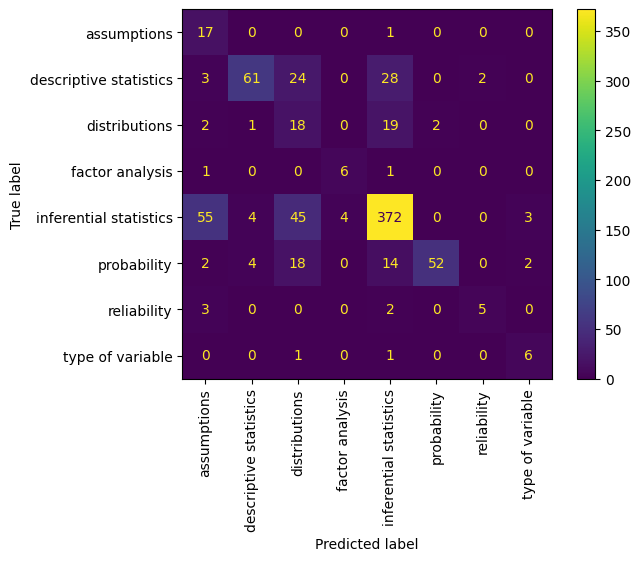

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['predicted_topic_oneshot']

# Get the unique labels from the true labels
labels = sorted(y_true.unique())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=90)  # Rotate labels for better readability (optional)

In [ ]:
# Define your list of allowed topics (all should be lowercase if your extraction function lowercases topics)
allowed_topics = ['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability']

# Count how many rows do NOT match the allowed topics
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_oneshot'].isin(allowed_topics)]
invalid_rows.shape

(5, 43)

In [ ]:
invalid_rows['predicted_topic_oneshot'].unique()

array(['heteroscedasticiteit', 'residuals', 'probabilities',
       "set theory (not explicitly listed, but closest to 'distributions' or 'assumptions' in terms of understanding fundamental concepts, but none of these perfectly fit)",
       'set theory / probability'], dtype=object)

In [ ]:
def clean_predicted_topic(entry):
    if pd.isnull(entry):
        return None

    x_lower = entry.lower()
    x_lower = x_lower.replace('inferentiële statistiek', 'inferential statistics')
    x_lower = x_lower.replace('probabilities', 'probability')

    # If any parenthesis content contains " or ", mark as ambiguous
    notes = re.findall(r'\(([^)]*)\)', x_lower)
    for note in notes:
        if ' or ' in note:
            return 'mixed'

    # Return the most relevant valid category if clearly mentioned
    for cat in allowed_topics:
        if cat in x_lower:
            return cat

    # Otherwise, keep original text
    return entry

# Filter invalid rows mask
mask_invalid = ~df_gpt_test['predicted_topic_oneshot'].isin(allowed_topics)

# Apply the cleaning function only to invalid rows
df_gpt_test.loc[mask_invalid, 'new_predicted_topic_oneshot'] = (
    df_gpt_test.loc[mask_invalid, 'predicted_topic_oneshot'].apply(clean_predicted_topic)
)

# For valid rows, just copy original value (or you can decide differently)
df_gpt_test.loc[~mask_invalid, 'new_predicted_topic_oneshot'] = (
    df_gpt_test.loc[~mask_invalid, 'predicted_topic_oneshot']
)

In [ ]:
# Re-create invalid_rows based on updated df_gpt_test (to have the new column)
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_oneshot'].isin(allowed_topics)]

# Select the two columns you want to check
checking = invalid_rows[['new_predicted_topic_oneshot', 'predicted_topic_oneshot']]
checking

new_predicted_topic_oneshot  \
7          heteroscedasticiteit   
113                   residuals   
685                 probability   
702                       mixed   
704                 probability   

                               predicted_topic_oneshot  
7                                 heteroscedasticiteit  
113                                          residuals  
685                                      probabilities  
702  set theory (not explicitly listed, but closest...  
704                           set theory / probability

In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['new_predicted_topic_oneshot']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()),digits=4)
print(report)

                        precision    recall  f1-score   support

           assumptions     0.2048    0.8947    0.3333        19
descriptive statistics     0.8714    0.5126    0.6455       119
         distributions     0.1698    0.4286    0.2432        42
       factor analysis     0.6000    0.7500    0.6667         8
inferential statistics     0.8493    0.7702    0.8078       483
           probability     0.9643    0.5684    0.7152        95
           reliability     0.7143    0.5000    0.5882        10
      type of variable     0.5455    0.7500    0.6316         8

             micro avg     0.6901    0.6875    0.6888       784
             macro avg     0.6149    0.6468    0.5790       784
          weighted avg     0.8072    0.6875    0.7242       784



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6875


In [ ]:
df_gpt_test.to_csv(data_path + 'df_gpt_test_baseline&cross&oneshot.csv', index=False)

#### Cross-Lingual Prompt + Few Shot
System: You are an expert in educational content evaluation, specializing in university-level Statistics. You classify questions according to core statistical concepts. You should act as an expert in understanding and interpreting questions written in Dutch.

User:
Analyze the following Dutch question to determine the most appropriate topic from this list of statistical concepts:
['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability'].

Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Example 1:

Question: Hieronder is van 5 individuen aangegeven hoe zij t.o.v. elkaar gerangschikt zijn op autoritair gedrag en sociale status:

Autoritair gedrag: 3, 5, 1, 2, 4

Sociale status: 2, 3, 1, 4, 5.

De waarde van de Spearman correlatiecoëfficiënt is hier

Answerlist

----------

* -0.5
* 0.4
* 0.5
* 0.513

Final Topic: descriptive statistics

Rationale: This question involves calculating the Spearman correlation coefficient, which is a statistical measure used to summarize the strength and direction of a relationship
between two ranked variables. It describes patterns in the given data without making predictions or generalizations beyond it.

Example 2:

Question:
Het gemiddelde in een steekproef van 500 personen is 5 en de variantie is 1. Bereken het 95% betrouwbaarheidsinterval voor het populatiegemiddelde.

Answerlist

----------

* 4.93; 5.07
* 4.91; 5.09
* 3.36; 6.65
* 3.04; 6.96

Final Topic: inferential statistics

Rationale: This question asks to calculate a 95% confidence interval for the population mean based on a sample. Inferential statistics involves using
sample data to make estimates or draw conclusions about a larger population.

Example 3:

Question:
Onderstaand Venn-diagram geeft weer welk deel van de variantie in y verklaard wordt door de twee predictoren x1 en x2. Welke conclusie over het Venn-diagram is juist?

Answerlist

----------

* Er is nauwelijks sprake van multicollineariteit.
* Er is sprake van een lage coëfficiënt van multipele determinatie R^2.
* Er is sprake van een lage multipele correlatie R.
* Er is sprake van aanzienlijke interactie.

Final Topic: assumptions

Rationale: This question focuses on interpreting the relationships between predictors and their explained variance in a regression context,
specifically addressing issues like multicollinearity and interaction. These relate directly to the assumptions underlying multiple regression models, which must hold true for valid results.

Now, analyze the Dutch question below.
Question: {input}

Important: Although the question is in Dutch, your output must be in English.

Please provide both the topic and rationale in as follows:
Final Topic: <exact topic from the list above>
Rationale: <detailed explanation for the selected topic>

In [ ]:
# Define instructions with a prompt structure
# System message: sets behavior and roleplay tone
system_message = """
You are an expert in educational content evaluation, specializing in university-level Statistics.
You classify questions according to core statistical concepts. You should act as an expert in understanding
and interpreting questions written in Dutch.
"""

# Template for the prompt (user message)
user_template = """
Analyze the following Dutch question to determine the most appropriate topic from this list of statistical concepts:
['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability'].

Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Example 1:

Question: Hieronder is van 5 individuen aangegeven hoe zij t.o.v. elkaar gerangschikt zijn op autoritair gedrag en sociale status:

Autoritair gedrag: 3, 5, 1, 2, 4

Sociale status: 2, 3, 1, 4, 5.

De waarde van de Spearman correlatiecoëfficiënt is hier

Answerlist

----------

* -0.5
* 0.4
* 0.5
* 0.513

Final Topic: descriptive statistics

Rationale: This question involves calculating the Spearman correlation coefficient, which is a statistical measure used to summarize the strength and direction of a relationship
between two ranked variables. It describes patterns in the given data without making predictions or generalizations beyond it.

Example 2:

Question:
Het gemiddelde in een steekproef van 500 personen is 5 en de variantie is 1. Bereken het 95% betrouwbaarheidsinterval voor het populatiegemiddelde.

Answerlist

----------

* 4.93; 5.07
* 4.91; 5.09
* 3.36; 6.65
* 3.04; 6.96

Final Topic: inferential statistics

Rationale: This question asks to calculate a 95% confidence interval for the population mean based on a sample. Inferential statistics involves using
sample data to make estimates or draw conclusions about a larger population.

Example 3:

Question:
Onderstaand Venn-diagram geeft weer welk deel van de variantie in y verklaard wordt door de twee predictoren x1 en x2. Welke conclusie over het Venn-diagram is juist?

Answerlist

----------

* Er is nauwelijks sprake van multicollineariteit.
* Er is sprake van een lage coëfficiënt van multipele determinatie R^2.
* Er is sprake van een lage multipele correlatie R.
* Er is sprake van aanzienlijke interactie.

Final Topic: assumptions

Rationale: This question focuses on interpreting the relationships between predictors and their explained variance in a regression context,
specifically addressing issues like multicollinearity and interaction. These relate directly to the assumptions underlying multiple regression models, which must hold true for valid results.

Now, analyze the Dutch question below.
Question: {input}

Important: Although the question is in Dutch, your output must be in English.

Please provide both the topic and rationale in as follows:
Final Topic: <exact topic from the list above>
Rationale: <detailed explanation for the selected topic>
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = user_template.format(input=question_text)  # Format the prompt with the actual question text
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": system_message.strip()},
            {"role": "user", "content": prompt.strip()}
        ],
        temperature=0.3,
        max_tokens=150
    )

    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = user_template.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_fewshot'] = prompts
    df['output_fewshot'] = outputs

    return df

In [ ]:
# Apply the function to each question in the 'question' column
df_gpt_test = apply_with_delay(df_gpt_test, rpm_limit=10000)

In [ ]:
# Extract only the topic from the full model response
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return None

# Apply the topic extraction
df_gpt_test['predicted_topic_fewshot'] = df_gpt_test['output_fewshot'].apply(extract_topic)

In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['predicted_topic_fewshot']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()))
print(report)

                        precision    recall  f1-score   support

           assumptions       0.11      1.00      0.20        19
descriptive statistics       0.76      0.58      0.66       119
         distributions       0.14      0.45      0.21        42
       factor analysis       0.43      0.75      0.55         8
inferential statistics       0.85      0.47      0.61       483
           probability       0.83      0.55      0.66        95
           reliability       0.75      0.60      0.67        10
      type of variable       0.70      0.88      0.78         8

             micro avg       0.53      0.52      0.52       784
             macro avg       0.57      0.66      0.54       784
          weighted avg       0.77      0.52      0.59       784



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5178571428571429


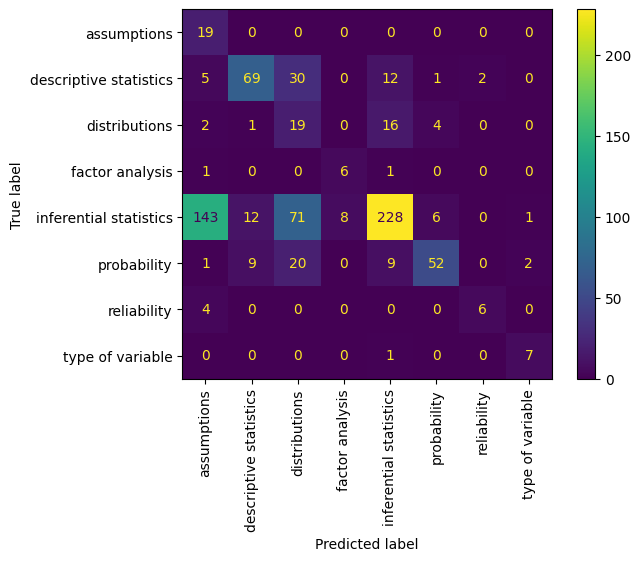

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['predicted_topic_fewshot']

# Get the unique labels from the true labels
labels = sorted(y_true.unique())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=90)  # Rotate labels for better readability (optional)

In [ ]:
# Define your list of allowed topics (all should be lowercase if your extraction function lowercases topics)
allowed_topics = ['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability']

# Count how many rows do NOT match the allowed topics
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_fewshot'].isin(allowed_topics)]
invalid_rows.shape

(16, 44)

In [ ]:
invalid_rows['predicted_topic_fewshot'].unique()

array(['correlations', 'effect size', 'multilevel analyse',
       'interpretational skills in regression analysis',
       'interpretive statistics', 'case-control study',
       'covariance analysis (ancova)', 'multiple causes',
       'between-subjects factor', 'within-subjects factor',
       'repeated-measures anova',
       "set theory / basic set operations (not explicitly listed, but closest to 'descriptive statistics' or 'assumptions' in terms of understanding fundamental concepts)",
       'set theory / probability'], dtype=object)

In [ ]:
def clean_predicted_topic(entry):
    if pd.isnull(entry):
        return None

    x_lower = entry.lower()
    x_lower = x_lower.replace('inferentiële statistiek', 'inferential statistics')
    x_lower = x_lower.replace('probabilities', 'probability')

    # If any parenthesis content contains " or ", mark as ambiguous
    notes = re.findall(r'\(([^)]*)\)', x_lower)
    for note in notes:
        if ' or ' in note:
            return 'mixed'

    # Return the most relevant valid category if clearly mentioned
    for cat in allowed_topics:
        if cat in x_lower:
            return cat

    # Otherwise, keep original text
    return entry

# Filter invalid rows mask
mask_invalid = ~df_gpt_test['predicted_topic_fewshot'].isin(allowed_topics)

# Apply the cleaning function only to invalid rows
df_gpt_test.loc[mask_invalid, 'new_predicted_topic_fewshot'] = (
    df_gpt_test.loc[mask_invalid, 'predicted_topic_fewshot'].apply(clean_predicted_topic)
)

# For valid rows, just copy original value (or you can decide differently)
df_gpt_test.loc[~mask_invalid, 'new_predicted_topic_fewshot'] = (
    df_gpt_test.loc[~mask_invalid, 'predicted_topic_fewshot']
)

In [ ]:
# Re-create invalid_rows based on updated df_gpt_test (to have the new column)
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_fewshot'].isin(allowed_topics)]

# Select the two columns you want to check
checking = invalid_rows[['new_predicted_topic_fewshot', 'predicted_topic_fewshot']]
checking

new_predicted_topic_fewshot  \
193                                    correlations   
208                                     effect size   
228                              multilevel analyse   
243                                     effect size   
253                                     effect size   
327  interpretational skills in regression analysis   
330                         interpretive statistics   
340                              case-control study   
468                    covariance analysis (ancova)   
518                                 multiple causes   
519                                 multiple causes   
533                         between-subjects factor   
536                          within-subjects factor   
648                         repeated-measures anova   
702                                           mixed   
704                                     probability   

                               predicted_topic_fewshot  
193                                       correlations  
208                                        effect size  
228                                 multilevel analyse  
243                                        effect size  
253                                        effect size  
327     interpretational skills in regression analysis  
330                            interpretive statistics  
340                                 case-control study  
468                       covariance analysis (ancova)  
518                                    multiple causes  
519                                    multiple causes  
533                            between-subjects factor  
536                             within-subjects factor  
648                            repeated-measures anova  
702  set theory / basic set operations (not explici...  
704                           set theory / probability

In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['new_predicted_topic_fewshot']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()),digits=4)
print(report)

                        precision    recall  f1-score   support

           assumptions     0.1086    1.0000    0.1959        19
descriptive statistics     0.7582    0.5798    0.6571       119
         distributions     0.1357    0.4524    0.2088        42
       factor analysis     0.4286    0.7500    0.5455         8
inferential statistics     0.8539    0.4720    0.6080       483
           probability     0.8281    0.5579    0.6667        95
           reliability     0.7500    0.6000    0.6667        10
      type of variable     0.7000    0.8750    0.7778         8

             micro avg     0.5293    0.5191    0.5241       784
             macro avg     0.5704    0.6609    0.5408       784
          weighted avg     0.7725    0.5191    0.5930       784



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5191326530612245


In [ ]:
df_gpt_test.to_csv(data_path + 'df_gpt_test_baseline&cross&oneshot&fewshot.csv', index=False)

#### Cross-Lingual Prompt + Chain Of Thoughts
System: You are an expert in educational content evaluation, specializing in university-level Statistics. You classify questions according to core statistical concepts. You should act as an expert in understanding and interpreting questions written in Dutch.

User:
Analyze the following Dutch question to determine the most appropriate topic from this list of statistical concepts:
['assumptions', 'factor analysis', 'descriptive statistics', 'variable type', 'inferential statistics',
'distributions', 'reliability', 'measurement level', 'probability'].

Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Internally, think step-by-step as follows:  
Step 1: Read and understand the Dutch question. Summarize its main statistical focus in English.
Step 2: Identify key statistical terms or concepts implicit or explicit in the question.
Step 3: Match these terms to the most appropriate topic from the given list, highlighting why the selected topic fits best and why others do not.
Step 4: Provide a detailed rationale explaining why you selected this topic.

Important: Although the question is in Dutch, your output must be in English.

Output ONLY the following:  
Final Topic: <exact topic from the list>  
Rationale: <detailed explanation for the selected topic>

Question: {input}

In [ ]:
# Define instructions with a prompt structure
# System message: sets behavior and roleplay tone
system_message = """
You are an expert in educational content evaluation, specializing in university-level Statistics.
You classify questions according to core statistical concepts. You should act as an expert in understanding
and interpreting questions written in Dutch.
"""

# Template for the prompt (user message)
user_template = """
Analyze the following Dutch question to determine the most appropriate topic from this list of statistical concepts:
['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability'].

Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Internally, think step-by-step as follows:
Step 1: Read and understand the Dutch question. Summarize its main statistical focus in English.
Step 2: Identify key statistical terms or concepts implicit or explicit in the question.
Step 3: Match these terms to the most appropriate topic from the given list, highlighting why the selected topic fits best and why others do not.
Step 4: Provide a detailed rationale explaining why you selected this topic.

Important: Although the question is in Dutch, your output must be in English.

Output ONLY the following:
Final Topic: <exact topic from the list>
Rationale: <detailed explanation for the selected topic>

Question: {input}
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = user_template.format(input=question_text)  # Format the prompt with the actual question text
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": system_message.strip()},
            {"role": "user", "content": prompt.strip()}
        ],
        temperature=0.3,
        max_tokens=150
    )

    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = user_template.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_cto'] = prompts
    df['output_cto'] = outputs

    return df

In [ ]:
# Apply the function to each question in the 'question' column
df_gpt_test = apply_with_delay(df_gpt_test, rpm_limit=10000)

In [ ]:
# Extract only the topic from the full model response
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return None

# Apply the topic extraction
df_gpt_test['predicted_topic_cto'] = df_gpt_test['output_cto'].apply(extract_topic)

In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['predicted_topic_cto']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()))
print(report)

                        precision    recall  f1-score   support

           assumptions       0.44      0.95      0.60        19
descriptive statistics       0.84      0.44      0.57       119
         distributions       0.18      0.45      0.26        42
       factor analysis       0.54      0.88      0.67         8
inferential statistics       0.85      0.82      0.83       483
           probability       0.92      0.57      0.70        95
           reliability       0.75      0.60      0.67        10
      type of variable       0.60      0.75      0.67         8

             micro avg       0.73      0.71      0.72       784
             macro avg       0.64      0.68      0.62       784
          weighted avg       0.80      0.71      0.74       784



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7091836734693877


In [ ]:
# Define your list of allowed topics (all should be lowercase if your extraction function lowercases topics)
allowed_topics = ['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability']

# Count how many rows do NOT match the allowed topics
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_cto'].isin(allowed_topics)]
invalid_rows.shape

(20, 48)

In [ ]:
invalid_rows['predicted_topic_cto'].unique()

array(["correlations' (implied under inferential statistics)",
       'spearman correlation coefficient (implied within the question, related to distributions and rank correlation)',
       "correlations' (implied under 'inferential statistics' or 'distributions')",
       'residuals (implied within the context of regression analysis)',
       'probabilities', 'effect sizes',
       'effect size (implied within inferential statistics)',
       'within-subjects factor',
       "interpretation of regression lines' (which falls under 'inferential statistics')",
       'interpretation of distributions',
       "interactions' (note: since 'interactions' is not explicitly listed in the provided options, the closest and most relevant concept from the list is 'inferential statistics', as it involves understanding relationships and effects between variables in a hypothesis-testing context.)",
       'interpretation of coefficients in regression analysis',
       'discriminant analysis',
       

In [ ]:
def clean_predicted_topic(entry):
    if pd.isnull(entry):
        return None

    x_lower = entry.lower()
    x_lower = x_lower.replace('inferentiële statistiek', 'inferential statistics')
    x_lower = x_lower.replace('probabilities', 'probability')

    # If any parenthesis content contains " or ", mark as ambiguous
    notes = re.findall(r'\(([^)]*)\)', x_lower)
    for note in notes:
        if ' or ' in note:
            return 'mixed'

    # Return the most relevant valid category if clearly mentioned
    for cat in allowed_topics:
        if cat in x_lower:
            return cat

    # Otherwise, keep original text
    return entry

# Filter invalid rows mask
mask_invalid = ~df_gpt_test['predicted_topic_cto'].isin(allowed_topics)

# Apply the cleaning function only to invalid rows
df_gpt_test.loc[mask_invalid, 'new_predicted_topic_cto'] = (
    df_gpt_test.loc[mask_invalid, 'predicted_topic_cto'].apply(clean_predicted_topic)
)

# For valid rows, just copy original value (or you can decide differently)
df_gpt_test.loc[~mask_invalid, 'new_predicted_topic_cto'] = (
    df_gpt_test.loc[~mask_invalid, 'predicted_topic_cto']
)

# Re-create invalid_rows based on updated df_gpt_test (to have the new column)
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_cto'].isin(allowed_topics)]

# Select the two columns you want to check
checking = invalid_rows[['new_predicted_topic_cto', 'predicted_topic_cto']]
checking

new_predicted_topic_cto  \
45                                          inferential statistics   
50                                                   distributions   
106                                                          mixed   
113  residuals (implied within the context of regression analysis)   
179                                                    probability   
218                                                   effect sizes   
253                                         inferential statistics   
536                                         within-subjects factor   
546                                         inferential statistics   
554                                                  distributions   
574                                         inferential statistics   
602          interpretation of coefficients in regression analysis   
610                                          discriminant analysis   
642                                         inferential statistics   
681                                         inferential statistics   
682                                                    probability   
702                                                          mixed   
714                                                          mixed   
752                                                    probability   
776                                             de betrouwbaarheid   

                                                                                                                                                                                                                                                                         predicted_topic_cto  
45                                                                                                                                                                                                                                      correlations' (implied under inferential statistics)  
50                                                                                                                                                                             spearman correlation coefficient (implied within the question, related to distributions and rank correlation)  
106                                                                                                                                                                                                                correlations' (implied under 'inferential statistics' or 'distributions')  
113                                                                                                                                                                                                                            residuals (implied within the context of regression analysis)  
179                                                                                                                                                                                                                                                                            probabilities  
218                                                                                                                                                                                                                                                                             effect sizes  
253                                                                                                                                                                                                                                      effect size (implied within inferential statistics)  
536                                                                                                                                                                                                                                                                   within-subject

In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['new_predicted_topic_cto']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()), digits=4)
print(report)

                        precision    recall  f1-score   support

           assumptions     0.4390    0.9474    0.6000        19
descriptive statistics     0.8387    0.4370    0.5746       119
         distributions     0.1743    0.4524    0.2517        42
       factor analysis     0.5385    0.8750    0.6667         8
inferential statistics     0.8468    0.8240    0.8353       483
           probability     0.9032    0.5895    0.7134        95
           reliability     0.7500    0.6000    0.6667        10
      type of variable     0.6000    0.7500    0.6667         8

             micro avg     0.7252    0.7168    0.7210       784
             macro avg     0.6363    0.6844    0.6219       784
          weighted avg     0.7996    0.7168    0.7384       784



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7168367346938775


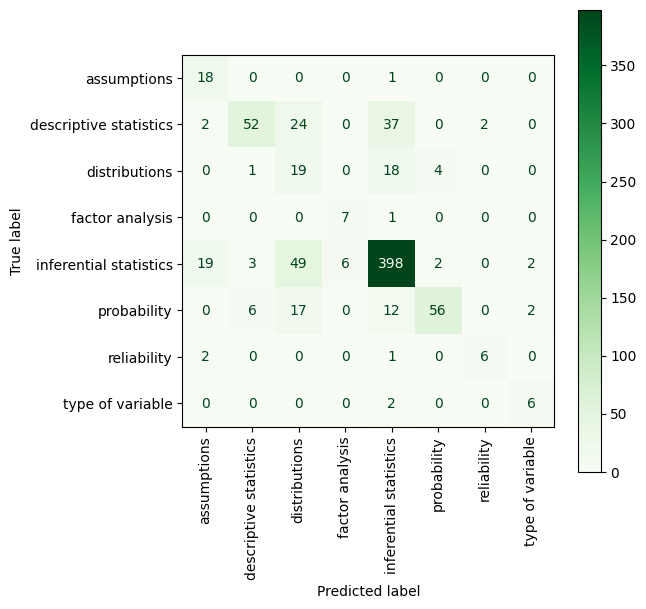

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the unique labels from the true labels
labels = sorted(y_true.unique())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Create display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot with a nicer colormap and colorbar
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap=plt.cm.Greens, ax=ax, xticks_rotation=90, colorbar=True)

In [ ]:
df_gpt_test.to_csv(data_path + 'df_gpt_test_baseline&cross&oneshot&fewshot&cto.csv', index=False)

### Prompt Settings Including Experts and Textbook Approaches

#### Experts
System: You are simulating a panel of three expert statistics instructors who are collaboratively analyzing student assessment questions. Each expert is brilliant, logical, detail-oriented, and highly critical. Their task is to discuss and determine what statistical knowledge components and cognitive skills the question assesses. The discussion should reflect thoughtful academic reasoning and rigorous pedagogical analysis.

User: The following question is part of a low-stakes assessment in a university-level statistics course.

Simulate a collaborative discussion among three expert instructors. Each expert should interpret the question, then articulate their reasoning in detail and
in real time, referencing one another, asking questions, making corrections, and building consensus. The conversation should
reflect a deep analysis of the question, focusing on what knowledge and skills it is testing.

The experts must categorize the question into one topic from the following rubric:
['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability'].

You must not output the discussion, but ONLY the following:

Final Topic: <exact topic from the list above>
Rationale: <detailed explanation for the selected topic>

Question: {input}

In [ ]:
# Define instructions with a prompt structure
# System message: sets behavior and roleplay tone
system_message = """
You are simulating a panel of three expert statistics instructors who are collaboratively analyzing student assessment questions.
Each expert is brilliant, logical, detail-oriented, and highly critical. Their task is to discuss and determine what statistical knowledge components and cognitive skills the question assesses.
The discussion should reflect thoughtful academic reasoning and rigorous pedagogical analysis.
"""

# Template for the prompt (user message)
user_template = """
The following question is part of a low-stakes assessment in a university-level statistics course.

Simulate a collaborative discussion among three expert instructors. Each expert should interpret the question, then articulate their reasoning in detail and
in real time, referencing one another, asking questions, making corrections, and building consensus. The conversation should
reflect a deep analysis of the question, focusing on what knowledge and skills it is testing.

The experts must categorize the question into one topic from the following rubric:
['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability'].

You must not output the discussion, but ONLY the following:

Final Topic: <exact topic from the list above>
Rationale: <detailed explanation for the selected topic>

Question: {input}
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = user_template.format(input=question_text)  # Format the prompt with the actual question text
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": system_message.strip()},
            {"role": "user", "content": prompt.strip()}
        ],
        temperature=0.3,
        max_tokens=150
    )

    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = user_template.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_experts'] = prompts
    df['output_experts'] = outputs

    return df

In [ ]:
# Apply the function to each question in the 'question' column
df_gpt_test = apply_with_delay(df_gpt_test, rpm_limit=10000)

<ipython-input-97-54e0bb38a2d5>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prompt_experts_cross'] = prompts
<ipython-input-97-54e0bb38a2d5>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['output_experts_cross'] = outputs


In [ ]:
# Extract only the topic from the full model response
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return "None"

# Apply the topic extraction
df_gpt_test['predicted_topic_experts'] = df_gpt_test['output_experts'].apply(extract_topic)

<ipython-input-155-eb2b0a869e1f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt_test['predicted_topic_experts'] = df_gpt_test['output_experts'].apply(extract_topic)


In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['predicted_topic_experts']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()))
print(report)

                        precision    recall  f1-score   support

           assumptions       0.54      0.79      0.64        19
descriptive statistics       0.89      0.41      0.56       119
         distributions       0.17      0.40      0.23        42
       factor analysis       0.50      0.88      0.64         8
inferential statistics       0.84      0.82      0.83       483
           probability       0.94      0.52      0.67        95
           reliability       0.55      0.60      0.57        10
      type of variable       0.55      0.75      0.63         8

             micro avg       0.73      0.70      0.71       784
             macro avg       0.62      0.65      0.60       784
          weighted avg       0.80      0.70      0.73       784



In [ ]:
xx = df_gpt_test[df_gpt_test['predicted_topic_experts']=="None"]
xx

url  \
2677  https://raw.githubusercontent.com/ShareStats/itembank/main/Inferential_Statistics/uva-test-250-nl/uva-test-250-nl.Rmd   

                title  \
2677  uva-test-250-nl   

                                                                                                                                                                                                                                                                                                                    body  \
2677  exname: uva-test-250-nl \r\n extype: schoice \r\n exsolution: 001 \r\n exsection: Inferential Statistics / Parametric Techniques / t-test \r\n exextra[Type]: Conceptual \r\n exextra[Language]: Dutch \r\n exextra[Level]: Statistical Literacy \r\n exextra[IRT-Difficulty]: 4.414 \r\n exextra[p-value]: 0.0289   

                                                                                                                                                                                                                                                                                                                                                                                                             question  \
2677  \r\nMen veronderstelt dat er een positief-lineaire relatie bestaat tussen\r\nrookintensiteit (X) en alcoholconsumptie (Y). In een aselecte steekproef\r\nvan n = 30 personen vindt men R~XY~ = 0.26. Op basis van dit resultaat\r\nkan de nulhypothese ρ~XY~ = 0 worden verworpen bij\r\nAnswerlist\r\n----------\r\n* α = 0.01\r\n* α = 0.05, maar niet bij α = 0.01\r\n* α = 0.10, maar niet bij α = 0.05\r\n   

               exname   extype exsolution extol  \
2677  uva-test-250-nl  schoice        001   NaN   

                                                    exsection        Type  \
2677  inferential statistics / parametric techniques / t-test  conceptual   

      ...  \
2677  ...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       output_experts_cross  \
2677  **Expert 1:** Okay, let's start by interpreting what this question is asking. It presents a scenario where men assume a positive linear relationship between smoking intensity (X) and alcohol consumption (Y). They have a sample correlation coefficient R_xy = 0.26 based on n=30 individuals. The question then asks whether, based on this result, the null hypothesis R_xy = 0 can be rejected at different significance levels.\n\n**Expert 2:** Right. The core of the question is about testing the significance of the correlation coefficient. It involves understanding the relationship between the sample correlation and the population correlation, and how to determine if the observed correlation is statistically significant. The mention of different alpha levels indicates a hypothesis test for the correlation coefficient.   

     predicted_topic_experts_cross new_predicted_topic_experts_cross  \
2677                          None                              None   

                                                                                                                                                                                                                                                                             

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6964285714285714


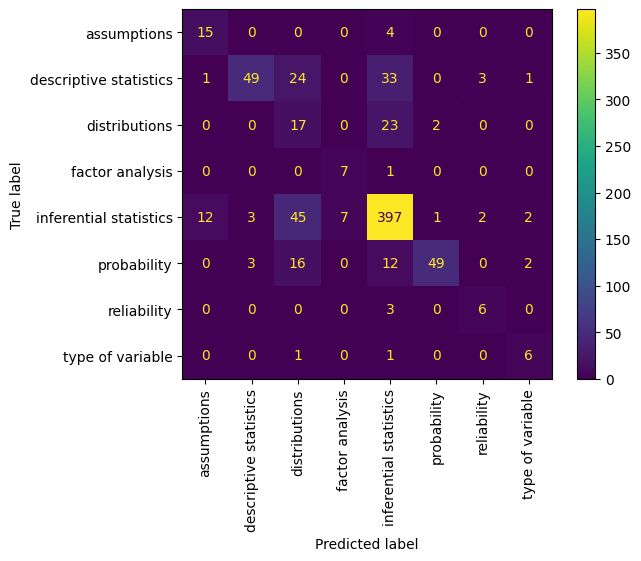

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the unique labels from the true labels
labels = sorted(y_true.unique())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=90)  # Rotate labels for better readability (optional)

In [ ]:
# Define your list of allowed topics (all should be lowercase if your extraction function lowercases topics)
allowed_topics = ['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability']

# Count how many rows do NOT match the allowed topics
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_experts'].isin(allowed_topics)]
invalid_rows.shape

(36, 44)

In [ ]:
invalid_rows['predicted_topic_experts'].unique()

array(['standardization (implied within the broader context of distributions)',
       'correlations (specifically spearman correlation coefficient)',
       'correlations (a subcategory of inferential statistics)',
       'correlations** (note: since "correlations" is not explicitly listed among the provided categories, the closest and most relevant category from the list is **"inferential statistics,"** as it involves statistical inference about relationships between variables.)',
       'correlations (specifically, spearman correlation coefficient)',
       'correlations** (note: since "correlations" is not explicitly listed in the provided categories, the most appropriate classification based on the options is **inferential statistics**, as calculating and interpreting a correlation coefficient involves inferential reasoning about relationships between variables.)',
       'residuals', ' inferential statistics',
       'effect size (specifically, eta squared)', 'effect size',
     

In [ ]:
def clean_predicted_topic(entry):
    if pd.isnull(entry):
        return None

    x_lower = entry.lower()
    x_lower = x_lower.replace('inferentiële statistiek', 'inferential statistics')
    x_lower = x_lower.replace('probabilities', 'probability')
    x_lower = x_lower.replace('probabiliteit', 'probability')
    x_lower = x_lower.replace('factorial analysis', 'factor analysis')
    x_lower = x_lower.replace('factors analysis', 'factor analysis')

    # If any parenthesis content contains " or ", mark as ambiguous
    notes = re.findall(r'\(([^)]*)\)', x_lower)
    for note in notes:
        if ' or ' in note:
            return 'mixed'

    # Return the most relevant valid category if clearly mentioned
    for cat in allowed_topics:
        if cat in x_lower:
            return cat

    # Otherwise, keep original text
    return entry

# Filter invalid rows mask
mask_invalid = ~df_gpt_test['predicted_topic_experts'].isin(allowed_topics)

# Apply the cleaning function only to invalid rows
df_gpt_test.loc[mask_invalid, 'new_predicted_topic_experts'] = (
    df_gpt_test.loc[mask_invalid, 'predicted_topic_experts'].apply(clean_predicted_topic)
)

# For valid rows, just copy original value (or you can decide differently)
df_gpt_test.loc[~mask_invalid, 'new_predicted_topic_experts'] = (
    df_gpt_test.loc[~mask_invalid, 'predicted_topic_experts']
)

# Re-create invalid_rows based on updated df_gpt_test (to have the new column)
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_experts'].isin(allowed_topics)]

# Select the two columns you want to check
checking = invalid_rows[['new_predicted_topic_experts', 'predicted_topic_experts']]
checking

<ipython-input-163-3ca13db52b00>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt_test.loc[mask_invalid, 'new_predicted_topic_experts'] = (


new_predicted_topic_experts  \
301                                                                                            distributions   
356                                             correlations (specifically spearman correlation coefficient)   
360                                                                                   inferential statistics   
372                                                                                   inferential statistics   
399                                             correlations (specifically spearman correlation coefficient)   
402                                            correlations (specifically, spearman correlation coefficient)   
413                                                                                   inferential statistics   
744                                                                                                residuals   
1381                                                                                  inferential statistics   
1424                                                                 effect size (specifically, eta squared)   
1651                                                                                             effect size   
2454                                                                                            correlations   
2677                                                                                                    None   
3118                                                                                             probability   
3192                                                                               interpretative statistics   
3393                                                                                         factor analysis   
3468                                                                                 interpretive statistics   
3483                                                                                                   mixed   
3501                                                      interpretation of r-squared in regression analysis   
3841                     interpretative skills within regression analysis (specifically interaction effects)   
4056  interpretive understanding of regression coefficients within the context of multiple linear regression   
4154                                                                                               residuals   
4335                                                                                  inferential statistics   
4429                                                                                             probability   
4465                                                                                                   mixed   
4482                                                                                  inferential statistics   
4501                                                                                  inferential statistics   
4507                                                                                  inferential statistics   
4532                                                                                             probability   
4534                                                                                             probability   
4557                                                                                             probability   
4585                                                                                             probability   
4593                                                                                            independence   
4688                                                                                             probability   
4757                                                                                  descriptive statistics   
4884                                             

In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['new_predicted_topic_experts']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()))
print(report)

                        precision    recall  f1-score   support

           assumptions       0.54      0.79      0.64        19
descriptive statistics       0.88      0.41      0.56       119
         distributions       0.16      0.40      0.23        42
       factor analysis       0.47      0.88      0.61         8
inferential statistics       0.83      0.82      0.82       483
           probability       0.93      0.58      0.71        95
           reliability       0.55      0.60      0.57        10
      type of variable       0.55      0.75      0.63         8

             micro avg       0.72      0.71      0.71       784
             macro avg       0.61      0.65      0.60       784
          weighted avg       0.79      0.71      0.73       784



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7053571428571429


In [ ]:
df_gpt_test.to_csv(data_path + 'df_gpt_test_baseline&experts.csv', index=False)

#### Textbook
System: You are an expert in educational content evaluation, specializing in university-level Statistics.
You classify questions according to core statistical concepts.

User:
Below there is a question written intended for a university-level audience with existing prior knowledge on the subject of Statistics.
The question is used as a low-stakes assessment as part of an Statistics course that covers similar content.
If this question was presented in a textbook for an Statistics course, what single domain-specific topic from the following list would the page cover?
This should be based on the knowledge components and skills the question assesses.

The possible topics to choose from are: ['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability'].

Please provide both the topic and rationale as follows:

Final Topic: <exact topic from the list above>
Rationale: <detailed explanation for the selected topic>

Question: {input}

In [ ]:
# Define instructions with a prompt structure
# System message: sets behavior and roleplay tone
system_message = """
You are an expert in educational content evaluation, specializing in university-level Statistics.
You classify questions according to core statistical concepts.
"""

# Template for the prompt (user message)
user_template = """
Below there is a question written intended for a university-level audience with existing prior knowledge on the subject of Statistics.
The question is used as a low-stakes assessment as part of an Statistics course that covers similar content.
If this question was presented in a textbook for an Statistics course, what single domain-specific topic from the following list would the page cover?
This should be based on the knowledge components and skills the question assesses.

The possible topics to choose from are: ['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability'].

Please provide both the topic and rationale as follows:

Final Topic: <exact topic from the list above>
Rationale: <detailed explanation for the selected topic>

Question: {input}
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = user_template.format(input=question_text)  # Format the prompt with the actual question text
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": system_message.strip()},
            {"role": "user", "content": prompt.strip()}
        ],
        temperature=0.3,
        max_tokens=150
    )

    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = user_template.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_textbook'] = prompts
    df['output_textbook'] = outputs

    return df

In [ ]:
# Apply the function to each question in the 'question' column
df_gpt_test = apply_with_delay(df_gpt_test, rpm_limit=10000)

<ipython-input-167-80accd50dd36>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prompt_textbook'] = prompts
<ipython-input-167-80accd50dd36>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['output_textbook'] = outputs


In [ ]:
# Extract only the topic from the full model response
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return None

# Apply the topic extraction
df_gpt_test['predicted_topic_textbook'] = df_gpt_test['output_textbook'].apply(extract_topic)

<ipython-input-169-1b1ced8be2c6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt_test['predicted_topic_textbook'] = df_gpt_test['output_textbook'].apply(extract_topic)


In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['predicted_topic_textbook']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()))
print(report)

                        precision    recall  f1-score   support

           assumptions       0.35      0.89      0.51        19
descriptive statistics       0.80      0.50      0.61       119
         distributions       0.18      0.43      0.25        42
       factor analysis       0.50      0.75      0.60         8
inferential statistics       0.84      0.73      0.78       483
           probability       0.94      0.49      0.65        95
           reliability       0.67      0.60      0.63        10
      type of variable       0.50      0.88      0.64         8

             micro avg       0.70      0.65      0.68       784
             macro avg       0.60      0.66      0.58       784
          weighted avg       0.79      0.65      0.70       784



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6530612244897959


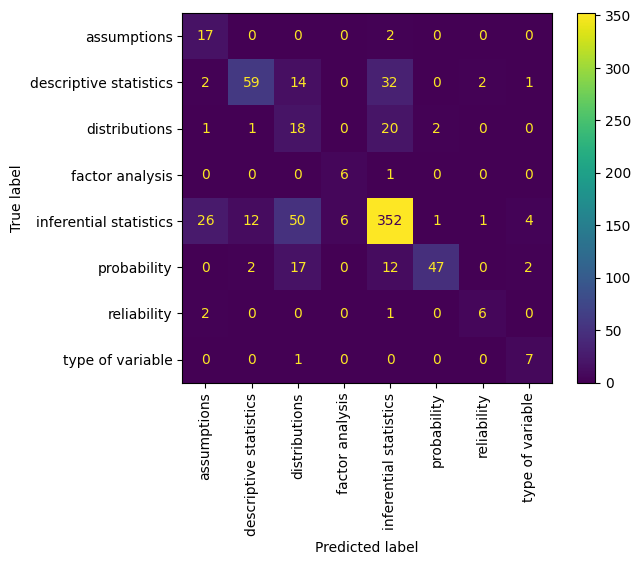

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the unique labels from the true labels
labels = sorted(y_true.unique())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=90)  # Rotate labels for better readability (optional)

In [ ]:
# Define your list of allowed topics (all should be lowercase if your extraction function lowercases topics)
allowed_topics = ['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability']

# Count how many rows do NOT match the allowed topics
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_textbook'].isin(allowed_topics)]
invalid_rows.shape

(57, 45)

In [ ]:
invalid_rows['predicted_topic_textbook'].unique()

array(['standardization (related to distributions and transformations)',
       'correlations** (note: since "correlations" is not explicitly listed among the options, the closest and most appropriate choice from the provided list is **"inferential statistics"**, as it encompasses correlation analysis. if "correlations" were a more specific option, it would be ideal, but given the options, "inferential statistics" best fits the context.)',
       'correlations (specifically spearman correlation coefficient)',
       'correlations** (note: since "correlations" is not explicitly listed, the closest relevant topic from the provided list is **inferential statistics**, as it encompasses correlation analysis and hypothesis testing related to relationships between variables.)',
       'interpretation of the coefficient of determination (r²)',
       "correlation' (which falls under 'inferential statistics' or 'distributions' in some contexts)",
       'residuals',
       'explained variance (

In [ ]:
def clean_predicted_topic(entry):
    if pd.isnull(entry):
        return None

    x_lower = entry.lower()
    x_lower = x_lower.replace('inferentiële statistiek', 'inferential statistics')
    x_lower = x_lower.replace('probabilities', 'probability')
    x_lower = x_lower.replace('probabiliteit', 'probability')

    # If any parenthesis content contains " or ", mark as ambiguous
    notes = re.findall(r'\(([^)]*)\)', x_lower)
    for note in notes:
        if ' or ' in note:
            return 'mixed'

    # Return the most relevant valid category if clearly mentioned
    for cat in allowed_topics:
        if cat in x_lower:
            return cat

    # Otherwise, keep original text
    return entry

# Filter invalid rows mask
mask_invalid = ~df_gpt_test['predicted_topic_textbook'].isin(allowed_topics)

# Apply the cleaning function only to invalid rows
df_gpt_test.loc[mask_invalid, 'new_predicted_topic_textbook'] = (
    df_gpt_test.loc[mask_invalid, 'predicted_topic_textbook'].apply(clean_predicted_topic)
)

# For valid rows, just copy original value (or you can decide differently)
df_gpt_test.loc[~mask_invalid, 'new_predicted_topic_textbook'] = (
    df_gpt_test.loc[~mask_invalid, 'predicted_topic_textbook']
)

# Re-create invalid_rows based on updated df_gpt_test (to have the new column)
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_textbook'].isin(allowed_topics)]

# Select the two columns you want to check
checking = invalid_rows[['new_predicted_topic_textbook', 'predicted_topic_textbook']]
checking

new_predicted_topic_textbook  \
301                                                                                 distributions   
372                                                                        inferential statistics   
384                                  correlations (specifically spearman correlation coefficient)   
399                                                                        inferential statistics   
402                                  correlations (specifically spearman correlation coefficient)   
419                                       interpretation of the coefficient of determination (r²)   
687                                                                                         mixed   
744                                                                                     residuals   
1181                                                                       descriptive statistics   
1400                                                                                effectgrootte   
1423                                                                       inferential statistics   
1424                                                      effect size' (specifically eta squared)   
1705                                 interpretation of regression output (specifically r-squared)   
1706                                           interpretation of r-squared in regression analysis   
1802                                       interpretation of interaction effects in two-way anova   
2030                         interpretation of regression parameters (specifically the intercept)   
2056                                                                       inferential statistics   
2059                                                                       inferential statistics   
2068                                                                       inferential statistics   
2071                                                                       inferential statistics   
2073                                                                       inferential statistics   
2076                                                                       inferential statistics   
2077                                                                       inferential statistics   
2166                                                    interpretation of regression coefficients   
3121  interpretation of regression coefficients (specifically odds ratios in logistic regression)   
3192        interpretation of model components (specifically variance components in mixed models)   
3335                                         interpretation of odds ratios in logistic regression   
3407                                                                                        mixed   
3432                                                                      risk (or relative risk)   
3468                                                    interpretation of regression coefficients   
3477                                                                       inferential statistics   
3481               interpretation of regression coefficients in the presence of interaction terms   
3483                                                                                        mixed   
3492                                                                       inferential statistics   
3501                                           interpretation of r-squared in regression analysis   
3517                                                                       inferential statistics   
3681                                                                       inferential statistics   
3841                                                    interpretation of regression coefficients   
4056                                                                       inferential statistics   
4154                         

In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['new_predicted_topic_textbook']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()))
print(report)

                        precision    recall  f1-score   support

           assumptions       0.35      0.89      0.51        19
descriptive statistics       0.78      0.50      0.61       119
         distributions       0.18      0.43      0.25        42
       factor analysis       0.50      0.75      0.60         8
inferential statistics       0.83      0.76      0.79       483
           probability       0.95      0.58      0.72        95
           reliability       0.67      0.60      0.63        10
      type of variable       0.50      0.88      0.64         8

             micro avg       0.70      0.68      0.69       784
             macro avg       0.59      0.67      0.59       784
          weighted avg       0.78      0.68      0.71       784



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6811224489795918


In [ ]:
df_gpt_test.to_csv(data_path + 'df_gpt_test_baseline&experts&textbooks.csv', index=False)

#### Experts + Cross Lingual
System: You are simulating a panel of three expert statistics instructors who are collaboratively analyzing student assessment questions and are expert in understanding and interpreting questions written in Dutch.
Each expert is brilliant, logical, detail-oriented, and highly critical. Their task is to discuss and determine what statistical knowledge components and cognitive skills the question assesses.
The discussion should reflect thoughtful academic reasoning and rigorous pedagogical analysis.

User:
The following question is written in Dutch and is part of a low-stakes assessment in a university-level statistics course.

Simulate a collaborative discussion among three expert instructors.
Each expert should interpret the Dutch question, then articulate their reasoning in detail and in real time, referencing one another, asking questions, making corrections, and building consensus.
The conversation should reflect a deep analysis of the question, focusing on what knowledge and skills it is testing.

The experts must categorize the question into one topic from the following rubric:
['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability'].

Important: Although the question is in Dutch, your output must be in English.

You must not output the discussion, but ONLY the following:

Final Topic: <exact topic from the list above>  
Rationale: <detailed explanation for the selected topic>
  
Question: {input}

In [ ]:
# Define instructions with a prompt structure
# System message: sets behavior and roleplay tone
system_message = """
You are simulating a panel of three expert statistics instructors who are collaboratively analyzing student assessment questions and are expert in understanding and interpreting questions written in Dutch.
Each expert is brilliant, logical, detail-oriented, and highly critical. Their task is to discuss and determine what statistical knowledge components and cognitive skills the question assesses.
The discussion should reflect thoughtful academic reasoning and rigorous pedagogical analysis.
"""

# Template for the prompt (user message)
user_template = """
The following question is written in Dutch and is part of a low-stakes assessment in a university-level statistics course.

Simulate a collaborative discussion among three expert instructors.
Each expert should interpret the Dutch question, then articulate their reasoning in detail and in real time, referencing one another, asking questions, making corrections, and building consensus.
The conversation should reflect a deep analysis of the question, focusing on what knowledge and skills it is testing.

The experts must categorize the question into one topic from the following rubric:
['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability'].

Important: Although the question is in Dutch, your output must be in English.

You must not output the discussion, but ONLY the following:

Final Topic: <exact topic from the list above>
Rationale: <detailed explanation for the selected topic>

Question: {input}
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = user_template.format(input=question_text)  # Format the prompt with the actual question text
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": system_message.strip()},
            {"role": "user", "content": prompt.strip()}
        ],
        temperature=0.3,
        max_tokens=150
    )

    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = user_template.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_experts_cross'] = prompts
    df['output_experts_cross'] = outputs

    return df

In [ ]:
# Apply the function to each question in the 'question' column
df_gpt_test = apply_with_delay(df_gpt_test, rpm_limit=10000)

<ipython-input-181-bc4e1383da3d>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prompt_experts_cross'] = prompts
<ipython-input-181-bc4e1383da3d>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['output_experts_cross'] = outputs


In [ ]:
# Extract only the topic from the full model response
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return None

# Apply the topic extraction
df_gpt_test['predicted_topic_experts_cross'] = df_gpt_test['output_experts_cross'].apply(extract_topic)

<ipython-input-183-49be49839474>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt_test['predicted_topic_experts_cross'] = df_gpt_test['output_experts_cross'].apply(extract_topic)


In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['predicted_topic_experts_cross']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()))
print(report)


                        precision    recall  f1-score   support

           assumptions       0.52      0.89      0.65        19
descriptive statistics       0.89      0.42      0.57       119
         distributions       0.19      0.36      0.25        42
       factor analysis       0.46      0.75      0.57         8
inferential statistics       0.83      0.84      0.84       483
           probability       0.94      0.49      0.65        95
           reliability       0.60      0.60      0.60        10
      type of variable       0.60      0.75      0.67         8

             micro avg       0.74      0.71      0.73       784
             macro avg       0.63      0.64      0.60       784
          weighted avg       0.80      0.71      0.73       784



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7079081632653061


In [ ]:
# Define your list of allowed topics (all should be lowercase if your extraction function lowercases topics)
allowed_topics = ['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability']

# Count how many rows do NOT match the allowed topics
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_experts_cross'].isin(allowed_topics)]
invalid_rows.shape

(39, 45)

In [ ]:
invalid_rows['predicted_topic_experts_cross'].unique()

array(['correlations',
       "correlations** (note: since the provided options do not explicitly include 'correlations,' but the question involves the spearman correlation coefficient, the most appropriate categorization from the given list is 'inferential statistics,' as correlation is a statistical inference about the relationship between variables.)",
       'correlations** (which falls under the broader category of **inferential statistics**)',
       'correlations (specifically spearman correlation coefficient)',
       'scatterplot (spreidingsdiagram)', 'residuals', 'probabilities',
       'effect size',
       'multiple testing correction (specifically bonferroni correction) within inferential statistics',
       'bayesian inference (a subcomponent of inferential statistics)',
       "confounding' variables",
       'interpretive skills in regression analysis',
       'link functions (implied within the context of generalized linear models)',
       'interpretation of r-squared

In [ ]:
def clean_predicted_topic(entry):
    if pd.isnull(entry):
        return None

    x_lower = entry.lower()
    x_lower = x_lower.replace('inferentiële statistiek', 'inferential statistics')
    x_lower = x_lower.replace('probabilities', 'probability')
    x_lower = x_lower.replace('probabiliteit', 'probability')

    # If any parenthesis content contains " or ", mark as ambiguous
    notes = re.findall(r'\(([^)]*)\)', x_lower)
    for note in notes:
        if ' or ' in note or 'probability and distributions' in note:
            return 'mixed'

    # Return the most relevant valid category if clearly mentioned
    for cat in allowed_topics:
        if cat in x_lower:
            return cat

    # Otherwise, keep original text
    return entry

# Filter invalid rows mask
mask_invalid = ~df_gpt_test['predicted_topic_experts_cross'].isin(allowed_topics)

# Apply the cleaning function only to invalid rows
df_gpt_test.loc[mask_invalid, 'new_predicted_topic_experts_cross'] = (
    df_gpt_test.loc[mask_invalid, 'predicted_topic_experts_cross'].apply(clean_predicted_topic)
)

# For valid rows, just copy original value (or you can decide differently)
df_gpt_test.loc[~mask_invalid, 'new_predicted_topic_experts_cross'] = (
    df_gpt_test.loc[~mask_invalid, 'predicted_topic_experts_cross']
)

# Re-create invalid_rows based on updated df_gpt_test (to have the new column)
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_experts_cross'].isin(allowed_topics)]

# Select the two columns you want to check
checking = invalid_rows[['new_predicted_topic_experts_cross', 'predicted_topic_experts_cross']]
checking

new_predicted_topic_experts_cross  \
356                                                               correlations   
360                                                     inferential statistics   
372                                                               correlations   
383                                                     inferential statistics   
396                                                               correlations   
399               correlations (specifically spearman correlation coefficient)   
402                                                               correlations   
430                                            scatterplot (spreidingsdiagram)   
744                                                                  residuals   
1079                                                               probability   
1424                                                               effect size   
1651                                                               effect size   
1730                                                    inferential statistics   
1887                                                    inferential statistics   
2927                                                               effect size   
3257                                                    confounding' variables   
3481                                interpretive skills in regression analysis   
3483  link functions (implied within the context of generalized linear models)   
3501                        interpretation of r-squared in regression analysis   
4154                                                    inferential statistics   
4335                                                    inferential statistics   
4362                                                    inferential statistics   
4379                                                        relative frequency   
4410                                                               probability   
4465                                                                     mixed   
4470                                                               probability   
4472                                                    inferential statistics   
4482                                                    inferential statistics   
4491                                                                     mixed   
4501                                                    inferential statistics   
4532                                                    inferential statistics   
4570                                                               probability   
4591                                                               probability   
4623                                                               probability   
4627                                                               probability   
4684                                                               probability   
4690                                                    inferential statistics   
4783                                                               probability   
4884                                                                  validity   

                                                                                                                                                                                                                                                                                                             predicted_topic_experts_cross  
356                                                                                                                                                                                                                                                                                                                           correlations  
360   correlations** (note: since the provided options do not explicitly include 'correlations,' b

In [ ]:
df_gpt_test = pd.read_csv(data_path + 'df_gpt_test_baseline&experts&textbook&expertscros.csv')

In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['new_predicted_topic_experts_cross']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()), digits=4)
print(report)

                        precision    recall  f1-score   support

           assumptions     0.5152    0.8947    0.6538        19
descriptive statistics     0.8929    0.4202    0.5714       119
         distributions     0.1875    0.3571    0.2459        42
       factor analysis     0.4615    0.7500    0.5714         8
inferential statistics     0.8139    0.8509    0.8320       483
           probability     0.9322    0.5789    0.7143        95
           reliability     0.6000    0.6000    0.6000        10
      type of variable     0.6000    0.7500    0.6667         8

             micro avg     0.7389    0.7219    0.7303       784
             macro avg     0.6254    0.6502    0.6069       784
          weighted avg     0.7909    0.7219    0.7352       784



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7219387755102041


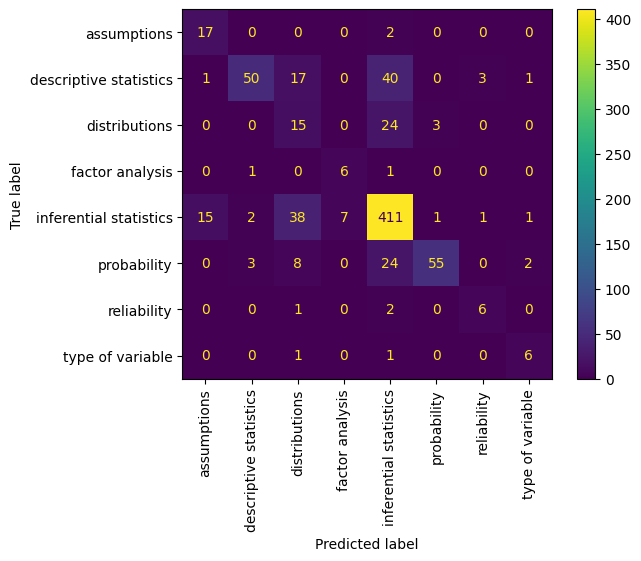

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the unique labels from the true labels
labels = sorted(y_true.unique())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=90)  # Rotate labels for better readability (optional)

In [ ]:
df_gpt_test.to_csv(data_path + 'df_gpt_test_baseline&experts&textbook&expertscros.csv', index=False)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_recall_fscore_support
import pandas as pd
import re
import time

# Store metrics across runs
num_runs = 3
accuracies = []
macro_f1s = []

def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()
        topic = topic.strip("'").strip("*")
        return topic
    return "None"

# Start multiple runs
for run in range(num_runs):
    print(f"Starting run {run+1}...")

    df_temp_best = apply_with_delay(df_gpt_test.copy(), rpm_limit=10000)

    # Extract topics
    predicted_col = f'predicted_topic_run{run+1}'
    df_temp_best[predicted_col] = df_temp_best['output_experts_cross'].apply(extract_topic)

    # Metrics
    y_true = df_gpt_test['first_level'].str.lower()
    y_pred = df_temp_best[predicted_col]

    acc = accuracy_score(y_true, y_pred)

    print(f"Run {run+1} Accuracy: {acc:.4f}")

    accuracies.append(acc)

# Report overall variability
print("\n=== Final Results Across Runs ===")
print(f"Accuracy: Mean = {sum(accuracies)/num_runs:.4f}, Std = {pd.Series(accuracies).std():.4f}")

Starting run 1...
Run 1 Accuracy: 0.7066
Starting run 2...
Run 2 Accuracy: 0.7143
Starting run 3...
Run 3 Accuracy: 0.7105

=== Final Results Across Runs ===
Accuracy: Mean = 0.7105, Std = 0.0038


In [ ]:
df_gpt_test.to_csv(data_path + 'df_gpt_test_first_level_complete.csv', index=False)

#### Experts + Cross Lingual + One Shot

System: You are simulating a panel of three expert statistics instructors who are collaboratively analyzing student assessment questions and are expert in understanding and interpreting questions written in Dutch. Each expert is brilliant, logical, detail-oriented, and highly critical. Their task is to discuss and determine what statistical knowledge components and cognitive skills the question assesses. The discussion should reflect thoughtful academic reasoning and rigorous pedagogical analysis.

User:
The following question is written in Dutch and is part of a low-stakes assessment in a university-level statistics course.

Simulate a collaborative discussion among three expert instructors.
Each expert should interpret the Dutch question, then articulate their reasoning in detail and in real time, referencing one another, asking questions, making corrections, and building consensus.
The conversation should reflect a deep analysis of the question, focusing on what knowledge and skills it is testing.

The experts must categorize the question into one topic from the following rubric:
['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability'].

Important: Although the question is in Dutch, your output must be in English.

You must not output the discussion, but ONLY the following:

Final Topic: <exact topic from the list above>  
Rationale: <detailed explanation for the selected topic>

Example:

Question: Hieronder is van 5 individuen aangegeven hoe zij t.o.v. elkaar gerangschikt zijn op autoritair gedrag en sociale status:

Autoritair gedrag: 3, 5, 1, 2, 4

Sociale status: 2, 3, 1, 4, 5.

De waarde van de Spearman correlatiecoëfficiënt is hier

Answerlist

----------

* -0.5
* 0.4
* 0.5
* 0.513

Final Topic: descriptive statistics

Rationale: This question involves calculating the Spearman correlation coefficient, which is a statistical measure used to summarize the strength and direction of a relationship between two ranked variables. It describes patterns in the given data without making predictions or generalizations beyond it.

Now, analyze the Dutch question below:

Question: {input}

In [ ]:
# Define instructions with a prompt structure
# System message: sets behavior and roleplay tone
system_message = """
You are simulating a panel of three expert statistics instructors who are collaboratively analyzing student assessment questions and are expert in understanding and interpreting questions written in Dutch.
Each expert is brilliant, logical, detail-oriented, and highly critical. Their task is to discuss and determine what statistical knowledge components and cognitive skills the question assesses.
The discussion should reflect thoughtful academic reasoning and rigorous pedagogical analysis.
"""

# Template for the prompt (user message)
user_template = """
The following question is written in Dutch and is part of a low-stakes assessment in a university-level statistics course.

Simulate a collaborative discussion among three expert instructors. Each expert should interpret the Dutch question, then articulate their reasoning in detail and in real time, referencing one another,
asking questions, making corrections, and building consensus.The conversation should reflect a deep analysis of the question, focusing on what knowledge and skills it is testing.

The experts must categorize the question into one topic from the following rubric:
['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability'].

Important: Although the question is in Dutch, your output must be in English.

You must not output the discussion, but ONLY the following:

Final Topic: <exact topic from the list above>
Rationale: <detailed explanation for the selected topic>

Example:

Question: Hieronder is van 5 individuen aangegeven hoe zij t.o.v. elkaar gerangschikt zijn op autoritair gedrag en sociale status:

Autoritair gedrag: 3, 5, 1, 2, 4

Sociale status: 2, 3, 1, 4, 5.

De waarde van de Spearman correlatiecoëfficiënt is hier

Answerlist

----------

* -0.5
* 0.4
* 0.5
* 0.513

Final Topic: descriptive statistics

Rationale: This question involves calculating the Spearman correlation coefficient, which is a statistical measure used to summarize the strength and direction of a relationship between two ranked variables.
It describes patterns in the given data without making predictions or generalizations beyond it.

Now, analyze the Dutch question below:

Question: {input}
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = user_template.format(input=question_text)  # Format the prompt with the actual question text
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": system_message.strip()},
            {"role": "user", "content": prompt.strip()}
        ],
        temperature=0.3,
        max_tokens=150
    )

    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = user_template.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_experts_oneshot'] = prompts
    df['output_experts_oneshot'] = outputs

    return df

In [ ]:
# Apply the function to each question in the 'question' column
df_gpt_test = apply_with_delay(df_gpt_test, rpm_limit=10000)

<ipython-input-197-e9f172037602>:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prompt_experts_oneshot'] = prompts
<ipython-input-197-e9f172037602>:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['output_experts_oneshot'] = outputs


In [ ]:
# Extract only the topic from the full model response
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return "None"

# Apply the topic extraction
df_gpt_test['predicted_topic_experts_oneshot'] = df_gpt_test['output_experts_oneshot'].apply(extract_topic)

<ipython-input-203-b5adb3f405d2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt_test['predicted_topic_experts_oneshot'] = df_gpt_test['output_experts_oneshot'].apply(extract_topic)


In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['predicted_topic_experts_oneshot']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()))
print(report)

                        precision    recall  f1-score   support

           assumptions       0.29      0.74      0.42        19
descriptive statistics       0.91      0.44      0.59       119
         distributions       0.20      0.36      0.25        42
       factor analysis       0.58      0.88      0.70         8
inferential statistics       0.81      0.84      0.82       483
           probability       0.96      0.51      0.66        95
           reliability       0.67      0.60      0.63        10
      type of variable       0.50      0.62      0.56         8

             micro avg       0.72      0.71      0.71       784
             macro avg       0.62      0.62      0.58       784
          weighted avg       0.79      0.71      0.72       784



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7053571428571429


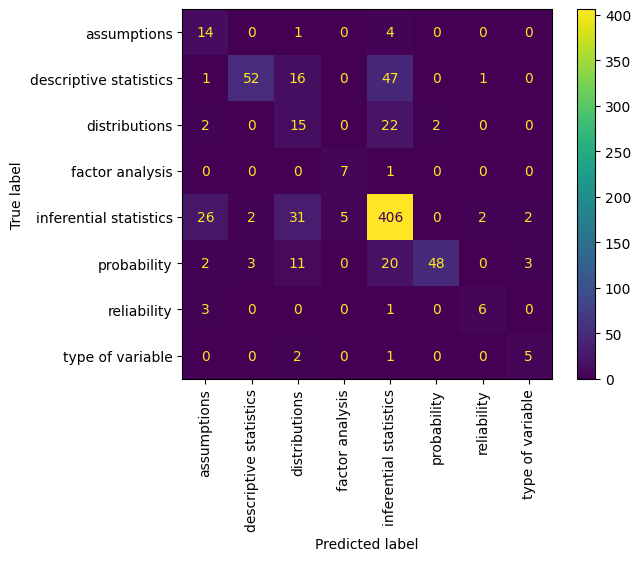

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['predicted_topic_experts_oneshot']

# Get the unique labels from the true labels
labels = sorted(y_true.unique())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=90)  # Rotate labels for better readability (optional)

In [ ]:
# Define your list of allowed topics (all should be lowercase if your extraction function lowercases topics)
allowed_topics = ['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability']

# Count how many rows do NOT match the allowed topics
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_experts_oneshot'].isin(allowed_topics)]
invalid_rows.shape

(20, 48)

In [ ]:
invalid_rows['predicted_topic_experts_oneshot'].unique()

array(['correlations', 'residuals', 'None', 'effect size',
       'effect size (specifically eta squared)', 'case-control study',
       'interpretive skills in inferential statistics',
       'interpretative statistics', 'types of variable', 'probabilities',
       'expected value (which falls under inferential statistics)',
       'set theory (specifically, intersection of sets)',
       'expected value (a form of descriptive statistics)',
       'expected value (which falls under the broader category of inferential statistics)'],
      dtype=object)

In [ ]:
def clean_predicted_topic(entry):
    if pd.isnull(entry):
        return None

    x_lower = entry.lower()
    x_lower = x_lower.replace('inferentiële statistiek', 'inferential statistics')
    x_lower = x_lower.replace('probabilities', 'probability')
    x_lower = x_lower.replace('types of variable', 'type of variable')

    # If any parenthesis content contains " or ", mark as ambiguous
    notes = re.findall(r'\(([^)]*)\)', x_lower)
    for note in notes:
        if ' or ' in note:
            return 'mixed'

    # Return the most relevant valid category if clearly mentioned
    for cat in allowed_topics:
        if cat in x_lower:
            return cat

    # Otherwise, keep original text
    return entry

# Filter invalid rows mask
mask_invalid = ~df_gpt_test['predicted_topic_experts_oneshot'].isin(allowed_topics)

# Apply the cleaning function only to invalid rows
df_gpt_test.loc[mask_invalid, 'new_predicted_topic_experts_oneshot'] = (
    df_gpt_test.loc[mask_invalid, 'predicted_topic_experts_oneshot'].apply(clean_predicted_topic)
)

# For valid rows, just copy original value (or you can decide differently)
df_gpt_test.loc[~mask_invalid, 'new_predicted_topic_experts_oneshot'] = (
    df_gpt_test.loc[~mask_invalid, 'predicted_topic_experts_oneshot']
)

In [ ]:
# Re-create invalid_rows based on updated df_gpt_test (to have the new column)
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_experts_oneshot'].isin(allowed_topics)]

# Select the two columns you want to check
checking = invalid_rows[['new_predicted_topic_experts_oneshot', 'predicted_topic_experts_oneshot']]
checking

new_predicted_topic_experts_oneshot  \
152                                      correlations   
744                                         residuals   
929                                              None   
1397                                      effect size   
1424           effect size (specifically eta squared)   
1651                                      effect size   
2129                               case-control study   
3021                                      effect size   
3204                           inferential statistics   
3468                        interpretative statistics   
3481                        interpretative statistics   
3638                                 type of variable   
4320                                      probability   
4335                           inferential statistics   
4379                                      probability   
4434                                      probability   
4465  set theory (specifically, intersection of sets)   
4510                           descriptive statistics   
4532                           inferential statistics   
4688                                             None   

                                                        predicted_topic_experts_oneshot  
152                                                                        correlations  
744                                                                           residuals  
929                                                                                None  
1397                                                                        effect size  
1424                                             effect size (specifically eta squared)  
1651                                                                        effect size  
2129                                                                 case-control study  
3021                                                                        effect size  
3204                                      interpretive skills in inferential statistics  
3468                                                          interpretative statistics  
3481                                                          interpretative statistics  
3638                                                                  types of variable  
4320                                                                      probabilities  
4335                          expected value (which falls under inferential statistics)  
4379                                                                      probabilities  
4434                                                                      probabilities  
4465                                    set theory (specifically, intersection of sets)  
4510                                  expected value (a form of descriptive statistics)  
4532  expected value (which falls under the broader category of inferential statistics)  
4688                                                                               None

In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['new_predicted_topic_experts_oneshot']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()))
print(report)

                        precision    recall  f1-score   support

           assumptions       0.29      0.74      0.42        19
descriptive statistics       0.90      0.44      0.59       119
         distributions       0.20      0.36      0.25        42
       factor analysis       0.58      0.88      0.70         8
inferential statistics       0.81      0.84      0.82       483
           probability       0.96      0.54      0.69        95
           reliability       0.67      0.60      0.63        10
      type of variable       0.45      0.62      0.53         8

             micro avg       0.72      0.71      0.72       784
             macro avg       0.61      0.63      0.58       784
          weighted avg       0.79      0.71      0.72       784



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7104591836734694


In [ ]:
df_gpt_test.to_csv(data_path + 'df_gpt_test_baseline&experts&textbook&expertscross&expertsoneshot.csv', index=False)

#### Experts + Cross Lingual + Few Shot
System: You are simulating a panel of three expert statistics instructors who are collaboratively analyzing student assessment questions and are expert in understanding and interpreting questions written in Dutch. Each expert is brilliant, logical, detail-oriented, and highly critical. Their task is to discuss and determine what statistical knowledge components and cognitive skills the question assesses. The discussion should reflect thoughtful academic reasoning and rigorous pedagogical analysis.

User:
The following question is written in Dutch and is part of a low-stakes assessment in a university-level statistics course.

Simulate a collaborative discussion among three expert instructors.
Each expert should interpret the Dutch question, then articulate their reasoning in detail and in real time, referencing one another, asking questions, making corrections, and building consensus.
The conversation should reflect a deep analysis of the question, focusing on what knowledge and skills it is testing.

The experts must categorize the question into one topic from the following rubric:
['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability'].

Important: Although the question is in Dutch, your output must be in English.

You must not output the discussion, but ONLY the following:

Final Topic: <exact topic from the list above>  
Rationale: <detailed explanation for the selected topic>

Example 1:

Question: Hieronder is van 5 individuen aangegeven hoe zij t.o.v. elkaar gerangschikt zijn op autoritair gedrag en sociale status:

Autoritair gedrag: 3, 5, 1, 2, 4

Sociale status: 2, 3, 1, 4, 5.

De waarde van de Spearman correlatiecoëfficiënt is hier

Answerlist

----------

* -0.5
* 0.4
* 0.5
* 0.513

Final Topic: descriptive statistics

Rationale: This question involves calculating the Spearman correlation coefficient, which is a statistical measure used to summarize the strength and direction of a relationship
between two ranked variables. It describes patterns in the given data without making predictions or generalizations beyond it.

Example 2:

Question:
Het gemiddelde in een steekproef van 500 personen is 5 en de variantie is 1. Bereken het 95% betrouwbaarheidsinterval voor het populatiegemiddelde.

Answerlist

----------

* 4.93; 5.07
* 4.91; 5.09
* 3.36; 6.65
* 3.04; 6.96

Final Topic: inferential statistics

Rationale: This question asks to calculate a 95% confidence interval for the population mean based on a sample. Inferential statistics involves using
sample data to make estimates or draw conclusions about a larger population.

Example 3:

Question:
Onderstaand Venn-diagram geeft weer welk deel van de variantie in y verklaard wordt door de twee predictoren x1 en x2. Welke conclusie over het Venn-diagram is juist?

Answerlist

----------

* Er is nauwelijks sprake van multicollineariteit.
* Er is sprake van een lage coëfficiënt van multipele determinatie R^2.
* Er is sprake van een lage multipele correlatie R.
* Er is sprake van aanzienlijke interactie.

Final Topic: assumptions

Rationale: This question focuses on interpreting the relationships between predictors and their explained variance in a regression context,
specifically addressing issues like multicollinearity and interaction. These relate directly to the assumptions underlying multiple regression models, which must hold true for valid results.

Now, analyze the Dutch question below:

Question: {input}

In [ ]:
# Define instructions with a prompt structure
# System message: sets behavior and roleplay tone
system_message = """
You are simulating a panel of three expert statistics instructors who are collaboratively analyzing student assessment questions and are expert in understanding and interpreting questions written in Dutch. Each expert is brilliant, logical, detail-oriented, and highly critical.
Their task is to discuss and determine what statistical knowledge components and cognitive skills the question assesses. The discussion should reflect thoughtful academic reasoning and rigorous pedagogical analysis.
"""

# Template for the prompt (user message)
user_template = """
The following question is written in Dutch and is part of a low-stakes assessment in a university-level statistics course.

Simulate a collaborative discussion among three expert instructors.
Each expert should interpret the Dutch question, then articulate their reasoning in detail and in real time, referencing one another, asking questions, making corrections, and building consensus.
The conversation should reflect a deep analysis of the question, focusing on what knowledge and skills it is testing.

The experts must categorize the question into one topic from the following rubric:
['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability'].

Important: Although the question is in Dutch, your output must be in English.

You must not output the discussion, but ONLY the following:

Final Topic: <exact topic from the list above>
Rationale: <detailed explanation for the selected topic>

Example 1:

Question: Hieronder is van 5 individuen aangegeven hoe zij t.o.v. elkaar gerangschikt zijn op autoritair gedrag en sociale status:

Autoritair gedrag: 3, 5, 1, 2, 4

Sociale status: 2, 3, 1, 4, 5.

De waarde van de Spearman correlatiecoëfficiënt is hier

Answerlist

----------

* -0.5
* 0.4
* 0.5
* 0.513

Final Topic: descriptive statistics

Rationale: This question involves calculating the Spearman correlation coefficient, which is a statistical measure used to summarize the strength and direction of a relationship
between two ranked variables. It describes patterns in the given data without making predictions or generalizations beyond it.

Example 2:

Question:
Het gemiddelde in een steekproef van 500 personen is 5 en de variantie is 1. Bereken het 95% betrouwbaarheidsinterval voor het populatiegemiddelde.

Answerlist

----------

* 4.93; 5.07
* 4.91; 5.09
* 3.36; 6.65
* 3.04; 6.96

Final Topic: inferential statistics

Rationale: This question asks to calculate a 95% confidence interval for the population mean based on a sample. Inferential statistics involves using
sample data to make estimates or draw conclusions about a larger population.

Example 3:

Question:
Onderstaand Venn-diagram geeft weer welk deel van de variantie in y verklaard wordt door de twee predictoren x1 en x2. Welke conclusie over het Venn-diagram is juist?

Answerlist

----------

* Er is nauwelijks sprake van multicollineariteit.
* Er is sprake van een lage coëfficiënt van multipele determinatie R^2.
* Er is sprake van een lage multipele correlatie R.
* Er is sprake van aanzienlijke interactie.

Final Topic: assumptions

Rationale: This question focuses on interpreting the relationships between predictors and their explained variance in a regression context,
specifically addressing issues like multicollinearity and interaction. These relate directly to the assumptions underlying multiple regression models, which must hold true for valid results.

Now, analyze the Dutch question below:

Question: {input}
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = user_template.format(input=question_text)  # Format the prompt with the actual question text
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": system_message.strip()},
            {"role": "user", "content": prompt.strip()}
        ],
        temperature=0.3,
        max_tokens=150
    )

    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = user_template.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_experts_fewshot'] = prompts
    df['output_experts_fewshot'] = outputs

    return df

In [ ]:
# Apply the function to each question in the 'question' column
df_gpt_test = apply_with_delay(df_gpt_test, rpm_limit=10000)

<ipython-input-218-e25f983a2628>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prompt_experts_fewshot'] = prompts
<ipython-input-218-e25f983a2628>:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['output_experts_fewshot'] = outputs


In [ ]:
# Extract only the topic from the full model response
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return "None"

# Apply the topic extraction
df_gpt_test['predicted_topic_experts_fewshot'] = df_gpt_test['output_experts_fewshot'].apply(extract_topic)

<ipython-input-220-b5b2129313de>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt_test['predicted_topic_experts_fewshot'] = df_gpt_test['output_experts_fewshot'].apply(extract_topic)


In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['predicted_topic_experts_fewshot']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()))
print(report)

                        precision    recall  f1-score   support

           assumptions       0.12      1.00      0.21        19
descriptive statistics       0.88      0.53      0.66       119
         distributions       0.14      0.40      0.21        42
       factor analysis       0.40      0.75      0.52         8
inferential statistics       0.85      0.55      0.67       483
           probability       0.88      0.54      0.67        95
           reliability       0.56      0.50      0.53        10
      type of variable       0.64      0.88      0.74         8

             micro avg       0.58      0.56      0.57       784
             macro avg       0.56      0.64      0.53       784
          weighted avg       0.79      0.56      0.63       784



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5561224489795918


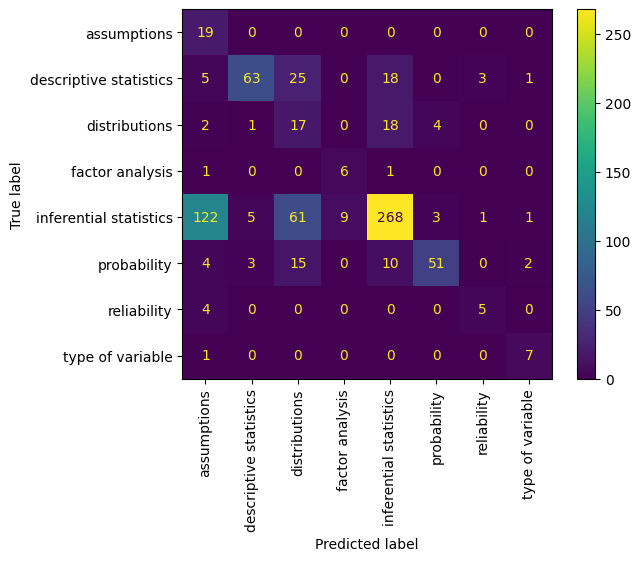

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['predicted_topic_experts_fewshot']

# Get the unique labels from the true labels
labels = sorted(y_true.unique())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=90)  # Rotate labels for better readability (optional)

In [ ]:
# Define your list of allowed topics (all should be lowercase if your extraction function lowercases topics)
allowed_topics = ['assumptions', 'factor analysis', 'descriptive statistics', 'inferential statistics',
'distributions', 'reliability', 'type of variable', 'probability']

# Count how many rows do NOT match the allowed topics
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_experts_fewshot'].isin(allowed_topics)]
invalid_rows.shape

(28, 52)

In [ ]:
invalid_rows['predicted_topic_experts_fewshot'].unique()

array(['correlations', 'residuals', 'effect size',
       'effect sizes (related to distributions and inferential statistics)',
       'None', 'interactions', 'study design',
       'risk analysis (a subset of inferential statistics)',
       'interpretive skills within regression analysis',
       'interpretative skills within regression analysis',
       'probabilities', 'set theory / type of variable',
       'expected value (a form of descriptive statistics)',
       'expected value (which falls under the broader category of inferential statistics)',
       'conditional probability', 'validity'], dtype=object)

In [ ]:
def clean_predicted_topic(entry):
    if pd.isnull(entry):
        return None

    x_lower = entry.lower()
    x_lower = x_lower.replace('inferentiële statistiek', 'inferential statistics')
    x_lower = x_lower.replace('probabilities', 'probability')

    # If any parenthesis content contains " or ", mark as ambiguous
    notes = re.findall(r'\(([^)]*)\)', x_lower)
    for note in notes:
        if ' or ' in note:
            return 'mixed'

    # Return the most relevant valid category if clearly mentioned
    for cat in allowed_topics:
        if cat in x_lower:
            return cat

    # Otherwise, keep original text
    return entry

# Filter invalid rows mask
mask_invalid = ~df_gpt_test['predicted_topic_experts_fewshot'].isin(allowed_topics)

# Apply the cleaning function only to invalid rows
df_gpt_test.loc[mask_invalid, 'new_predicted_topic_experts_fewshott'] = (
    df_gpt_test.loc[mask_invalid, 'predicted_topic_experts_fewshot'].apply(clean_predicted_topic)
)

# For valid rows, just copy original value (or you can decide differently)
df_gpt_test.loc[~mask_invalid, 'new_predicted_topic_experts_fewshott'] = (
    df_gpt_test.loc[~mask_invalid, 'predicted_topic_experts_fewshot']
)

<ipython-input-226-fbe648c6d100>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt_test.loc[mask_invalid, 'new_predicted_topic_experts_fewshott'] = (


In [ ]:
# Re-create invalid_rows based on updated df_gpt_test (to have the new column)
invalid_rows = df_gpt_test[~df_gpt_test['predicted_topic_experts_fewshot'].isin(allowed_topics)]

# Select the two columns you want to check
checking = invalid_rows[['new_predicted_topic_experts_fewshott', 'predicted_topic_experts_fewshot']]
checking

new_predicted_topic_experts_fewshott  \
152                                       correlations   
351                                       correlations   
744                                          residuals   
1397                                       effect size   
1424                            inferential statistics   
1598                                       effect size   
1651                                       effect size   
1744                                              None   
1802                                      interactions   
2129                                      study design   
2166                                              None   
3021                                       effect size   
3432                            inferential statistics   
3481    interpretive skills within regression analysis   
4056  interpretative skills within regression analysis   
4114                                      correlations   
4154                                         residuals   
4320                                       probability   
4362                                       probability   
4410                                              None   
4465                                  type of variable   
4510                            descriptive statistics   
4532                            inferential statistics   
4644                                       probability   
4684                                       probability   
4688                                       probability   
4770                                       probability   
4884                                          validity   

                                                        predicted_topic_experts_fewshot  
152                                                                        correlations  
351                                                                        correlations  
744                                                                           residuals  
1397                                                                        effect size  
1424                 effect sizes (related to distributions and inferential statistics)  
1598                                                                        effect size  
1651                                                                        effect size  
1744                                                                               None  
1802                                                                       interactions  
2129                                                                       study design  
2166                                                                               None  
3021                                                                        effect size  
3432                                 risk analysis (a subset of inferential statistics)  
3481                                     interpretive skills within regression analysis  
4056                                   interpretative skills within regression analysis  
4114                                                                       correlations  
4154                                                                          residuals  
4320                                                                      probabilities  
4362                                                                      probabilities  
4410                                                                               None  
4465                                                      set theory / type of variable  
4510                                  expected value (a form of descriptive statistics)  
4532  expected value (which falls under the broader category of inferential statistics)  
4644                                                                      probabilities  
4684                                                                      probabiliti

In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_gpt_test['first_level'].str.lower()
y_pred = df_gpt_test['new_predicted_topic_experts_fewshott']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()))
print(report)

                        precision    recall  f1-score   support

           assumptions       0.12      1.00      0.21        19
descriptive statistics       0.86      0.53      0.66       119
         distributions       0.14      0.40      0.21        42
       factor analysis       0.40      0.75      0.52         8
inferential statistics       0.85      0.56      0.67       483
           probability       0.89      0.60      0.72        95
           reliability       0.56      0.50      0.53        10
      type of variable       0.58      0.88      0.70         8

             micro avg       0.58      0.57      0.57       784
             macro avg       0.55      0.65      0.53       784
          weighted avg       0.79      0.57      0.64       784



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5650510204081632


In [ ]:
df_gpt_test.to_csv(data_path + 'df_gpt_test_baseline&experts&textbook&expertscross&expertsoneshot&expertscrossfewshot.csv', index=False)

#### Apendix: Analysis for choosing example

In [ ]:
## Choosing example based on the previous
# Condition 1: Both predictions are different from the true label
wrong_both = df_sample[
    (df_sample['predicted_topic_baseline_crosslingual_question'] != df_sample['first_level']) &
    (df_sample['predicted_topic_baseline_question'] != df_sample['first_level'])
]

# Condition 2: Both predictions are correct
correct_both = df_sample[
    (df_sample['predicted_topic_baseline_crosslingual_question'] == df_sample['first_level']) &
    (df_sample['predicted_topic_baseline_question'] == df_sample['first_level'])
]

# Get 5 examples of each
wrong_examples = wrong_both.sample(n=5, random_state=42)

In [ ]:
wrong_examples[['title','question','question_cleaned', 'first_level', 'output_baseline', 'output_baseline_crosslingual','output_baseline_question','output_baseline_crosslingual_question']]

title  \
5            uva-correlation-1696-nl   
13     uva-standard-deviation-471-nl   
104        uva-binomial-test-1543-nl   
32   uva-measures-of-location-324-nl   
151          vufgb-moderation-014-nl   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          question  \
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \r\nHieronder is van 5 individuen aangegeven hoe zij t.o.v. elkaar\r\ngerangschikt zijn op autoritair gedrag en sociale status:\\r\nAutoritair gedrag: 3, 5, 1, 2, 4\\r\nSociale status: 2, 3, 1, 4, 5. De waarde van de Spearman\r\ncorrelatiecoëfficiënt is hier\r\nAnswerlist\r\n----------\r\n* -0.5\r\n* 0.4\r\n* 0.5\r\n* 0.513\r\n   
13                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        \r\nIn een Amerikaans onderzoek is de temperatuur van een aantal patiënten\r\ngemeten in graden Fahrenheit. De standaarddeviatie wordt gemeld als een\r\nbepaalde waarde *s*. We drukken de waarden uit in graden Celsius, door\r\nvan alle waarden 32 af te trekken en het resultaat te vermenigvuldigen\r\nmet 5/9. Dan geldt voor de standaarddeviatie van de nieuwe waarden het\r\nvolgende\r\nAnswerlist\r\n----------\r\n* Blijft gelijk aan s\r\n* Wordt 5/9 × s + 32\r\n* Wordt 5/9 × s\r\n* Wordt 25/81 × s\r\n   
104                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              \r\nStel dat gegeven is dat voor een bepaalde patiëntenpopulatie het\r\nhemoglobinegehalte (Hb) normaal verdeeld is met μ = 12 en σ = 0.6. We\r\ntrekken uit deze populatie aselect een per

In [ ]:
correct_examples = correct_both.sample(n=5, random_state=22)

In [ ]:
correct_examples[['title','question','question_cleaned', 'first_level', 'output_baseline', 'output_baseline_crosslingual','output_baseline_question','output_baseline_crosslingual_question']]

title  \
134  uva-two-sided-hypothesis-1705-nl   
2       vufgb-multicolinearity-001-nl   
63           uu-Critical-value-802-nl   
100            uu-Twoway-ANOVA-837-nl   
112   vufsw-significancelevel-0021-nl   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       question  \
134                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    \r\nIn een onderzoek met een random steekproef van 67 mensen werd gevraagd\r\nof mensen het eens waren met de uitspraak van de rechter in de zaak\r\nWilders. In die zaak besloot de rechter dat zijn film \'Fitna\' niet\r\noproept tot haat of geweld tegen moslims. Het percentage mensen dat het\r\neens was met de uitspraak van de rechter was 75%. De onderzoekers wilden\r\nweten of het percentage in de populatie groter was dan 70%. Daartoe\r\nstel

Conclusions for choosing examples:
uva-correlation-1696-nl -> Can you explain me why this following question would be classified as descriptive statistics based on a list of 9 options (['assumptions', 'factor analysis', 'descriptive statistics', 'variable type', 'inferential statistics', 'distributions', 'reliability', 'measurement level', 'probability'])?
Question:
\r\nHieronder is van 5 individuen aangegeven hoe zij t.o.v. elkaar\r\ngerangschikt zijn op autoritair gedrag en sociale status:\\r\nAutoritair gedrag: 3, 5, 1, 2, 4\\r\nSociale status: 2, 3, 1, 4, 5. De waarde van de Spearman\r\ncorrelatiecoëfficiënt is hier\r\nAnswerlist\r\n----------\r\n* -0.5\r\n* 0.4\r\n* 0.5\r\n* 0.513\r\n

Answer:
This question is best classified under "descriptive statistics" from the list you provided because it involves summarizing and quantifying the relationship between two variables using a Spearman correlation coefficient, which is a descriptive measure.

link https://chatgpt.com/share/6825c6aa-fda4-8000-a941-820cf1982ed5

uva-binomial-test-1543-nl -: Can you explain me why this following question would be classified as inferential statistics based on a list of 9 options (['assumptions', 'factor analysis', 'descriptive statistics', 'variable type', 'inferential statistics', 'distributions', 'reliability', 'measurement level', 'probability'])?
Question:
\r\nStel dat gegeven is dat voor een bepaalde patiëntenpopulatie het\r\nhemoglobinegehalte (Hb) normaal verdeeld is met μ = 12 en σ = 0.6. We\r\ntrekken uit deze populatie aselect een persoon. Hoe hoog mag het Hb van\r\ndeze persoon hoogstens zijn om tot de laagste 15% van de populatie te\r\nbehoren?\r\nAnswerlist\r\n----------\r\n* 10.4248\r\n* 11.2621\r\n* 11.3781\r\n* 11.9632\r\n

Answer:
Assumptions	No model assumptions are being evaluated here.
Factor analysis	Not about identifying latent variables.
Descriptive statistics	It doesn't summarize or describe sample data.
Variable type	Doesn't ask about categorical/continuous variables.
Distributions	While it involves a distribution (normal), the goal is not to analyze the distribution itself but to infer a value.
Reliability	Not about measurement consistency.
Measurement level	Not concerned with nominal/ordinal/interval/ratio scales.
Probability	While probability is involved, the focus is on using it within an inferential context to draw a conclusion about a population percentile.

"Inferential statistics" is the best classification because the question asks you to use population parameters and probability theory to estimate a threshold value, which is the essence of inferential reasoning.

link -> https://chatgpt.com/share/6825c6c3-0aa0-8000-b23a-f5b2fd02dd7f

Summary

"Example 1
Question: \r\nHieronder is van 5 individuen aangegeven hoe zij t.o.v. elkaar\r\ngerangschikt zijn op autoritair gedrag en sociale status:\r\nAutoritair gedrag: 3, 5, 1, 2, 4\r\nSociale status: 2, 3, 1, 4, 5. De waarde van de Spearman\r\ncorrelatiecoëfficiënt is hier\r\nAnswerlist\r\n----------\r\n* -0.5\r\n* 0.4\r\n* 0.5\r\n* 0.513\r\n

Final Topic: descriptive statistics
Rationale: This question is classified as descriptive statistics because it involves calculating the Spearman correlation coefficient, which is a statistical measure used to summarize the strength and direction of a relationship between two ranked variables. It describes patterns in the given data without making predictions or generalizations beyond it.

Example 2
Question:
\r\nHet gemiddelde in een steekproef van 500 personen is 5 en de variantie is 1. Bereken het 95% betrouwbaarheidsinterval voor het populatiegemiddelde.\r\n \r\nAnswerlist\r\n----------\r\n* 4.93; 5.07\r\n* 4.91; 5.09\r\n* 3.36; 6.65\r\n* 3.04; 6.96\r\n

Final Topics: inferential statistics
Rationale: This question asks to calculate a 95% confidence interval for the population mean based on a sample. Inferential statistics involves using sample data to make estimates or draw conclusions about a larger population.


Example 3
Question: \r\nOnderstaand Venn-diagram geeft weer welk deel van de variantie in y verklaard wordt door de twee predictoren x1 en x2. Welke conclusie over het Venn-diagram is juist?\r\n\r\n \r\nAnswerlist\r\n----------\r\n* Er is nauwelijks sprake van multicollineariteit.\r\n* Er is sprake van een lage coëfficiënt van multipele determinatie R^{2}.\r\n* Er is sprake van een lage multipele correlatie R.\r\n* Er is sprake van aanzienlijke interactie.\r\n

Final topic: assumptions
Rationale: This question focuses on interpreting the relationships between predictors and their explained variance in a regression context, specifically addressing issues like multicollinearity and interaction. These relate directly to the assumptions underlying multiple regression models, which must hold true for valid results.

vufgb-multicolinearity-001-nl -> Can you explain me why this following question would be classified as assumptions based on a list of 9 options (['assumptions', 'factor analysis', 'descriptive statistics', 'variable type', 'inferential statistics', 'distributions', 'reliability', 'measurement level', 'probability'])?
Question:
\r\nOnderstaand Venn-diagram geeft weer welk deel van de variantie in y verklaard wordt door de twee predictoren x1 en x2. Welke conclusie over het Venn-diagram is juist?\r\n![](vufgb-multicolinearity-001-nl-graph-01.png)\r\n \r\nAnswerlist\r\n----------\r\n* Er is nauwelijks sprake van multicollineariteit.\r\n* Er is sprake van een lage coëfficiënt van multipele determinatie R^{2}.\r\n* Er is sprake van een lage multipele correlatie *R*.\r\n* Er is sprake van aanzienlijke interactie.\r\n

Answer:
This question tests whether the student can correctly interpret a model’s conceptual structure and assumptions, especially regarding multicollinearity and interaction. Therefore, the best classification is: assumptions.

https://chatgpt.com/share/6825cd3d-441c-8000-a571-e86dec95fc8e

CORRECT

vufgb-confidenceintervals-028-nl -> Can you explain me why this following question would be classified as inferential statistics based on a list of 9 options (['assumptions', 'factor analysis', 'descriptive statistics', 'variable type', 'inferential statistics', 'distributions', 'reliability', 'measurement level', 'probability'])?
Question:
\r\nHet gemiddelde in een steekproef van 500 personen is 5 en de variantie is 1. Bereken het 95% betrouwbaarheidsinterval voor het populatiegemiddelde.\r\n \r\nAnswerlist\r\n----------\r\n* 4.93; 5.07\r\n* 4.91; 5.09\r\n* 3.36; 6.65\r\n* 3.04; 6.96\r\n

Answer
Inferential statistics involves:
Making predictions or generalizations about a population based on a sample.
Estimating population parameters (like the population mean) using sample statistics.
Calculating confidence intervals, p-values, and hypothesis tests.
In this question:
You are given sample data: sample mean = 5, sample variance = 1, sample size = 500.
You are asked to calculate a confidence interval (95%) for the population mean.
This is the core definition of inferential statistics—you’re inferring something about the entire population based on a sample.

https://chatgpt.com/share/6825cb31-5fbc-8000-8a7e-eed228ed1448

## 3.2 Labeled - Second-Level

### Inferential Statistics

In [ ]:
df_inf_test = df_inf_test.copy()

In [ ]:
value_counts = df_inf_test['second_level'].value_counts()
value_counts

second_level
parametric techniques        169
regression                   129
nhst                          93
non-parametric techniques     20
confidence intervals          13
sampling distributions        12
effect size                   11
bayesian statistics            4
multilevel analysis            2
Name: count, dtype: int64

In [ ]:
df_inf_test.shape

(453, 33)

In [ ]:
import codecs

def decode_escapes(text):
    if not isinstance(text, str):
        return text
    # codecs.decode with 'unicode_escape' decodes \r, \n, \t, \\, etc.
    try:
        return codecs.decode(text, 'unicode_escape')
    except Exception:
        # If it fails, just return original text
        return text

df_inf_test['question_format'] = df_inf_test['question'].apply(decode_escapes)

<ipython-input-99-3ffe5c155d68>:8: DeprecationWarning: invalid escape sequence '\['
  return codecs.decode(text, 'unicode_escape')
<ipython-input-99-3ffe5c155d68>:8: DeprecationWarning: invalid escape sequence '\c'
  return codecs.decode(text, 'unicode_escape')
<ipython-input-99-3ffe5c155d68>:8: DeprecationWarning: invalid escape sequence '\p'
  return codecs.decode(text, 'unicode_escape')
<ipython-input-99-3ffe5c155d68>:8: DeprecationWarning: invalid escape sequence '\e'
  return codecs.decode(text, 'unicode_escape')
<ipython-input-99-3ffe5c155d68>:8: DeprecationWarning: invalid escape sequence '\m'
  return codecs.decode(text, 'unicode_escape')
<ipython-input-99-3ffe5c155d68>:8: DeprecationWarning: invalid escape sequence '\|'
  return codecs.decode(text, 'unicode_escape')
<ipython-input-99-3ffe5c155d68>:8: DeprecationWarning: invalid escape sequence '\h'
  return codecs.decode(text, 'unicode_escape')
'
  return codecs.decode(text, 'unicode_escape')
<ipython-input-99-3ffe5c155d68>:8:

In [ ]:
# Define instructions with a prompt structure
# System message: sets behavior and roleplay tone
system_message = """
You are an expert in educational content evaluation, specializing in university-level Statistics.
You classify questions according to core statistical concepts. You should act as an expert in understanding
and interpreting questions written in Dutch.
"""

# Template for the prompt (user message)
user_template = """
Analyze the following Dutch question to determine the most appropriate topic from this list of statistical concepts:
['parametric techniques', 'regression', 'nhst', 'non-parametric techniques', 'confidence intervals',
'sampling distributions', 'effect size', 'bayesian statistics', 'multilevel analysis'].

Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Internally, think step-by-step as follows:
Step 1: Read and understand the Dutch question. Summarize its main statistical focus in English.
Step 2: Identify key statistical terms or concepts implicit or explicit in the question.
Step 3: Match these terms to the most appropriate topic from the given list, highlighting why the selected topic fits best and why others do not.
Step 4: Provide a detailed rationale explaining why you selected this topic.

Important: Although the question is in Dutch, your output must be in English.

Output ONLY the following:
Final Topic: <exact topic from the list>
Rationale: <detailed explanation for the selected topic>

Question: {input}
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = user_template.format(input=question_text)  # Format the prompt with the actual question text
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": system_message.strip()},
            {"role": "user", "content": prompt.strip()}
        ],
        temperature=0.3,
        max_tokens=150
    )

    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = user_template.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_experts_cross'] = prompts
    df['output_experts_cross'] = outputs

    return df

In [ ]:
# Apply the function to each question in the 'question' column
df_inf_test = apply_with_delay(df_inf_test, rpm_limit=10000)

In [ ]:
# Extract only the topic from the full model response
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return "None"

# Apply the topic extraction
df_inf_test['predicted_topic_experts_cross'] = df_inf_test['output_experts_cross'].apply(extract_topic)

In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_inf_test['second_level'].str.lower()
y_pred = df_inf_test['predicted_topic_experts_cross']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()))
print(report)

                           precision    recall  f1-score   support

      bayesian statistics       1.00      0.25      0.40         4
     confidence intervals       0.21      1.00      0.35        13
              effect size       0.42      0.91      0.57        11
      multilevel analysis       0.29      1.00      0.44         2
                     nhst       0.45      0.41      0.43        93
non-parametric techniques       0.33      0.05      0.09        20
    parametric techniques       0.82      0.17      0.28       169
               regression       0.88      0.86      0.87       129
   sampling distributions       0.50      0.25      0.33        12

                micro avg       0.60      0.46      0.52       453
                macro avg       0.54      0.54      0.42       453
             weighted avg       0.70      0.46      0.48       453



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.45695364238410596


In [ ]:
# Define your list of allowed topics (all should be lowercase if your extraction function lowercases topics)
allowed_topics = ['parametric techniques','regression','nhst','non-parametric techniques','confidence intervals',
'sampling distributions','effect size','bayesian statistics','multilevel analysis']

# Count how many rows do NOT match the allowed topics
invalid_rows = df_inf_test[~df_inf_test['predicted_topic_experts_cross'].isin(allowed_topics)]
invalid_rows.shape

(106, 33)

In [ ]:
invalid_rows['predicted_topic_experts_cross'].unique()

array(['nhst (null hypothesis significance testing)',
       'ancova (analysis of covariance)',
       'chi-squared test for independence',
       'anova (analysis of variance) (note: since "anova" is not explicitly listed, the most appropriate from the given list is \'parametric techniques\', as anova is a parametric test.)',
       'chi-kwadraat-toets voor onafhankelijkheid',
       'anova (analysis of variance) — which falls under the broader category of parametric techniques',
       'anova (analysis of variance)',
       'anova (which falls under the broader category of parametric techniques)',
       'bayesiaan statistiek (bayesian statistics)',
       'chi-square test for independence (implied under nhst)',
       'chi-square test for independence (implied within nhst)',
       'chi-square test for independence (implied under the broader category of nhst)',
       'multiple comparison techniques',
       'post-hoc analyses and contrasts in the context of ancova',
       "anova (

In [ ]:
def clean_predicted_topic(entry):
    if pd.isnull(entry):
        return "None"

    x_lower = entry.lower()

    # If any parenthesis content contains " or ", mark as ambiguous
    notes = re.findall(r'\(([^)]*)\)', x_lower)
    for note in notes:
        if ' or ' in note:
            return 'mixed'

    # Return the most relevant valid category if clearly mentioned
    for cat in allowed_topics:
        if cat in x_lower:
            return cat

    # Otherwise, keep original text
    return entry

# Filter invalid rows mask
mask_invalid = ~df_inf_test['predicted_topic_experts_cross'].isin(allowed_topics)

# Apply the cleaning function only to invalid rows
df_inf_test.loc[mask_invalid, 'new_predicted_topic_experts_cross'] = (
    df_inf_test.loc[mask_invalid, 'predicted_topic_experts_cross'].apply(clean_predicted_topic)
)

# For valid rows, just copy original value (or you can decide differently)
df_inf_test.loc[~mask_invalid, 'new_predicted_topic_experts_cross'] = (
    df_inf_test.loc[~mask_invalid, 'predicted_topic_experts_cross']
)

# Re-create invalid_rows based on updated df_inf_test (to have the new column)
invalid_rows = df_inf_test[~df_inf_test['predicted_topic_experts_cross'].isin(allowed_topics)]

# Select the two columns you want to check
checking = invalid_rows[['new_predicted_topic_experts_cross', 'predicted_topic_experts_cross']]
checking

new_predicted_topic_experts_cross  \
12                                nhst   
13     ancova (analysis of covariance)   
15   chi-squared test for independence   
31                                nhst   
32               parametric techniques   
..                                 ...   
436                               nhst   
443                               nhst   
449                               nhst   
451                               nhst   
452                               nhst   

                         predicted_topic_experts_cross  
12         nhst (null hypothesis significance testing)  
13                     ancova (analysis of covariance)  
15                   chi-squared test for independence  
31         nhst (null hypothesis significance testing)  
32   anova (analysis of variance) (note: since "ano...  
..                                                 ...  
436        nhst (null hypothesis significance testing)  
443        nhst (null hypothesis significance testing)  
449        nhst (null hypothesis significance testing)  
451        nhst (null hypothesis significance testing)  
452        nhst (null hypothesis significance testing)  

[106 rows x 2 columns]

In [ ]:
import pandas as pd
import re

# Mapping of common variants to allowed topics
topic_mapping = {
    'anova': 'parametric techniques',
    'ancova': 'parametric techniques',
    't-test': 'parametric techniques',
    'chi-square': 'nhst',
    'chi-squared': 'nhst',
    'hypothesis testing': 'nhst',
    'nhst': 'nhst',
    'multiple testing correction': 'nhst',
    'significance levels': 'nhst',
    'power': 'nhst',
    'error types': 'nhst',
    'mediation': 'regression',
    'moderation': 'regression',
    'interaction effects': 'regression',
    'least squares': 'regression',
    'discriminant analysis': 'regression',
    'regression': 'regression',
    'likelihood-ratio': 'regression',
    'proportional odds model': 'regression',
    'bayesian': 'bayesian statistics',
    'effect size': 'effect size',
    'confidence interval': 'confidence intervals',
    'sampling distribution': 'sampling distributions',
    'multilevel': 'multilevel analysis'
}

def clean_predicted_topic(entry):
    if pd.isnull(entry):
        return "None"

    x_lower = entry.lower()

    # If any parenthesis content contains " or ", mark as ambiguous
    if re.search(r'\(([^)]* or [^)]*)\)', x_lower):
        return 'mixed'

    # Try to match using the mapping
    for keyword, standard_topic in topic_mapping.items():
        if keyword in x_lower:
            return standard_topic

    return "None"  # If nothing matches

# Apply to invalid rows only
mask_invalid = ~df_inf_test['predicted_topic_experts_cross'].isin(allowed_topics)

df_inf_test.loc[mask_invalid, 'new_predicted_topic_experts_cross'] = (
    df_inf_test.loc[mask_invalid, 'predicted_topic_experts_cross'].apply(clean_predicted_topic)
)

# Copy valid values as-is
df_inf_test.loc[~mask_invalid, 'new_predicted_topic_experts_cross'] = (
    df_inf_test.loc[~mask_invalid, 'predicted_topic_experts_cross']
)

# Now check rows where the cleaned value is still not allowed
final_mask_invalid = ~df_inf_test['predicted_topic_experts_cross'].isin(allowed_topics)
checking = df_inf_test[final_mask_invalid][['new_predicted_topic_experts_cross', 'predicted_topic_experts_cross']]
checking

new_predicted_topic_experts_cross  \
12                               nhst   
13              parametric techniques   
15                               nhst   
31                               nhst   
32              parametric techniques   
..                                ...   
436                              nhst   
443                              nhst   
449                              nhst   
451                              nhst   
452                              nhst   

                         predicted_topic_experts_cross  
12         nhst (null hypothesis significance testing)  
13                     ancova (analysis of covariance)  
15                   chi-squared test for independence  
31         nhst (null hypothesis significance testing)  
32   anova (analysis of variance) (note: since "ano...  
..                                                 ...  
436        nhst (null hypothesis significance testing)  
443        nhst (null hypothesis significance testing)  
449        nhst (null hypothesis significance testing)  
451        nhst (null hypothesis significance testing)  
452        nhst (null hypothesis significance testing)  

[106 rows x 2 columns]

In [ ]:
# Define your list of allowed topics (all should be lowercase if your extraction function lowercases topics)
allowed_topics = ['parametric techniques','regression','nhst','non-parametric techniques','confidence intervals',
'sampling distributions','effect size','bayesian statistics','multilevel analysis']

# Count how many rows do NOT match the allowed topics
invalid_rows = df_inf_test[~df_inf_test['new_predicted_topic_experts_cross'].isin(allowed_topics)]
invalid_rows.shape

(4, 33)

In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_inf_test['second_level'].str.lower()
y_pred = df_inf_test['new_predicted_topic_experts_cross']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()), digits=4)
print(report)

                           precision    recall  f1-score   support

      bayesian statistics     1.0000    0.5000    0.6667         4
     confidence intervals     0.2131    1.0000    0.3514        13
              effect size     0.4167    0.9091    0.5714        11
      multilevel analysis     0.2857    1.0000    0.4444         2
                     nhst     0.4535    0.8387    0.5887        93
non-parametric techniques     0.3333    0.0500    0.0870        20
    parametric techniques     0.8125    0.2308    0.3594       169
               regression     0.8810    0.8605    0.8706       129
   sampling distributions     0.5000    0.2500    0.3333        12

                micro avg     0.5768    0.5717    0.5743       453
                macro avg     0.5440    0.6266    0.4748       453
             weighted avg     0.7014    0.5717    0.5473       453



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5717439293598234


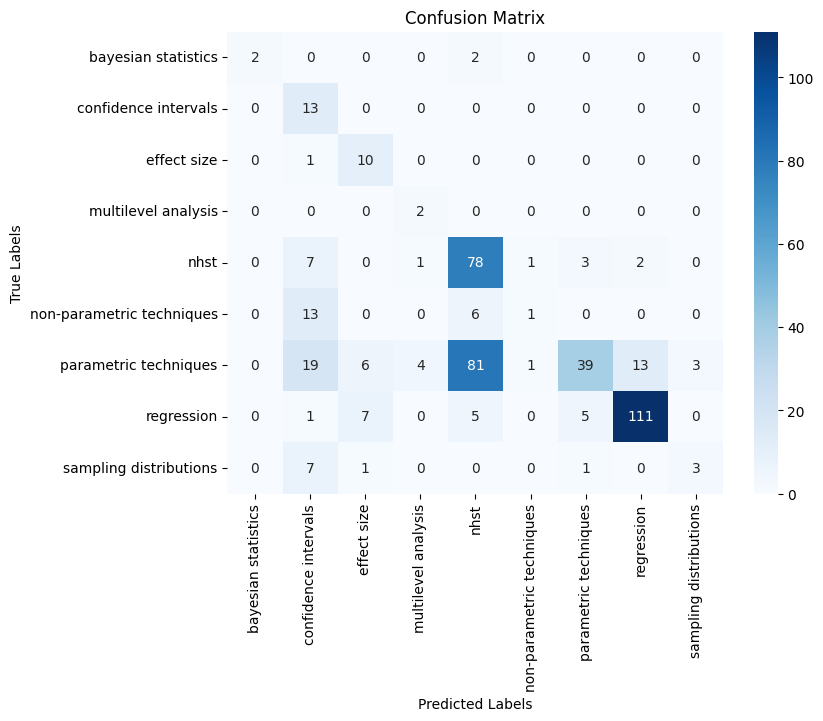

In [ ]:
# Get the unique sorted labels
labels = sorted(y_true.unique())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### Descriptive Statistics

In [ ]:
value_counts = df_des_test['second_level'].value_counts()
value_counts

second_level
summary statistics      82
data representation     19
score interpretation     8
Name: count, dtype: int64

In [ ]:
df_des_test.shape

(109, 33)

In [ ]:
import codecs

def decode_escapes(text):
    if not isinstance(text, str):
        return text
    # codecs.decode with 'unicode_escape' decodes \r, \n, \t, \\, etc.
    try:
        return codecs.decode(text, 'unicode_escape')
    except Exception:
        # If it fails, just return original text
        return text

df_des_test['question_format'] = df_des_test['question'].apply(decode_escapes)

<ipython-input-33-3137083150>:8: DeprecationWarning: invalid escape sequence '\m'
  return codecs.decode(text, 'unicode_escape')
'
  return codecs.decode(text, 'unicode_escape')
<ipython-input-33-3137083150>:8: DeprecationWarning: invalid escape sequence '\p'
  return codecs.decode(text, 'unicode_escape')
<ipython-input-33-3137083150>:8: DeprecationWarning: invalid escape sequence '\o'
  return codecs.decode(text, 'unicode_escape')


In [ ]:
# Define instructions with a prompt structure
# System message: sets behavior and roleplay tone
system_message = """
You are an expert in educational content evaluation, specializing in university-level Statistics.
You classify questions according to core statistical concepts. You should act as an expert in understanding
and interpreting questions written in Dutch.
"""

# Template for the prompt (user message)
user_template = """
Analyze the following Dutch question to determine the most appropriate topic from this list of statistical concepts:
['summary statistics', 'data representation', 'score interpretation'].

Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Internally, think step-by-step as follows:
Step 1: Read and understand the Dutch question. Summarize its main statistical focus in English.
Step 2: Identify key statistical terms or concepts implicit or explicit in the question.
Step 3: Match these terms to the most appropriate topic from the given list, highlighting why the selected topic fits best and why others do not.
Step 4: Provide a detailed rationale explaining why you selected this topic.

Important: Although the question is in Dutch, your output must be in English.

Output ONLY the following:
Final Topic: <exact topic from the list>
Rationale: <detailed explanation for the selected topic>

Question: {input}
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = user_template.format(input=question_text)  # Format the prompt with the actual question text
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": system_message.strip()},
            {"role": "user", "content": prompt.strip()}
        ],
        temperature=0.3,
        max_tokens=150
    )

    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = user_template.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_experts_cross'] = prompts
    df['output_experts_cross'] = outputs

    return df

In [ ]:
# Apply the function to each question in the 'question' column
df_des_test = apply_with_delay(df_des_test, rpm_limit=10000)

In [ ]:
# Extract only the topic from the full model response
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return None

# Apply the topic extraction
df_des_test['predicted_topic_experts_cross'] = df_des_test['output_experts_cross'].apply(extract_topic)

In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_des_test['second_level'].str.lower()
y_pred = df_des_test['predicted_topic_experts_cross']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()), digits=4)
print(report)

                      precision    recall  f1-score   support

 data representation     0.4615    0.6316    0.5333        19
score interpretation     0.2222    0.7500    0.3429         8
  summary statistics     0.9107    0.6220    0.7391        82

            accuracy                         0.6330       109
           macro avg     0.5315    0.6678    0.5384       109
        weighted avg     0.7819    0.6330    0.6742       109



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6330275229357798


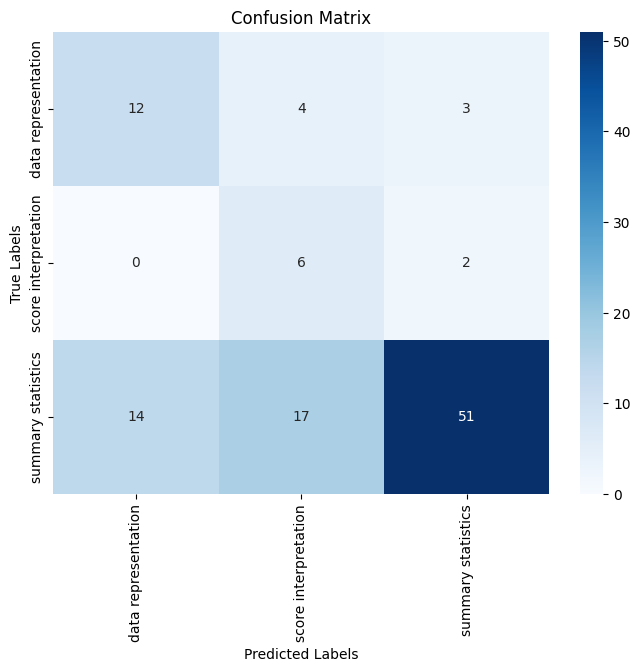

In [ ]:
# Get the unique sorted labels
labels = sorted(y_true.unique())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### Probablity

In [ ]:
value_counts = df_prob_test['second_level'].value_counts()
value_counts

second_level
general rules              32
random variables           27
sample space                8
events                      5
conditional probability     4
Name: count, dtype: int64

In [ ]:
df_prob_test.shape

(76, 33)

In [ ]:
import codecs

def decode_escapes(text):
    if not isinstance(text, str):
        return text
    # codecs.decode with 'unicode_escape' decodes \r, \n, \t, \\, etc.
    try:
        return codecs.decode(text, 'unicode_escape')
    except Exception:
        # If it fails, just return original text
        return text

df_prob_test['question_format'] = df_prob_test['question'].apply(decode_escapes)

'
  return codecs.decode(text, 'unicode_escape')
<ipython-input-49-3157745235>:8: DeprecationWarning: invalid escape sequence '\|'
  return codecs.decode(text, 'unicode_escape')
<ipython-input-49-3157745235>:8: DeprecationWarning: invalid escape sequence '\<'
  return codecs.decode(text, 'unicode_escape')


In [ ]:
# Define instructions with a prompt structure
# System message: sets behavior and roleplay tone
system_message = """
You are an expert in educational content evaluation, specializing in university-level Statistics.
You classify questions according to core statistical concepts. You should act as an expert in understanding
and interpreting questions written in Dutch.
"""

# Template for the prompt (user message)
user_template = """
Analyze the following Dutch question to determine the most appropriate topic from this list of statistical concepts:
['general rules', 'random variables', 'sample space','events', 'conditional probability'].

Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Internally, think step-by-step as follows:
Step 1: Read and understand the Dutch question. Summarize its main statistical focus in English.
Step 2: Identify key statistical terms or concepts implicit or explicit in the question.
Step 3: Match these terms to the most appropriate topic from the given list, highlighting why the selected topic fits best and why others do not.
Step 4: Provide a detailed rationale explaining why you selected this topic.

Important: Although the question is in Dutch, your output must be in English.

Output ONLY the following:
Final Topic: <exact topic from the list>
Rationale: <detailed explanation for the selected topic>

Question: {input}
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = user_template.format(input=question_text)  # Format the prompt with the actual question text
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": system_message.strip()},
            {"role": "user", "content": prompt.strip()}
        ],
        temperature=0.3,
        max_tokens=150
    )

    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = user_template.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_experts_cross'] = prompts
    df['output_experts_cross'] = outputs

    return df

In [ ]:
# Apply the function to each question in the 'question' column
df_prob_test = apply_with_delay(df_prob_test, rpm_limit=10000)

In [ ]:
# Extract only the topic from the full model response
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return None

# Apply the topic extraction
df_prob_test['predicted_topic_experts_cross'] = df_prob_test['output_experts_cross'].apply(extract_topic)

In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_prob_test['second_level'].str.lower()
y_pred = df_prob_test['predicted_topic_experts_cross']

# Generate and print the classification report
# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()), digits=4)
print(report)

                         precision    recall  f1-score   support

conditional probability     0.1364    0.7500    0.2308         4
                 events     0.1562    1.0000    0.2703         5
          general rules     0.5000    0.0312    0.0588        32
       random variables     1.0000    0.2963    0.4571        27
           sample space     0.6667    0.5000    0.5714         8

              micro avg     0.3000    0.2763    0.2877        76
              macro avg     0.4919    0.5155    0.3177        76
           weighted avg     0.6534    0.2763    0.2773        76



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}") #18%

Accuracy: 0.27631578947368424


In [ ]:
# Define your list of allowed topics (all should be lowercase if your extraction function lowercases topics)
allowed_topics = ['general rules','random variables','sample space','events','conditional probability']

# Count how many rows do NOT match the allowed topics
invalid_rows = df_prob_test[~df_prob_test['predicted_topic_experts_cross'].isin(allowed_topics)]
invalid_rows.shape

(6, 33)

In [ ]:
invalid_rows['predicted_topic_experts_cross'].unique()

array(["expected value' (which is closely related to 'general rules' in the context of probability and decision-making)",
       'expected value (implied within the context of the question, but not explicitly listed)',
       "expected value of a random variable (implied under 'random variables')",
       "expected value' (implied within the context of the question)",
       "expected value' (note: since 'expected value' is not explicitly listed in the provided options, the most relevant concept from the list is 'general rules' as it encompasses fundamental probability and expectation calculations.)",
       "expected value (which is related to the concept of random variables and expectation, but since that is not explicitly listed, the closest fit is 'random variables' as it involves probabilistic outcomes and their expectations)."],
      dtype=object)

In [ ]:
def clean_predicted_topic(entry):
    if pd.isnull(entry):
        return None

    x_lower = entry.lower()

    # If any parenthesis content contains " or ", mark as ambiguous
    notes = re.findall(r'\(([^)]*)\)', x_lower)
    for note in notes:
        if ' or ' in note:
            return 'mixed'

    # Return the most relevant valid category if clearly mentioned
    for cat in allowed_topics:
        if cat in x_lower:
            return cat

    # Otherwise, keep original text
    return entry

# Filter invalid rows mask
mask_invalid = ~df_prob_test['predicted_topic_experts_cross'].isin(allowed_topics)

# Apply the cleaning function only to invalid rows
df_prob_test.loc[mask_invalid, 'new_predicted_topic_experts_cross'] = (
    df_prob_test.loc[mask_invalid, 'predicted_topic_experts_cross'].apply(clean_predicted_topic)
)

# For valid rows, just copy original value (or you can decide differently)
df_prob_test.loc[~mask_invalid, 'new_predicted_topic_experts_cross'] = (
    df_prob_test.loc[~mask_invalid, 'predicted_topic_experts_cross']
)

# Re-create invalid_rows based on updated df_prob_test (to have the new column)
invalid_rows = df_prob_test[~df_prob_test['predicted_topic_experts_cross'].isin(allowed_topics)]

# Select the two columns you want to check
checking = invalid_rows[['new_predicted_topic_experts_cross', 'predicted_topic_experts_cross']]
checking

new_predicted_topic_experts_cross  \
5                                       general rules   
16  expected value (implied within the context of ...   
18                                   random variables   
21  expected value' (implied within the context of...   
23                                      general rules   
26                                   random variables   

                        predicted_topic_experts_cross  
5   expected value' (which is closely related to '...  
16  expected value (implied within the context of ...  
18  expected value of a random variable (implied u...  
21  expected value' (implied within the context of...  
23  expected value' (note: since 'expected value' ...  
26  expected value (which is related to the concep...

In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_prob_test['second_level'].str.lower()
y_pred = df_prob_test['new_predicted_topic_experts_cross']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()), digits=4)
print(report)

                         precision    recall  f1-score   support

conditional probability     0.1364    0.7500    0.2308         4
                 events     0.1562    1.0000    0.2703         5
          general rules     0.5000    0.0625    0.1111        32
       random variables     0.9000    0.3333    0.4865        27
           sample space     0.6667    0.5000    0.5714         8

              micro avg     0.3108    0.3026    0.3067        76
              macro avg     0.4719    0.5292    0.3340        76
           weighted avg     0.6179    0.3026    0.3097        76



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3026315789473684


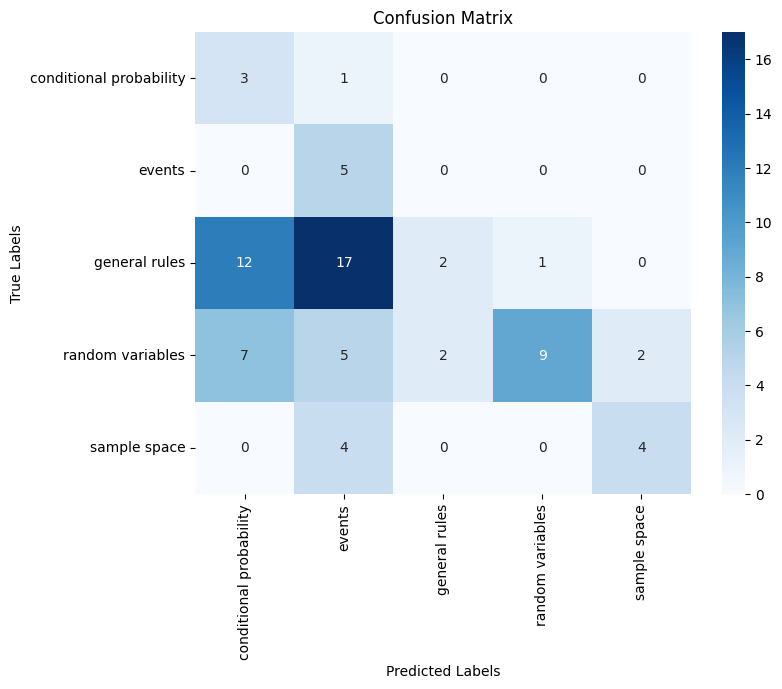

In [ ]:
# Get the unique sorted labels
labels = sorted(y_true.unique())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### Distributions

In [ ]:
value_counts = df_dist_test['second_level'].value_counts()
value_counts

second_level
continuous        33
discrete           7
limit theorems     2
Name: count, dtype: int64

In [ ]:
df_dist_test.shape

(42, 32)

In [ ]:
import codecs

def decode_escapes(text):
    if not isinstance(text, str):
        return text
    # codecs.decode with 'unicode_escape' decodes \r, \n, \t, \\, etc.
    try:
        return codecs.decode(text, 'unicode_escape')
    except Exception:
        # If it fails, just return original text
        return text

df_dist_test['question_format'] = df_dist_test['question'].apply(decode_escapes)

'
  return codecs.decode(text, 'unicode_escape')
<ipython-input-65-2863373530>:8: DeprecationWarning: invalid escape sequence '\.'
  return codecs.decode(text, 'unicode_escape')
<ipython-input-65-2863373530>:8: DeprecationWarning: invalid escape sequence '\~'
  return codecs.decode(text, 'unicode_escape')


In [ ]:
# Define instructions with a prompt structure
# System message: sets behavior and roleplay tone
system_message = """
You are an expert in educational content evaluation, specializing in university-level Statistics.
You classify questions according to core statistical concepts. You should act as an expert in understanding
and interpreting questions written in Dutch.
"""

# Template for the prompt (user message)
user_template = """
Analyze the following Dutch question to determine the most appropriate topic from this list of statistical concepts:
['continuous', 'discrete', 'limit theorems'].

Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Internally, think step-by-step as follows:
Step 1: Read and understand the Dutch question. Summarize its main statistical focus in English.
Step 2: Identify key statistical terms or concepts implicit or explicit in the question.
Step 3: Match these terms to the most appropriate topic from the given list, highlighting why the selected topic fits best and why others do not.
Step 4: Provide a detailed rationale explaining why you selected this topic.

Important: Although the question is in Dutch, your output must be in English.

Output ONLY the following:
Final Topic: <exact topic from the list>
Rationale: <detailed explanation for the selected topic>

Question: {input}
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = user_template.format(input=question_text)  # Format the prompt with the actual question text
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": system_message.strip()},
            {"role": "user", "content": prompt.strip()}
        ],
        temperature=0.3,
        max_tokens=150
    )

    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = user_template.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_experts_cross'] = prompts
    df['output_experts_cross'] = outputs

    return df

In [ ]:
# Apply the function to each question in the 'question' column
df_dist_test = apply_with_delay(df_dist_test, rpm_limit=10000)

In [ ]:
# Extract only the topic from the full model response
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return None

# Apply the topic extraction
df_dist_test['predicted_topic_experts_cross'] = df_dist_test['output_experts_cross'].apply(extract_topic)

In [ ]:
from sklearn.metrics import classification_report

# Make sure both series are lowercase and aligned
y_true = df_dist_test['second_level'].str.lower()
y_pred = df_dist_test['predicted_topic_experts_cross']

# Generate and print the classification report
report = classification_report(y_true, y_pred, labels=sorted(y_true.unique()), digits=4)
print(report)

                precision    recall  f1-score   support

    continuous     1.0000    0.3333    0.5000        33
      discrete     0.2609    0.8571    0.4000         7
limit theorems     0.2500    1.0000    0.4000         2

      accuracy                         0.4524        42
     macro avg     0.5036    0.7302    0.4333        42
  weighted avg     0.8411    0.4524    0.4786        42



In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4523809523809524


In [ ]:
# Define your list of allowed topics (all should be lowercase if your extraction function lowercases topics)
allowed_topics = ['continuous','discrete','limit theorems']

# Count how many rows do NOT match the allowed topics
invalid_rows = df_dist_test[~df_dist_test['predicted_topic_experts_cross'].isin(allowed_topics)]
invalid_rows.shape

(0, 32)

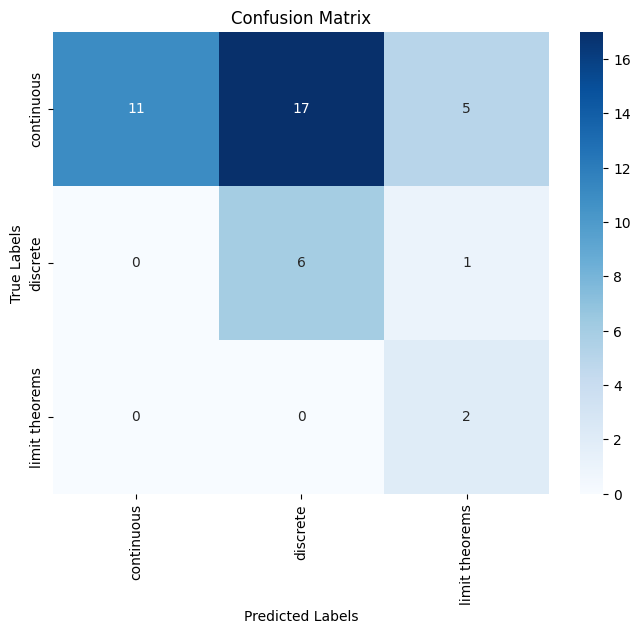

In [ ]:
# Get the unique sorted labels
labels = sorted(y_true.unique())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## 3.3 Not givining label to GPT

In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import os
from google.colab import drive
drive.mount("/content/drive")
data_path = '/content/drive/MyDrive/Thesis/'

Mounted at /content/drive


In [ ]:
# Initialize the OpenAI client with your API key
openai.api_key ='' #include API

#### Baseline Prompt
System: You are an expert in educational content evaluation, specializing in university-level Statistics. You classify questions according to core statistical concepts.

User: Analyze the following question to determine the most appropriate topic of statistical concepts. Your task is to examine the question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Please provide both the topic and rationale as follows:

Final Topic: <topic>
Rationale: <detailed explanation for the selected topic>

Question: {input}

In [ ]:
# Define instructions with a prompt structure
instructions = """
Analyze the following question to determine the most appropriate topic of statistical concepts. Your task is to examine the question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Please provide both the topic and rationale as follows:

Final Topic: <topic>
Rationale: <detailed explanation for the selected topic>

Question: {input}
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = instructions.format(input=question_text)  # Format the prompt with the actual question text

    # Make the API call
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": "You are an expert in educational content evaluation, specializing in university-level Statistics. You classify questions according to core statistical concepts."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.3,
        max_tokens=150
    )

    # Extract the predicted topic and rationale from the assistant's message
    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = instructions.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_baseline'] = prompts
    df['output_baseline'] = outputs

    return df

In [ ]:
df_gpt_test_nonlabel = apply_with_delay(df_gpt_test_nonlabel, rpm_limit=10000)

In [ ]:
df_gpt_test_nonlabel.to_csv(data_path + 'df_gpt_test_nonlabel_baseline.csv', index=False)

In [ ]:
# Extract only the topic from the full model response
import re
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return None


# Apply the topic extraction
df_gpt_test_nonlabel['predicted_topic_baseline'] = df_gpt_test_nonlabel['output_baseline'].apply(extract_topic)

In [ ]:
from sentence_transformers import SentenceTransformer, util

# Prepare lowercase true and predicted labels
true_labels = df_gpt_test_nonlabel['exsection'].str.lower().str.replace('/', ' ', regex=False).str.strip()
pred_labels = df_gpt_test_nonlabel['predicted_topic_baseline'].str.lower()

# Load embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define threshold
threshold = 0.5

# Track correct predictions and store similarities
similarities = []
num_correct = 0
total = len(true_labels)

# Iterate and compute cosine similarity
for true_label, pred_label in zip(true_labels, pred_labels):
    emb_true = model.encode(true_label, convert_to_tensor=True)
    emb_pred = model.encode(pred_label, convert_to_tensor=True)
    similarity = util.pytorch_cos_sim(emb_true, emb_pred).item()
    similarities.append(similarity)

    if similarity >= threshold:
        num_correct += 1

# Save similarity column to DataFrame
df_gpt_test_nonlabel['similarity_baseline'] = similarities

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
x = df_gpt_test_nonlabel[
    (df_gpt_test_nonlabel['similarity_baseline'] < 0.5) &
    (df_gpt_test_nonlabel['gpt_match_baseline'] == 1)
]
x[['predicted_topic_baseline','similarity_baseline','gpt_match_baseline','exsection']]

predicted_topic_baseline  \
3                                           regression analysis - assumptions and diagnostics   
9                                                   multiple regression and multicollinearity   
11                                                                          multicollinearity   
21                                             data transformation and descriptive statistics   
22                                               data manipulation and descriptive statistics   
41                                               correlation and coefficient of determination   
46                                                    spearman's rank correlation coefficient   
47                                                      spearman rank correlation coefficient   
55                                                        scatterplots (spreidingsdiagrammen)   
62                                    descriptive statistics – boxplots and data distribution   
99                                                            variance and sample variability   
103                                                               sample variance calculation   
114                                            correlation and relationship between variables   
150                                                  sampling distribution of the sample mean   
169                                  empirical rule (68-95-99.7 rule) in normal distributions   
174  binomial approximation to normal distribution (or probability of proportion in a sample)   
188                                  anova (analysis of variance) and effect size measurement   
189                                                                multiple linear regression   
190                                                                multiple linear regression   
194               anova (analysis of variance) / multiple regression with categorical factors   
203                                                           two-way anova (factorial anova)   
214                                                       multiple linear regression analysis   
219                                           hypothesis testing and statistical significance   
220                                                             analyse van variantie (anova)   
247                                                hypothesis testing and significance levels   
250                                              hypothesis testing and statistical inference   
254                                       analysis of variance (anova) and degrees of freedom   
257                                                        hypothesis testing and error types   
259                                          sample size determination for hypothesis testing   
260                                        hypothesis testing and significance of correlation   
263                                  hypothesis testing — parametric vs. non-parametric tests   
264                                        hypothesis testing and significance of correlation   
265                                                         regression analysis and model fit   
267                              multiple regression analysis / predictor variable importance   
268                                       multiple linear regression and predictor evaluation   
270                                             multiple hypothesis testing and error control   
271                                                   hypothesis testing for comparing groups   
290                                    hypothesis testing and errors in statistical inference   
292                                                bayes' theorem and conditional probability   
293                                                conditional probability and bayes' theorem   
294                                                conditional probability and bayes' theore

In [ ]:
from sentence_transformers import SentenceTransformer, util

# Prepare lowercase true and predicted labels (no need to assign back to df)
true_labels = df_gpt_test_nonlabel['exsection'].str.lower().str.replace('/', ' ', regex=False).str.strip()
pred_labels = df_gpt_test_nonlabel['predicted_topic_baseline'].str.lower()

# Load embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define threshold
threshold = 0.5

# Track correct predictions
num_correct = 0
total = len(true_labels)

# Iterate and compute on the fly
for true_label, pred_label in zip(true_labels, pred_labels):
    emb_true = model.encode(true_label, convert_to_tensor=True)
    emb_pred = model.encode(pred_label, convert_to_tensor=True)
    similarity = util.pytorch_cos_sim(emb_true, emb_pred).item()

    if similarity >= threshold:
        num_correct += 1

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Correct predictions: 403 out of 784
Accuracy: 0.514


In [ ]:
# Calculate accuracy
accuracy = num_correct / total
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.514


In [ ]:
## with GPT
df_gpt_test_nonlabel['true_label'] = df_gpt_test_nonlabel['exsection'].str.lower().str.replace('/', ' ', regex=False).str.strip()
df_gpt_test_nonlabel['gpt_prediction'] = df_gpt_test_nonlabel['predicted_topic_baseline'].str.lower()

# Set the system message
system_message = """
You are an expert in educational content evaluation, specializing in university-level Statistics.
Your task is to determine whether a predicted statistical topic is semantically close enough to a ground truth label used in a curriculum classification system.
"""

# Define a function to format the user prompt
def format_prompt(true_label, prediction):
    return f"""
You will be given two pieces of information:
1. A ground truth label that represents the topic of a statistics question, taken from a course outline. This label may include hierarchical structure (e.g. "Probability / Elementary Probability / General Rules / Addition rule").
2. A predicted label generated by a language model, based on the content of the same question.

Please determine whether the predicted label is a valid match for the true label. Consider the semantic similarity of the core statistical concepts and not the formatting. Focus on whether the prediction refers to the **same statistical topic or idea**, even if expressed differently.

Respond with:
Match: Yes or No
Explanation: A brief justification of your decision.

Ground Truth Label: {true_label}
Predicted Label: {prediction}
""".strip()

# Define a function to call the OpenAI API and get a response
def evaluate_match(true_label, prediction):
    prompt = format_prompt(true_label, prediction)
    try:
        response = openai.chat.completions.create(
            model="gpt-4.1-nano-2025-04-14",
            messages=[
                {"role": "system", "content": system_message.strip()},
                {"role": "user", "content": prompt}
            ],
            temperature=0.3,
            max_tokens=150
        )
        result = response.choices[0].message.content
        # Split into Match and Explanation
        lines = result.splitlines()
        match = next((line.split(":")[1].strip() for line in lines if line.startswith("Match:")), "N/A")
        explanation = next((line.split(":", 1)[1].strip() for line in lines if line.startswith("Explanation:")), "N/A")
        return match, explanation
    except Exception as e:
        print(f"Error processing: {true_label} | {prediction} — {e}")
        return "Error", str(e)

In [ ]:
# Create new columns in the DataFrame
matches = []
explanations = []

for idx, row in df_gpt_test_nonlabel.iterrows():
    true_label = row['true_label']
    predicted_label = row['gpt_prediction']
    match, explanation = evaluate_match(true_label, predicted_label)
    matches.append(match)
    explanations.append(explanation)
    time.sleep(0.01)  # Respect API rate limits

In [ ]:
# Add results to the DataFrame
matches = pd.Series(matches)
explanation = pd.Series(explanations)
df_gpt_test_nonlabel['gpt_match_baseline'] = matches.map({'Yes': 1, 'No': 0})
df_gpt_test_nonlabel['gpt_match_explanation'] = explanations


# Calculate accuracy as the mean of the numeric column
accuracy = df_gpt_test_nonlabel['gpt_match_baseline'].mean()

print(f"Accuracy: {accuracy:.2%}")

Accuracy: 70.79%


In [ ]:
accuracy_per_class = (
    df_gpt_test_nonlabel
    .groupby('first_level')['gpt_match_baseline']
    .agg(['mean', 'size'])
    .rename(columns={'mean': 'accuracy', 'size': 'n'})
    .sort_values('n', ascending=False)
)
# Format the accuracy as percentage with 2 decimals
accuracy_per_class['accuracy'] = (accuracy_per_class['accuracy'] * 100).round(2)
accuracy_per_class

accuracy    n
first_level                          
inferential statistics     81.16  483
descriptive statistics     55.46  119
probability                58.95   95
distributions              40.48   42
assumptions                42.11   19
reliability                50.00   10
factor analysis            87.50    8
type of variable           50.00    8

In [ ]:
import time
import re
import pandas as pd
import datetime

# Prompt template
instructions = """
Analyze the following question to determine the most appropriate topic of statistical concepts. Your task is to examine the question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Please provide both the topic and rationale as follows:

Final Topic: <topic>
Rationale: <detailed explanation for the selected topic>

Question: {input}
"""

# Function to extract topic
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()
        topic = topic.strip("'").strip("*")
        return topic
    return None

# Function to call OpenAI
def get_topic_from_question(question_text):
    prompt = instructions.format(input=question_text)
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": "You are an expert in educational content evaluation, specializing in university-level Statistics. You classify questions according to core statistical concepts."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.3,
        max_tokens=150
    )
    return response.choices[0].message.content.strip()

# Apply prompt with delay and ETA
def apply_with_delay(df, rpm_limit, run_number):
    delay_time = 60 / rpm_limit
    outputs = []

    num_questions = len(df)
    start_time = time.time()

    for i, question in enumerate(df['question_format']):
        response = get_topic_from_question(question)
        outputs.append(response)

        # Estimate remaining time
        elapsed = time.time() - start_time
        avg_time_per_question = elapsed / (i + 1)
        remaining_time = avg_time_per_question * (num_questions - (i + 1))

        # Show progress every 10 questions
        if (i + 1) % 10 == 0 or i == num_questions - 1:
            eta = str(datetime.timedelta(seconds=int(remaining_time)))
            print(f"Run {run_number} | Processed {i + 1}/{num_questions} | ETA: {eta}")

        time.sleep(delay_time)

    # Save results for this run
    df[f'output_run{run_number}'] = outputs
    df[f'predicted_topic_run{run_number}'] = [extract_topic(text) for text in outputs]

    return df

In [ ]:
# === MAIN EXECUTION ===

# Prepare DataFrame
df_temp = df_gpt_test_nonlabel.copy()

# Save prompt only once
df_temp['prompt'] = df_temp['question_format'].apply(lambda q: instructions.format(input=q))

# Run multiple times and save after each
for run in range(1, 6):
    print(f"\n=== Starting Run {run} ===")
    df_temp = apply_with_delay(df_temp, rpm_limit=10000, run_number=run)

    # Save after each run
    intermediate_path = data_path + f'df_gpt_test_nonlabel_after_run{run}.csv'
    df_temp.to_csv(intermediate_path, index=False)
    print(f"✅ Run {run} complete. Saved to {intermediate_path}")


=== Starting Run 1 ===
Run 1 | Processed 10/784 | ETA: 0:16:04
Run 1 | Processed 20/784 | ETA: 0:16:12
Run 1 | Processed 30/784 | ETA: 0:15:15
Run 1 | Processed 40/784 | ETA: 0:15:18
Run 1 | Processed 50/784 | ETA: 0:15:17
Run 1 | Processed 60/784 | ETA: 0:15:03
Run 1 | Processed 70/784 | ETA: 0:14:40
Run 1 | Processed 80/784 | ETA: 0:14:24
Run 1 | Processed 90/784 | ETA: 0:14:17
Run 1 | Processed 100/784 | ETA: 0:14:07
Run 1 | Processed 110/784 | ETA: 0:13:58
Run 1 | Processed 120/784 | ETA: 0:13:46
Run 1 | Processed 130/784 | ETA: 0:13:40
Run 1 | Processed 140/784 | ETA: 0:13:33
Run 1 | Processed 150/784 | ETA: 0:13:19
Run 1 | Processed 160/784 | ETA: 0:13:21
Run 1 | Processed 170/784 | ETA: 0:13:34
Run 1 | Processed 180/784 | ETA: 0:13:18
Run 1 | Processed 190/784 | ETA: 0:13:07
Run 1 | Processed 200/784 | ETA: 0:12:51
Run 1 | Processed 210/784 | ETA: 0:12:36
Run 1 | Processed 220/784 | ETA: 0:12:24
Run 1 | Processed 230/784 | ETA: 0:12:10
Run 1 | Processed 240/784 | ETA: 0:12:04
R

In [ ]:
df_temp.head()

url  \
0  https://raw.githubusercontent.com/ShareStats/i...   
1  https://raw.githubusercontent.com/ShareStats/i...   
2  https://raw.githubusercontent.com/ShareStats/i...   
3  https://raw.githubusercontent.com/ShareStats/i...   
4  https://raw.githubusercontent.com/ShareStats/i...   

                        title  \
0      eur-assumptions-103-nl   
1      eur-assumptions-104-nl   
2       uu-assumptions-203-nl   
3  uu-Homoscedasticity-023-nl   
4  uu-Homoscedasticity-025-nl   

                                                body  \
0  exname: eur-assumptions-103-nl \r\n extype: nu...   
1  exname: eur-assumptions-104-nl \r\n extype: nu...   
2  exname: uu-assumptions-203-nl \r\n extype: sch...   
3  exname: uu-Homoscedasticity-023-nl.Rmd \r\n ex...   
4  exname: uu-Homoscedasticity-025-nl.Rmd \r\n ex...   

                                            question  \
0  *Ter beschikking gesteld (TBS)*\r\nEr is in Ne...   
1  *Testing effect* \r\nUit onderzoek is gebleken...   
2  Welke assumptie(s) kan je checken met een spre...   
3  Een van de voorwaarden van een regressieanalys...   
4    \r\nEr is sprake van heteroscedasticiteit al...   

                           exname   extype exsolution  extol  \
0          eur-assumptions-103-nl      num      0.935    0.0   
1          eur-assumptions-104-nl      num      0.291    0.0   
2           uu-assumptions-203-nl  schoice       0001    NaN   
3  uu-Homoscedasticity-023-nl.Rmd  schoice       0001    NaN   
4  uu-Homoscedasticity-025-nl.Rmd  schoice       0001    NaN   

                                           exsection                 Type  \
0                 assumptions / sphericity / epsilon  performing analysis   
1  assumptions / homogeneity of variance / levene...  performing analysis   
2                                        assumptions           conceptual   
3                     assumptions / homoscedasticity  performing analysis   
4                     assumptions / homoscedasticity   interpreting graph   

   ...                                        output_run1  \
0  ...  Final Topic: Repeated Measures ANOVA (Analysis...   
1  ...  Final Topic: One-Way ANOVA (Analysis of Varian...   
2  ...  Final Topic: Assumpties voor regressieanalyse ...   
3  ...  Final Topic: Regression Analysis – Assumptions...   
4  ...  Final Topic: Regression Assumptions and Hetero...   

                                predicted_topic_run1  \
0     repeated measures anova (analysis of variance)   
1  one-way anova (analysis of variance) and homog...   
2  assumpties voor regressieanalyse (regression a...   
3  regression analysis – assumptions and diagnost...   
4      regression assumptions and heteroscedasticity   

                                         output_run2  \
0  Final Topic: Repeated Measures ANOVA (Analysis...   
1  Final Topic: One-Way ANOVA (Analysis of Varian...   
2  Final Topic: Assumpties voor regressieanalyse ...   
3  Final Topic: Regression Assumptions – Homosced...   
4  Final Topic: Regression Assumptions and Hetero...   

                                predicted_topic_run2  \
0     repeated measures anova (analysis of variance)   
1               one-way anova (analysis of variance)   
2  assumpties voor regressieanalyse (regression a...   
3          regression assumptions – homoscedasticity   
4      regression assumptions and heteroscedasticity   

                                         output_run3  \
0  Final Topic: Repeated Measures ANOVA\n\nRation...   
1  Final Topic: One-Way ANOVA (Analysis of Varian...   
2  Final Topic: Assumpties voor regressieanalyse ...   
3  Final Topic: Regression Assumptions – Homosced...   
4  Final Topic: Regression Assumptions and Hetero...   

                                predicted_topic_run3  \
0                            repeated measures anova   
1  one-way anova (analysis of variance) and homog...   
2  assumpties voor regressieanalyse (regression a...   
3          regression assumptions – homoscedasticity

In [ ]:
import time
import pandas as pd

# Prepare true labels
df_temp['true_label'] = df_temp['exsection'].str.lower().str.replace('/', ' ', regex=False).str.strip()

# GPT system message
system_message = """
You are an expert in educational content evaluation, specializing in university-level Statistics.
Your task is to determine whether a predicted statistical topic is semantically close enough to a ground truth label used in a curriculum classification system.
"""

# Prompt formatter
def format_prompt(true_label, prediction):
    return f"""
You will be given two pieces of information:
1. A ground truth label that represents the topic of a statistics question, taken from a course outline. This label may include hierarchical structure (e.g. "Probability / Elementary Probability / General Rules / Addition rule").
2. A predicted label generated by a language model, based on the content of the same question.

Please determine whether the predicted label is a valid match for the true label. Consider the semantic similarity of the core statistical concepts and not the formatting. Focus on whether the prediction refers to the **same statistical topic or idea**, even if expressed differently.

Respond with:
Match: Yes or No
Explanation: A brief justification of your decision.

Ground Truth Label: {true_label}
Predicted Label: {prediction}
""".strip()

# GPT API call
def evaluate_match(true_label, prediction):
    prompt = format_prompt(true_label, prediction)
    try:
        response = client.chat.completions.create(
            model="gpt-4.1-nano-2025-04-14",
            messages=[
                {"role": "system", "content": system_message.strip()},
                {"role": "user", "content": prompt}
            ],
            temperature=0.3,
            max_tokens=150
        )
        result = response.choices[0].message.content
        lines = result.splitlines()
        match = next((line.split(":", 1)[1].strip() for line in lines if line.lower().startswith("match:")), "N/A")
        explanation = next((line.split(":", 1)[1].strip() for line in lines if line.lower().startswith("explanation:")), "N/A")
        return match, explanation
    except Exception as e:
        print(f"Error on '{true_label}' vs '{prediction}': {e}")
        return "Error", str(e)

In [ ]:
import datetime

# Loop through each run
for run in range(1, 6):
    print(f"\n=== Evaluating Run {run} ===")

    matches = []
    explanations = []

    total = len(df_temp)
    start_time = time.time()

    for idx, row in df_temp.iterrows():
        true_label = row['true_label']
        predicted_label = row[f'predicted_topic_run{run}']
        match, explanation = evaluate_match(true_label, predicted_label)
        matches.append(match)
        explanations.append(explanation)

        # Estimate remaining time every 10 rows
        if (idx + 1) % 10 == 0 or (idx + 1) == total:
            elapsed = time.time() - start_time
            avg_per_item = elapsed / (idx + 1)
            remaining = avg_per_item * (total - (idx + 1))
            eta = str(datetime.timedelta(seconds=int(remaining)))
            print(f"Run {run} | {idx + 1}/{total} evaluated | ETA: {eta}")

        time.sleep(0.01)

    # Save results
    match_col = f'gpt_match_run{run}'
    explanation_col = f'gpt_explanation_run{run}'
    df_temp[match_col] = pd.Series(matches).map({'Yes': 1, 'No': 0})
    df_temp[explanation_col] = explanations

    # Accuracy and save
    accuracy = df_temp[match_col].mean()
    print(f"✅ Run {run} Accuracy: {accuracy:.2%}")
    df_temp.to_csv(data_path + f'df_temp_with_eval_run{run}.csv', index=False)

In [ ]:
# Calculate accuracy for each run
run_accuracies = [df_temp[col].mean() for col in match_cols]

# Calculate mean and sample standard deviation across 5 runs
overall_mean = np.mean(run_accuracies)
overall_std = np.std(run_accuracies, ddof=1)  # Sample std

print("\n=== Final GPT Evaluation Summary ===")
print(f"Run Accuracies: {[f'{acc:.4f}' for acc in run_accuracies]}")
print(f"Mean GPT Match Accuracy Across Runs: {overall_mean:.4f}")
print(f"Standard Deviation Across Runs: {overall_std:.4f}")


=== Final GPT Evaluation Summary ===
Run Accuracies: ['0.7219', '0.7130', '0.7079', '0.7168', '0.7143']
Mean GPT Match Accuracy Across Runs: 0.7148
Standard Deviation Across Runs: 0.0051


In [ ]:
import time
import datetime
from sentence_transformers import SentenceTransformer, util

# Prepare true labels once
df_temp['true_label'] = df_temp['exsection'].str.lower().str.replace('/', ' ', regex=False).str.strip()

# Load the model once
model = SentenceTransformer('all-MiniLM-L6-v2')

threshold = 0.5
total = len(df_temp)

for run in range(1, 6):
    print(f"\n=== Sentence-BERT Similarity Run {run} ===")

    similarities = []
    correct_flags = []
    start_time = time.time()

    pred_col = f'predicted_topic_run{run}'

    for i, row in df_temp.iterrows():
        true_label = row['true_label']
        predicted_label = row[pred_col]

        emb_true = model.encode(true_label, convert_to_tensor=True)
        emb_pred = model.encode(predicted_label, convert_to_tensor=True)
        similarity = util.pytorch_cos_sim(emb_true, emb_pred).item()

        similarities.append(similarity)

        correct = similarity >= threshold
        correct_flags.append(int(correct))

        if (i + 1) % 50 == 0 or (i + 1) == total:
            elapsed = time.time() - start_time
            avg_time = elapsed / (i + 1)
            remaining = avg_time * (total - (i + 1))
            eta = str(datetime.timedelta(seconds=int(remaining)))
            print(f"Run {run} | {i + 1}/{total} processed | ETA: {eta}")

    accuracy = sum(correct_flags) / total
    print(f"Run {run} Accuracy: {accuracy:.2%}")

    # Save to dataframe new columns
    df_temp[f'sbert_similarity_run{run}'] = similarities
    df_temp[f'sbert_correct_run{run}'] = correct_flags

# Save after all runs
df_temp.to_csv(data_path + 'df_temp_with_sbert_runs.csv', index=False)
print("✅ All Sentence-BERT runs complete and saved.")


=== Sentence-BERT Similarity Run 1 ===
Run 1 | 50/784 processed | ETA: 0:01:10
Run 1 | 100/784 processed | ETA: 0:00:58
Run 1 | 150/784 processed | ETA: 0:00:48
Run 1 | 200/784 processed | ETA: 0:00:47
Run 1 | 250/784 processed | ETA: 0:00:40
Run 1 | 300/784 processed | ETA: 0:00:35
Run 1 | 350/784 processed | ETA: 0:00:30
Run 1 | 400/784 processed | ETA: 0:00:27
Run 1 | 450/784 processed | ETA: 0:00:23
Run 1 | 500/784 processed | ETA: 0:00:19
Run 1 | 550/784 processed | ETA: 0:00:15
Run 1 | 600/784 processed | ETA: 0:00:12
Run 1 | 650/784 processed | ETA: 0:00:09
Run 1 | 700/784 processed | ETA: 0:00:05
Run 1 | 750/784 processed | ETA: 0:00:02
Run 1 | 784/784 processed | ETA: 0:00:00
Run 1 Accuracy: 51.53%

=== Sentence-BERT Similarity Run 2 ===
Run 2 | 50/784 processed | ETA: 0:00:30
Run 2 | 100/784 processed | ETA: 0:00:30
Run 2 | 150/784 processed | ETA: 0:00:29
Run 2 | 200/784 processed | ETA: 0:00:26
Run 2 | 250/784 processed | ETA: 0:00:23
Run 2 | 300/784 processed | ETA: 0:00:

In [ ]:
import numpy as np

# Accuracy values from your runs (as proportions)
accuracies = np.array([0.5153, 0.5102, 0.5255, 0.5179, 0.5179])

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)

print(f"Mean Accuracy: {mean_acc:.4f} ({mean_acc:.2%})")
print(f"Standard Deviation: {std_acc:.4f} ({std_acc:.2%})")

Mean Accuracy: 0.5174 (51.74%)
Standard Deviation: 0.0049 (0.49%)


### Experts
System: You are simulating a panel of three expert statistics instructors who are collaboratively analyzing student assessment questions.
Each expert is brilliant, logical, detail-oriented, and highly critical. Their task is to discuss and determine what statistical knowledge components and cognitive skills the question assesses.
The discussion should reflect thoughtful academic reasoning and rigorous pedagogical analysis.

User: The following question is part of a low-stakes assessment in a university-level statistics course.

Simulate a collaborative discussion among three expert instructors. Each expert should interpret the question, then articulate their reasoning in detail and
in real time, referencing one another, asking questions, making corrections, and building consensus. The conversation should
reflect a deep analysis of the question, focusing on what knowledge and skills it is testing.

You must not output the discussion, but ONLY the following:

Final Topic: <exact topic from the list above>
Rationale: <detailed explanation for the selected topic>

Question: {input}

In [ ]:
# Define instructions with a prompt structure
# System message: sets behavior and roleplay tone
system_message = """
You are simulating a panel of three expert statistics instructors who are collaboratively analyzing student assessment questions.
Each expert is brilliant, logical, detail-oriented, and highly critical. Their task is to discuss and determine what statistical knowledge components and cognitive skills the question assesses.
The discussion should reflect thoughtful academic reasoning and rigorous pedagogical analysis.
"""

# Template for the prompt (user message)
user_template = """
The following question is part of a low-stakes assessment in a university-level statistics course.

Simulate a collaborative discussion among three expert instructors. Each expert should interpret the question, then articulate their reasoning in detail and
in real time, referencing one another, asking questions, making corrections, and building consensus. The conversation should
reflect a deep analysis of the question, focusing on what knowledge and skills it is testing.

You must not output the discussion, but ONLY the following:

Final Topic: <exact topic from the list above>
Rationale: <detailed explanation for the selected topic>

Question: {input}
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = user_template.format(input=question_text)  # Format the prompt with the actual question text
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": system_message.strip()},
            {"role": "user", "content": prompt.strip()}
        ],
        temperature=0.3,
        max_tokens=150
    )

    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = user_template.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_experts'] = prompts
    df['output_experts'] = outputs

    return df

In [ ]:
df_gpt_test_nonlabel = apply_with_delay(df_gpt_test_nonlabel, rpm_limit=10000)

In [ ]:
df_gpt_test_nonlabel.to_csv(data_path + 'df_gpt_test_nonlabel_baseline&experts.csv', index=False)

In [ ]:
# Extract only the topic from the full model response
import re
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return None


# Apply the topic extraction
df_gpt_test_nonlabel['predicted_topic_experts'] = df_gpt_test_nonlabel['output_experts'].apply(extract_topic)

In [ ]:
from sentence_transformers import SentenceTransformer, util

# Prepare lowercase true and predicted labels (no need to assign back to df)
true_labels = df_gpt_test_nonlabel['exsection'].str.lower().str.replace('/', ' ', regex=False).str.strip()
pred_labels = df_gpt_test_nonlabel['predicted_topic_experts'].str.lower()

# Load embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define threshold
threshold = 0.5

# Track correct predictions
num_correct = 0
total = len(true_labels)

# Iterate and compute on the fly
for true_label, pred_label in zip(true_labels, pred_labels):
    emb_true = model.encode(true_label, convert_to_tensor=True)
    emb_pred = model.encode(pred_label, convert_to_tensor=True)
    similarity = util.pytorch_cos_sim(emb_true, emb_pred).item()

    if similarity >= threshold:
        num_correct += 1

In [ ]:
# Calculate accuracy
accuracy = num_correct / total
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.416


In [ ]:
## with GPT
df_gpt_test_nonlabel['true_label'] = df_gpt_test_nonlabel['exsection'].str.lower().str.replace('/', ' ', regex=False).str.strip()
df_gpt_test_nonlabel['gpt_prediction'] = df_gpt_test_nonlabel['predicted_topic_experts'].str.lower()

# Set the system message
system_message = """
You are an expert in educational content evaluation, specializing in university-level Statistics.
Your task is to determine whether a predicted statistical topic is semantically close enough to a ground truth label used in a curriculum classification system.
"""

# Define a function to format the user prompt
def format_prompt(true_label, prediction):
    return f"""
You will be given two pieces of information:
1. A ground truth label that represents the topic of a statistics question, taken from a course outline. This label may include hierarchical structure (e.g. "Probability / Elementary Probability / General Rules / Addition rule").
2. A predicted label generated by a language model, based on the content of the same question.

Please determine whether the predicted label is a valid match for the true label. Consider the semantic similarity of the core statistical concepts and not the formatting. Focus on whether the prediction refers to the **same statistical topic or idea**, even if expressed differently.

Respond with:
Match: Yes or No
Explanation: A brief justification of your decision.

Ground Truth Label: {true_label}
Predicted Label: {prediction}
""".strip()

# Define a function to call the OpenAI API and get a response
def evaluate_match(true_label, prediction):
    prompt = format_prompt(true_label, prediction)
    try:
        response = openai.chat.completions.create(
            model="gpt-4.1-nano-2025-04-14",
            messages=[
                {"role": "system", "content": system_message.strip()},
                {"role": "user", "content": prompt}
            ],
            temperature=0.3,
            max_tokens=150
        )
        result = response.choices[0].message.content
        # Split into Match and Explanation
        lines = result.splitlines()
        match = next((line.split(":")[1].strip() for line in lines if line.startswith("Match:")), "N/A")
        explanation = next((line.split(":", 1)[1].strip() for line in lines if line.startswith("Explanation:")), "N/A")
        return match, explanation
    except Exception as e:
        print(f"Error processing: {true_label} | {prediction} — {e}")
        return "Error", str(e)

In [ ]:
# Create new columns in the DataFrame
matches = []
explanations = []

for idx, row in df_gpt_test_nonlabel.iterrows():
    true_label = row['true_label']
    predicted_label = row['gpt_prediction']
    match, explanation = evaluate_match(true_label, predicted_label)
    matches.append(match)
    explanations.append(explanation)
    time.sleep(0.01)  # Respect API rate limits

In [ ]:
# Add results to the DataFrame
matches = pd.Series(matches)
explanation = pd.Series(explanations)
df_gpt_test_nonlabel['gpt_match_experts'] = matches.map({'Yes': 1, 'No': 0})
df_gpt_test_nonlabel['gpt_match_experts_explanation'] = explanations


# Calculate accuracy as the mean of the numeric column
accuracy = df_gpt_test_nonlabel['gpt_match_experts'].mean()

print(f"Accuracy: {accuracy:.2%}")

Accuracy: 65.18%


In [ ]:
accuracy_per_class = (
    df_gpt_test_nonlabel
    .groupby('first_level')['gpt_match_experts']
    .agg(['mean', 'size'])
    .rename(columns={'mean': 'accuracy', 'size': 'n'})
    .sort_values('accuracy', ascending=False)
)
# Format the accuracy as percentage with 2 decimals
accuracy_per_class['accuracy'] = (accuracy_per_class['accuracy'] * 100).round(2)
accuracy_per_class

accuracy    n
first_level                          
factor analysis            75.00    8
inferential statistics     71.84  483
type of variable           62.50    8
assumptions                57.89   19
descriptive statistics     54.62  119
probability                52.63   95
distributions              52.38   42
reliability                50.00   10

### Textbook
System: You are an expert in educational content evaluation, specializing in university-level Statistics.
You classify questions according to core statistical concepts.

User:
Below there is a question written intended for a university-level audience with existing prior knowledge on the subject of Statistics.
The question is used as a low-stakes assessment as part of an Statistics course that covers similar content.
If this question was presented in a textbook for an Statistics course, what single domain-specific topic from the following list would the page cover?
This should be based on the knowledge components and skills the question assesses.

Please provide both the topic and rationale as follows:

Final Topic: <exact topic from the list above>
Rationale: <detailed explanation for the selected topic>

Question: {input}

In [ ]:
# Define instructions with a prompt structure
# System message: sets behavior and roleplay tone
system_message = """
You are an expert in educational content evaluation, specializing in university-level Statistics.
You classify questions according to core statistical concepts.
"""

# Template for the prompt (user message)
user_template = """
Below there is a question written intended for a university-level audience with existing prior knowledge on the subject of Statistics.
The question is used as a low-stakes assessment as part of an Statistics course that covers similar content.
If this question was presented in a textbook for an Statistics course, what single domain-specific topic from the following list would the page cover?
This should be based on the knowledge components and skills the question assesses.

Please provide both the topic and rationale as follows:

Final Topic: <exact topic from the list above>
Rationale: <detailed explanation for the selected topic>

Question: {input}
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = user_template.format(input=question_text)  # Format the prompt with the actual question text
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": system_message.strip()},
            {"role": "user", "content": prompt.strip()}
        ],
        temperature=0.3,
        max_tokens=150
    )

    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = user_template.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_textbook'] = prompts
    df['output_textbook'] = outputs

    return df

In [ ]:
df_gpt_test_nonlabel = apply_with_delay(df_gpt_test_nonlabel, rpm_limit=10000)

In [ ]:
df_gpt_test_nonlabel.to_csv(data_path + 'df_gpt_test_nonlabel_baseline&experts&textbook.csv', index=False)

In [ ]:
# Extract only the topic from the full model response
import re
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return None


# Apply the topic extraction
df_gpt_test_nonlabel['predicted_topic_textbook'] = df_gpt_test_nonlabel['output_textbook'].apply(extract_topic)

In [ ]:
from sentence_transformers import SentenceTransformer, util

# Prepare lowercase true and predicted labels (no need to assign back to df)
true_labels = df_gpt_test_nonlabel['exsection'].str.lower().str.replace('/', ' ', regex=False).str.strip()
pred_labels = df_gpt_test_nonlabel['predicted_topic_textbook'].str.lower()

# Load embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define threshold
threshold = 0.5

# Track correct predictions
num_correct = 0
total = len(true_labels)

# Iterate and compute on the fly
for true_label, pred_label in zip(true_labels, pred_labels):
    emb_true = model.encode(true_label, convert_to_tensor=True)
    emb_pred = model.encode(pred_label, convert_to_tensor=True)
    similarity = util.pytorch_cos_sim(emb_true, emb_pred).item()

    if similarity >= threshold:
        num_correct += 1

In [ ]:
# Calculate accuracy
accuracy = num_correct / total
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.459


In [ ]:
## with GPT
df_gpt_test_nonlabel['true_label'] = df_gpt_test_nonlabel['exsection'].str.lower().str.replace('/', ' ', regex=False).str.strip()
df_gpt_test_nonlabel['gpt_prediction'] = df_gpt_test_nonlabel['predicted_topic_textbook'].str.lower()

# Set the system message
system_message = """
You are an expert in educational content evaluation, specializing in university-level Statistics.
Your task is to determine whether a predicted statistical topic is semantically close enough to a ground truth label used in a curriculum classification system.
"""

# Define a function to format the user prompt
def format_prompt(true_label, prediction):
    return f"""
You will be given two pieces of information:
1. A ground truth label that represents the topic of a statistics question, taken from a course outline. This label may include hierarchical structure (e.g. "Probability / Elementary Probability / General Rules / Addition rule").
2. A predicted label generated by a language model, based on the content of the same question.

Please determine whether the predicted label is a valid match for the true label. Consider the semantic similarity of the core statistical concepts and not the formatting. Focus on whether the prediction refers to the **same statistical topic or idea**, even if expressed differently.

Respond with:
Match: Yes or No
Explanation: A brief justification of your decision.

Ground Truth Label: {true_label}
Predicted Label: {prediction}
""".strip()

# Define a function to call the OpenAI API and get a response
def evaluate_match(true_label, prediction):
    prompt = format_prompt(true_label, prediction)
    try:
        response = openai.chat.completions.create(
            model="gpt-4.1-nano-2025-04-14",
            messages=[
                {"role": "system", "content": system_message.strip()},
                {"role": "user", "content": prompt}
            ],
            temperature=0.3,
            max_tokens=150
        )
        result = response.choices[0].message.content
        # Split into Match and Explanation
        lines = result.splitlines()
        match = next((line.split(":")[1].strip() for line in lines if line.startswith("Match:")), "N/A")
        explanation = next((line.split(":", 1)[1].strip() for line in lines if line.startswith("Explanation:")), "N/A")
        return match, explanation
    except Exception as e:
        print(f"Error processing: {true_label} | {prediction} — {e}")
        return "Error", str(e)

In [ ]:
# Create new columns in the DataFrame
matches = []
explanations = []

for idx, row in df_gpt_test_nonlabel.iterrows():
    true_label = row['true_label']
    predicted_label = row['gpt_prediction']
    match, explanation = evaluate_match(true_label, predicted_label)
    matches.append(match)
    explanations.append(explanation)
    time.sleep(0.01)  # Respect API rate limits

In [ ]:
# Add results to the DataFrame
matches = pd.Series(matches)
explanation = pd.Series(explanations)
df_gpt_test_nonlabel['gpt_match_textbook'] = matches.map({'Yes': 1, 'No': 0})
df_gpt_test_nonlabel['gpt_match_textbook_explanation'] = explanations


# Calculate accuracy as the mean of the numeric column
accuracy = df_gpt_test_nonlabel['gpt_match_textbook'].mean()

print(f"Accuracy: {accuracy:.2%}")

Accuracy: 67.09%


In [ ]:
accuracy_per_class = (
    df_gpt_test_nonlabel
    .groupby('first_level')['gpt_match_textbook']
    .agg(['mean', 'size'])
    .rename(columns={'mean': 'accuracy', 'size': 'n'})
    .sort_values('accuracy', ascending=False)
)
# Format the accuracy as percentage with 2 decimals
accuracy_per_class['accuracy'] = (accuracy_per_class['accuracy'] * 100).round(2)
accuracy_per_class

accuracy    n
first_level                          
inferential statistics     76.19  483
factor analysis            75.00    8
probability                55.79   95
descriptive statistics     53.78  119
reliability                50.00   10
distributions              47.62   42
assumptions                42.11   19
type of variable           25.00    8

### Baseline + Cross Lingual
System: You are an expert in educational content evaluation, specializing in university-level Statistics. You classify questions according to core statistical concepts. You should act as an expert in understanding and interpreting questions written in Dutch.

User: Analyze the following Dutch question to determine the most appropriate topic of statistical concepts. Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Important: Although the question is in Dutch, your output must be in English.

Please provide both the topic and rationale as follows:

Final Topic: <topic>
Rationale: <detailed explanation for the selected topic>

Question: {input}

In [ ]:
# Define instructions with a prompt structure
instructions = """
Analyze the following Dutch question to determine the most appropriate topic of statistical concepts. Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Important: Although the question is in Dutch, your output must be in English.

Please provide both the topic and rationale as follows:

Final Topic: <topic>
Rationale: <detailed explanation for the selected topic>

Question: {input}
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = instructions.format(input=question_text)  # Format the prompt with the actual question text

    # Make the API call
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": "You are an expert in educational content evaluation, specializing in university-level Statistics. You classify questions according to core statistical concepts. You should act as an expert in understanding and interpreting questions written in Dutch."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.3,
        max_tokens=150
    )

    # Extract the predicted topic and rationale from the assistant's message
    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = instructions.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_baseline_cross'] = prompts
    df['output_baseline_cross'] = outputs

    return df

In [ ]:
df_gpt_test_nonlabel = apply_with_delay(df_gpt_test_nonlabel, rpm_limit=10000)

In [ ]:
# Extract only the topic from the full model response
import re
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return None


# Apply the topic extraction
df_gpt_test_nonlabel['predicted_topic_baseline_cross'] = df_gpt_test_nonlabel['output_baseline_cross'].apply(extract_topic)

In [ ]:
from sentence_transformers import SentenceTransformer, util

# Prepare lowercase true and predicted labels (no need to assign back to df)
true_labels = df_gpt_test_nonlabel['exsection'].str.lower().str.replace('/', ' ', regex=False).str.strip()
pred_labels = df_gpt_test_nonlabel['predicted_topic_baseline_cross'].str.lower()

# Load embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define threshold
threshold = 0.5

# Track correct predictions
num_correct = 0
total = len(true_labels)

# Iterate and compute on the fly
for true_label, pred_label in zip(true_labels, pred_labels):
    emb_true = model.encode(true_label, convert_to_tensor=True)
    emb_pred = model.encode(pred_label, convert_to_tensor=True)
    similarity = util.pytorch_cos_sim(emb_true, emb_pred).item()

    if similarity >= threshold:
        num_correct += 1

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Calculate accuracy
accuracy = num_correct / total
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.524


In [ ]:
## with GPT
df_gpt_test_nonlabel['true_label'] = df_gpt_test_nonlabel['exsection'].str.lower().str.replace('/', ' ', regex=False).str.strip()
df_gpt_test_nonlabel['gpt_prediction'] = df_gpt_test_nonlabel['predicted_topic_baseline_cross'].str.lower()

# Set the system message
system_message = """
You are an expert in educational content evaluation, specializing in university-level Statistics.
Your task is to determine whether a predicted statistical topic is semantically close enough to a ground truth label used in a curriculum classification system.
"""

# Define a function to format the user prompt
def format_prompt(true_label, prediction):
    return f"""
You will be given two pieces of information:
1. A ground truth label that represents the topic of a statistics question, taken from a course outline. This label may include hierarchical structure (e.g. "Probability / Elementary Probability / General Rules / Addition rule").
2. A predicted label generated by a language model, based on the content of the same question.

Please determine whether the predicted label is a valid match for the true label. Consider the semantic similarity of the core statistical concepts and not the formatting. Focus on whether the prediction refers to the **same statistical topic or idea**, even if expressed differently.

Respond with:
Match: Yes or No
Explanation: A brief justification of your decision.

Ground Truth Label: {true_label}
Predicted Label: {prediction}
""".strip()

# Define a function to call the OpenAI API and get a response
def evaluate_match(true_label, prediction):
    prompt = format_prompt(true_label, prediction)
    try:
        response = openai.chat.completions.create(
            model="gpt-4.1-nano-2025-04-14",
            messages=[
                {"role": "system", "content": system_message.strip()},
                {"role": "user", "content": prompt}
            ],
            temperature=0.3,
            max_tokens=150
        )
        result = response.choices[0].message.content
        # Split into Match and Explanation
        lines = result.splitlines()
        match = next((line.split(":")[1].strip() for line in lines if line.startswith("Match:")), "N/A")
        explanation = next((line.split(":", 1)[1].strip() for line in lines if line.startswith("Explanation:")), "N/A")
        return match, explanation
    except Exception as e:
        print(f"Error processing: {true_label} | {prediction} — {e}")
        return "Error", str(e)

In [ ]:
# Create new columns in the DataFrame
matches = []
explanations = []

for idx, row in df_gpt_test_nonlabel.iterrows():
    true_label = row['true_label']
    predicted_label = row['gpt_prediction']
    match, explanation = evaluate_match(true_label, predicted_label)
    matches.append(match)
    explanations.append(explanation)
    time.sleep(0.01)  # Respect API rate limits

In [ ]:
# Add results to the DataFrame
matches = pd.Series(matches)
explanation = pd.Series(explanations)
df_gpt_test_nonlabel['gpt_match_baseline_cross'] = matches.map({'Yes': 1, 'No': 0})
df_gpt_test_nonlabel['gpt_match_cross_explanation'] = explanations


# Calculate accuracy as the mean of the numeric column
accuracy = df_gpt_test_nonlabel['gpt_match_baseline_cross'].mean()

print(f"Accuracy: {accuracy:.2%}")

Accuracy: 70.92%


In [ ]:
accuracy_per_class = (
    df_gpt_test_nonlabel
    .groupby('first_level')['gpt_match_baseline_cross']
    .agg(['mean', 'size'])
    .rename(columns={'mean': 'accuracy', 'size': 'n'})
    .sort_values('n', ascending=False)
)
# Format the accuracy as percentage with 2 decimals
accuracy_per_class['accuracy'] = (accuracy_per_class['accuracy'] * 100).round(2)
accuracy_per_class

accuracy    n
first_level                          
inferential statistics     80.75  483
descriptive statistics     53.78  119
probability                55.79   95
distributions              42.86   42
assumptions                57.89   19
reliability                60.00   10
factor analysis            87.50    8
type of variable           87.50    8

### Baseline + Cross Lingual + One Shot
System: You are an expert in educational content evaluation, specializing in university-level Statistics. You classify questions according to core statistical concepts. You should act as an expert in understanding and interpreting questions written in Dutch.

User: Analyze the following Dutch question to determine the most appropriate topic of statistical concepts. Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Important: Although the question is in Dutch, your output must be in English.

Please provide both the topic and rationale as follows:

Final Topic: <topic>
Rationale: <detailed explanation for the selected topic>

Example:

Question: Hieronder is van 5 individuen aangegeven hoe zij t.o.v. elkaar gerangschikt zijn op autoritair gedrag en sociale status:

Autoritair gedrag: 3, 5, 1, 2, 4

Sociale status: 2, 3, 1, 4, 5.

De waarde van de Spearman correlatiecoëfficiënt is hier

Answerlist

----------

* -0.5
* 0.4
* 0.5
* 0.513

Final Topic: descriptive statistics

Rationale: This question involves calculating the Spearman correlation coefficient, which is a statistical measure used to summarize the strength and direction of a relationship between two ranked variables. It describes patterns in the given data without making predictions or generalizations beyond it.

Now, analyze the Dutch question below:

Question: {input}

In [ ]:
# Define instructions with a prompt structure
instructions = """
Analyze the following Dutch question to determine the most appropriate topic of statistical concepts. Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Important: Although the question is in Dutch, your output must be in English.

Please provide both the topic and rationale as follows:

Final Topic: <topic>
Rationale: <detailed explanation for the selected topic>

Example:

Question: Hieronder is van 5 individuen aangegeven hoe zij t.o.v. elkaar gerangschikt zijn op autoritair gedrag en sociale status:

Autoritair gedrag: 3, 5, 1, 2, 4

Sociale status: 2, 3, 1, 4, 5.

De waarde van de Spearman correlatiecoëfficiënt is hier

Answerlist

----------

* -0.5
* 0.4
* 0.5
* 0.513

Final Topic: descriptive statistics

Rationale: This question involves calculating the Spearman correlation coefficient, which is a statistical measure used to summarize the strength and direction of a relationship between two ranked variables. It describes patterns in the given data without making predictions or generalizations beyond it.

Now, analyze the Dutch question below:

Question: {input}
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = instructions.format(input=question_text)  # Format the prompt with the actual question text

    # Make the API call
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": "You are an expert in educational content evaluation, specializing in university-level Statistics. You classify questions according to core statistical concepts. You should act as an expert in understanding and interpreting questions written in Dutch."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.3,
        max_tokens=150
    )

    # Extract the predicted topic and rationale from the assistant's message
    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = instructions.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_baseline_cross_oneshot'] = prompts
    df['output_baseline_cross_oneshot'] = outputs

    return df

In [ ]:
df_gpt_test_nonlabel = apply_with_delay(df_gpt_test_nonlabel, rpm_limit=10000)

In [ ]:
df_gpt_test_nonlabel.to_csv(data_path + 'df_gpt_test_nonlabel_baseline&experts&textbook&cross&cot&oneshot.csv', index=False)

In [ ]:
# Extract only the topic from the full model response
import re
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return "None"


# Apply the topic extraction
df_gpt_test_nonlabel['predicted_topic_baseline_cross_oneshot'] = df_gpt_test_nonlabel['output_baseline_cross_oneshot'].apply(extract_topic)

In [ ]:
from sentence_transformers import SentenceTransformer, util

# Prepare lowercase true and predicted labels (no need to assign back to df)
true_labels = df_gpt_test_nonlabel['exsection'].str.lower().str.replace('/', ' ', regex=False).str.strip()
pred_labels = df_gpt_test_nonlabel['predicted_topic_baseline_cross_oneshot'].str.lower()

# Load embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define threshold
threshold = 0.5

# Track correct predictions
num_correct = 0
total = len(true_labels)

# Iterate and compute on the fly
for true_label, pred_label in zip(true_labels, pred_labels):
    emb_true = model.encode(true_label, convert_to_tensor=True)
    emb_pred = model.encode(pred_label, convert_to_tensor=True)
    similarity = util.pytorch_cos_sim(emb_true, emb_pred).item()

    if similarity >= threshold:
        num_correct += 1

In [ ]:
# Calculate accuracy
accuracy = num_correct / total
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.545


In [ ]:
## with GPT
df_gpt_test_nonlabel['true_label'] = df_gpt_test_nonlabel['exsection'].str.lower().str.replace('/', ' ', regex=False).str.strip()
df_gpt_test_nonlabel['gpt_prediction'] = df_gpt_test_nonlabel['predicted_topic_baseline_cross_oneshot'].str.lower()

# Set the system message
system_message = """
You are an expert in educational content evaluation, specializing in university-level Statistics.
Your task is to determine whether a predicted statistical topic is semantically close enough to a ground truth label used in a curriculum classification system.
"""

# Define a function to format the user prompt
def format_prompt(true_label, prediction):
    return f"""
You will be given two pieces of information:
1. A ground truth label that represents the topic of a statistics question, taken from a course outline. This label may include hierarchical structure (e.g. "Probability / Elementary Probability / General Rules / Addition rule").
2. A predicted label generated by a language model, based on the content of the same question.

Please determine whether the predicted label is a valid match for the true label. Consider the semantic similarity of the core statistical concepts and not the formatting. Focus on whether the prediction refers to the **same statistical topic or idea**, even if expressed differently.

Respond with:
Match: Yes or No
Explanation: A brief justification of your decision.

Ground Truth Label: {true_label}
Predicted Label: {prediction}
""".strip()

# Define a function to call the OpenAI API and get a response
def evaluate_match(true_label, prediction):
    prompt = format_prompt(true_label, prediction)
    try:
        response = openai.chat.completions.create(
            model="gpt-4.1-nano-2025-04-14",
            messages=[
                {"role": "system", "content": system_message.strip()},
                {"role": "user", "content": prompt}
            ],
            temperature=0.3,
            max_tokens=150
        )
        result = response.choices[0].message.content
        # Split into Match and Explanation
        lines = result.splitlines()
        match = next((line.split(":")[1].strip() for line in lines if line.startswith("Match:")), "N/A")
        explanation = next((line.split(":", 1)[1].strip() for line in lines if line.startswith("Explanation:")), "N/A")
        return match, explanation
    except Exception as e:
        print(f"Error processing: {true_label} | {prediction} — {e}")
        return "Error", str(e)

In [ ]:
# Create new columns in the DataFrame
matches = []
explanations = []

for idx, row in df_gpt_test_nonlabel.iterrows():
    true_label = row['true_label']
    predicted_label = row['gpt_prediction']
    match, explanation = evaluate_match(true_label, predicted_label)
    matches.append(match)
    explanations.append(explanation)
    time.sleep(0.01)  # Respect API rate limits

In [ ]:
# Add results to the DataFrame
matches = pd.Series(matches)
explanation = pd.Series(explanations)
df_gpt_test_nonlabel['gpt_match_baseline_cross_oneshot'] = matches.map({'Yes': 1, 'No': 0})
df_gpt_test_nonlabel['gpt_match_cross_oneshot_explanation'] = explanations


# Calculate accuracy as the mean of the numeric column
accuracy = df_gpt_test_nonlabel['gpt_match_baseline_cross_oneshot'].mean()

print(f"Accuracy: {accuracy:.2%}")

Accuracy: 70.66%


In [ ]:
accuracy_per_class = (
    df_gpt_test_nonlabel
    .groupby('first_level')['gpt_match_baseline_cross_oneshot']
    .agg(['mean', 'size'])
    .rename(columns={'mean': 'accuracy', 'size': 'n'})
    .sort_values('n', ascending=False)
)
# Format the accuracy as percentage with 2 decimals
accuracy_per_class['accuracy'] = (accuracy_per_class['accuracy'] * 100).round(2)
accuracy_per_class

accuracy    n
first_level                          
inferential statistics     81.57  483
descriptive statistics     54.62  119
probability                63.16   95
distributions              35.71   42
assumptions                15.79   19
reliability                40.00   10
factor analysis            87.50    8
type of variable           75.00    8

### Baseline + Cross Lingual + Few Shot
System: You are an expert in educational content evaluation, specializing in university-level Statistics. You classify questions according to core statistical concepts. You should act as an expert in understanding and interpreting questions written in Dutch.

User: Analyze the following Dutch question to determine the most appropriate topic of statistical concepts. Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Important: Although the question is in Dutch, your output must be in English.

Please provide both the topic and rationale as follows:

Final Topic: <topic>
Rationale: <detailed explanation for the selected topic>

Example 1:

Question: Hieronder is van 5 individuen aangegeven hoe zij t.o.v. elkaar gerangschikt zijn op autoritair gedrag en sociale status:

Autoritair gedrag: 3, 5, 1, 2, 4

Sociale status: 2, 3, 1, 4, 5.

De waarde van de Spearman correlatiecoëfficiënt is hier

Answerlist

----------

* -0.5
* 0.4
* 0.5
* 0.513

Final Topic: descriptive statistics

Rationale: This question involves calculating the Spearman correlation coefficient, which is a statistical measure used to summarize the strength and direction of a relationship
between two ranked variables. It describes patterns in the given data without making predictions or generalizations beyond it.

Example 2:

Question:
Het gemiddelde in een steekproef van 500 personen is 5 en de variantie is 1. Bereken het 95% betrouwbaarheidsinterval voor het populatiegemiddelde.

Answerlist

----------

* 4.93; 5.07
* 4.91; 5.09
* 3.36; 6.65
* 3.04; 6.96

Final Topic: inferential statistics

Rationale: This question asks to calculate a 95% confidence interval for the population mean based on a sample. Inferential statistics involves using
sample data to make estimates or draw conclusions about a larger population.

Example 3:

Question:
Onderstaand Venn-diagram geeft weer welk deel van de variantie in y verklaard wordt door de twee predictoren x1 en x2. Welke conclusie over het Venn-diagram is juist?

Answerlist

----------

* Er is nauwelijks sprake van multicollineariteit.
* Er is sprake van een lage coëfficiënt van multipele determinatie R^2.
* Er is sprake van een lage multipele correlatie R.
* Er is sprake van aanzienlijke interactie.

Final Topic: assumptions

Rationale: This question focuses on interpreting the relationships between predictors and their explained variance in a regression context,
specifically addressing issues like multicollinearity and interaction. These relate directly to the assumptions underlying multiple regression models, which must hold true for valid results.

Now, analyze the Dutch question below:

Question: {input}

In [ ]:
# Define instructions with a prompt structure
instructions = """
Analyze the following Dutch question to determine the most appropriate topic of statistical concepts. Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Important: Although the question is in Dutch, your output must be in English.

Please provide both the topic and rationale as follows:

Final Topic: <topic>
Rationale: <detailed explanation for the selected topic>

Example 1:

Question: Hieronder is van 5 individuen aangegeven hoe zij t.o.v. elkaar gerangschikt zijn op autoritair gedrag en sociale status:

Autoritair gedrag: 3, 5, 1, 2, 4

Sociale status: 2, 3, 1, 4, 5.

De waarde van de Spearman correlatiecoëfficiënt is hier

Answerlist

----------

* -0.5
* 0.4
* 0.5
* 0.513

Final Topic: descriptive statistics

Rationale: This question involves calculating the Spearman correlation coefficient, which is a statistical measure used to summarize the strength and direction of a relationship
between two ranked variables. It describes patterns in the given data without making predictions or generalizations beyond it.

Example 2:

Question:
Het gemiddelde in een steekproef van 500 personen is 5 en de variantie is 1. Bereken het 95% betrouwbaarheidsinterval voor het populatiegemiddelde.

Answerlist

----------

* 4.93; 5.07
* 4.91; 5.09
* 3.36; 6.65
* 3.04; 6.96

Final Topic: inferential statistics

Rationale: This question asks to calculate a 95% confidence interval for the population mean based on a sample. Inferential statistics involves using
sample data to make estimates or draw conclusions about a larger population.

Example 3:

Question:
Onderstaand Venn-diagram geeft weer welk deel van de variantie in y verklaard wordt door de twee predictoren x1 en x2. Welke conclusie over het Venn-diagram is juist?

Answerlist

----------

* Er is nauwelijks sprake van multicollineariteit.
* Er is sprake van een lage coëfficiënt van multipele determinatie R^2.
* Er is sprake van een lage multipele correlatie R.
* Er is sprake van aanzienlijke interactie.

Final Topic: assumptions

Rationale: This question focuses on interpreting the relationships between predictors and their explained variance in a regression context,
specifically addressing issues like multicollinearity and interaction. These relate directly to the assumptions underlying multiple regression models, which must hold true for valid results.

Now, analyze the Dutch question below:

Question: {input}
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = instructions.format(input=question_text)  # Format the prompt with the actual question text

    # Make the API call
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": "You are an expert in educational content evaluation, specializing in university-level Statistics. You classify questions according to core statistical concepts. You should act as an expert in understanding and interpreting questions written in Dutch."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.3,
        max_tokens=150
    )

    # Extract the predicted topic and rationale from the assistant's message
    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = instructions.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_baseline_cross_fewshot'] = prompts
    df['output_baseline_cross_fewshot'] = outputs

    return df

In [ ]:
df_gpt_test_nonlabel = apply_with_delay(df_gpt_test_nonlabel, rpm_limit=10000)

In [ ]:
df_gpt_test_nonlabel.to_csv(data_path + 'df_gpt_test_nonlabel_baseline&experts&textbook&cross&cot&oneshot&fewshot.csv', index=False)

In [ ]:
# Extract only the topic from the full model response
import re
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return "None"


# Apply the topic extraction
df_gpt_test_nonlabel['predicted_topic_baseline_cross_fewhot'] = df_gpt_test_nonlabel['output_baseline_cross_fewshot'].apply(extract_topic)

In [ ]:
from sentence_transformers import SentenceTransformer, util

# Prepare lowercase true and predicted labels (no need to assign back to df)
true_labels = df_gpt_test_nonlabel['exsection'].str.lower().str.replace('/', ' ', regex=False).str.strip()
pred_labels = df_gpt_test_nonlabel['predicted_topic_baseline_cross_fewhot'].str.lower()

# Load embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define threshold
threshold = 0.5

# Track correct predictions
num_correct = 0
total = len(true_labels)

# Iterate and compute on the fly
for true_label, pred_label in zip(true_labels, pred_labels):
    emb_true = model.encode(true_label, convert_to_tensor=True)
    emb_pred = model.encode(pred_label, convert_to_tensor=True)
    similarity = util.pytorch_cos_sim(emb_true, emb_pred).item()

    if similarity >= threshold:
        num_correct += 1

In [ ]:
# Calculate accuracy
accuracy = num_correct / total
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.560


In [ ]:
## with GPT
df_gpt_test_nonlabel['true_label'] = df_gpt_test_nonlabel['exsection'].str.lower().str.replace('/', ' ', regex=False).str.strip()
df_gpt_test_nonlabel['gpt_prediction'] = df_gpt_test_nonlabel['predicted_topic_baseline_cross_fewhot'].str.lower()

# Set the system message
system_message = """
You are an expert in educational content evaluation, specializing in university-level Statistics.
Your task is to determine whether a predicted statistical topic is semantically close enough to a ground truth label used in a curriculum classification system.
"""

# Define a function to format the user prompt
def format_prompt(true_label, prediction):
    return f"""
You will be given two pieces of information:
1. A ground truth label that represents the topic of a statistics question, taken from a course outline. This label may include hierarchical structure (e.g. "Probability / Elementary Probability / General Rules / Addition rule").
2. A predicted label generated by a language model, based on the content of the same question.

Please determine whether the predicted label is a valid match for the true label. Consider the semantic similarity of the core statistical concepts and not the formatting. Focus on whether the prediction refers to the **same statistical topic or idea**, even if expressed differently.

Respond with:
Match: Yes or No
Explanation: A brief justification of your decision.

Ground Truth Label: {true_label}
Predicted Label: {prediction}
""".strip()

# Define a function to call the OpenAI API and get a response
def evaluate_match(true_label, prediction):
    prompt = format_prompt(true_label, prediction)
    try:
        response = openai.chat.completions.create(
            model="gpt-4.1-nano-2025-04-14",
            messages=[
                {"role": "system", "content": system_message.strip()},
                {"role": "user", "content": prompt}
            ],
            temperature=0.3,
            max_tokens=150
        )
        result = response.choices[0].message.content
        # Split into Match and Explanation
        lines = result.splitlines()
        match = next((line.split(":")[1].strip() for line in lines if line.startswith("Match:")), "N/A")
        explanation = next((line.split(":", 1)[1].strip() for line in lines if line.startswith("Explanation:")), "N/A")
        return match, explanation
    except Exception as e:
        print(f"Error processing: {true_label} | {prediction} — {e}")
        return "Error", str(e)

In [ ]:
# Create new columns in the DataFrame
matches = []
explanations = []

for idx, row in df_gpt_test_nonlabel.iterrows():
    true_label = row['true_label']
    predicted_label = row['gpt_prediction']
    match, explanation = evaluate_match(true_label, predicted_label)
    matches.append(match)
    explanations.append(explanation)
    time.sleep(0.01)  # Respect API rate limits

In [ ]:
# Add results to the DataFrame
matches = pd.Series(matches)
explanation = pd.Series(explanations)
df_gpt_test_nonlabel['gpt_match_baseline_cross_fewshot'] = matches.map({'Yes': 1, 'No': 0})
df_gpt_test_nonlabel['gpt_match_cross_fewshot_explanation'] = explanations


# Calculate accuracy as the mean of the numeric column
accuracy = df_gpt_test_nonlabel['gpt_match_baseline_cross_fewshot'].mean()

print(f"Accuracy: {accuracy:.2%}")

Accuracy: 74.11%


In [ ]:
accuracy_per_class = (
    df_gpt_test_nonlabel
    .groupby('first_level')['gpt_match_baseline_cross_fewshot']
    .agg(['mean', 'size'])
    .rename(columns={'mean': 'accuracy', 'size': 'n'})
    .sort_values('n', ascending=False)
)
# Format the accuracy as percentage with 2 decimals
accuracy_per_class['accuracy'] = (accuracy_per_class['accuracy'] * 100).round(2)
accuracy_per_class

accuracy    n
first_level                          
inferential statistics     83.85  483
descriptive statistics     60.50  119
probability                65.26   95
distributions              16.67   42
assumptions                94.74   19
reliability                50.00   10
factor analysis            62.50    8
type of variable           87.50    8

### Baseline + Cross Lingual + CoT
System: You are an expert in educational content evaluation, specializing in university-level Statistics. You classify questions according to core statistical concepts. You should act as an expert in understanding and interpreting questions written in Dutch.

User: Analyze the following Dutch question to determine the most appropriate topic of statistical concepts. Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.


Internally, think step-by-step as follows:
Step 1: Read and understand the Dutch question. Summarize its main statistical focus in English.
Step 2: Identify key statistical terms or concepts implicit or explicit in the question.
Step 3: Match these terms to the most appropriate topic from the given list, highlighting why the selected topic fits best and why others do not.
Step 4: Provide a detailed rationale explaining why you selected this topic.

Important: Although the question is in Dutch, your output must be in English.

Please provide both the topic and rationale as follows:

Final Topic: <topic>
Rationale: <detailed explanation for the selected topic>

Question: {input}

In [ ]:
# Define instructions with a prompt structure
instructions = """
Analyze the following Dutch question to determine the most appropriate topic of statistical concepts.
Your task is to examine the Dutch question text below and select the most fitting topic based on the knowledge components and skills the question assesses.

Internally, think step-by-step as follows:
Step 1: Read and understand the Dutch question. Summarize its main statistical focus in English.
Step 2: Identify key statistical terms or concepts implicit or explicit in the question.
Step 3: Match these concepts to the most appropriate statistical topic by considering which statistical knowledge the question primarily assesses.
Step 4: Provide a detailed rationale explaining why you selected this topic.

Important: Although the question is in Dutch, your output must be in English.

Please provide both the topic and rationale as follows:

Final Topic: <topic>
Rationale: <detailed explanation for the selected topic>

Question: {input}
"""

# Function to query the OpenAI API for each question
def get_topic_from_question(question_text):
    prompt = instructions.format(input=question_text)  # Format the prompt with the actual question text

    # Make the API call
    response = client.chat.completions.create(
        model="gpt-4.1-nano-2025-04-14",
        messages=[
            {"role": "system", "content": "You are an expert in educational content evaluation, specializing in university-level Statistics. You classify questions according to core statistical concepts. You should act as an expert in understanding and interpreting questions written in Dutch."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.3,
        max_tokens=150
    )

    # Extract the predicted topic and rationale from the assistant's message
    return response.choices[0].message.content.strip()

# Function with delay to handle rate limits
def apply_with_delay(df, rpm_limit):
    outputs = []
    prompts = []
    delay_time = 60 / rpm_limit  # Delay time in seconds based on rate per minute

    for question in df['question_format']:
        prompt = instructions.format(input=question)
        response = get_topic_from_question(question)

        prompts.append(prompt)
        outputs.append(response)

        time.sleep(delay_time)

    # Store both prompt and response in the DataFrame
    df['prompt_baseline_cross_cot'] = prompts
    df['output_baseline_cross_cot'] = outputs

    return df

In [ ]:
df_gpt_test_nonlabel = apply_with_delay(df_gpt_test_nonlabel, rpm_limit=10000)

In [ ]:
df_gpt_test_nonlabel.to_csv(data_path + 'df_gpt_test_nonlabel_baseline&experts&textbook&cross&cot.csv', index=False)

In [ ]:
# Extract only the topic from the full model response
import re
def extract_topic(text):
    match = re.search(r"Final Topic:\s*(.*)", text)
    if match:
        topic = match.group(1).split('\n')[0].strip().lower()  # clean up and make consistent
        # Remove any surrounding single quotes or asterisks from the topic
        topic = topic.strip("'").strip("*")  # Remove both single quotes and asterisks
        return topic
    return "None"


# Apply the topic extraction
df_gpt_test_nonlabel['predicted_topic_baseline_cross_cot'] = df_gpt_test_nonlabel['output_baseline_cross_cot'].apply(extract_topic)

In [ ]:
from sentence_transformers import SentenceTransformer, util

# Prepare lowercase true and predicted labels (no need to assign back to df)
true_labels = df_gpt_test_nonlabel['exsection'].str.lower().str.replace('/', ' ', regex=False).str.strip()
pred_labels = df_gpt_test_nonlabel['predicted_topic_baseline_cross_cot'].str.lower()

# Load embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define threshold
threshold = 0.5

# Track correct predictions
num_correct = 0
total = len(true_labels)

# Iterate and compute on the fly
for true_label, pred_label in zip(true_labels, pred_labels):
    emb_true = model.encode(true_label, convert_to_tensor=True)
    emb_pred = model.encode(pred_label, convert_to_tensor=True)
    similarity = util.pytorch_cos_sim(emb_true, emb_pred).item()

    if similarity >= threshold:
        num_correct += 1

In [ ]:
# Calculate accuracy
accuracy = num_correct / total
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.495


In [ ]:
## with GPT
df_gpt_test_nonlabel['true_label'] = df_gpt_test_nonlabel['exsection'].str.lower().str.replace('/', ' ', regex=False).str.strip()
df_gpt_test_nonlabel['gpt_prediction'] = df_gpt_test_nonlabel['predicted_topic_baseline_cross_cot'].str.lower()

# Set the system message
system_message = """
You are an expert in educational content evaluation, specializing in university-level Statistics.
Your task is to determine whether a predicted statistical topic is semantically close enough to a ground truth label used in a curriculum classification system.
"""

# Define a function to format the user prompt
def format_prompt(true_label, prediction):
    return f"""
You will be given two pieces of information:
1. A ground truth label that represents the topic of a statistics question, taken from a course outline. This label may include hierarchical structure (e.g. "Probability / Elementary Probability / General Rules / Addition rule").
2. A predicted label generated by a language model, based on the content of the same question.

Please determine whether the predicted label is a valid match for the true label. Consider the semantic similarity of the core statistical concepts and not the formatting. Focus on whether the prediction refers to the **same statistical topic or idea**, even if expressed differently.

Respond with:
Match: Yes or No
Explanation: A brief justification of your decision.

Ground Truth Label: {true_label}
Predicted Label: {prediction}
""".strip()

# Define a function to call the OpenAI API and get a response
def evaluate_match(true_label, prediction):
    prompt = format_prompt(true_label, prediction)
    try:
        response = openai.chat.completions.create(
            model="gpt-4.1-nano-2025-04-14",
            messages=[
                {"role": "system", "content": system_message.strip()},
                {"role": "user", "content": prompt}
            ],
            temperature=0.3,
            max_tokens=150
        )
        result = response.choices[0].message.content
        # Split into Match and Explanation
        lines = result.splitlines()
        match = next((line.split(":")[1].strip() for line in lines if line.startswith("Match:")), "N/A")
        explanation = next((line.split(":", 1)[1].strip() for line in lines if line.startswith("Explanation:")), "N/A")
        return match, explanation
    except Exception as e:
        print(f"Error processing: {true_label} | {prediction} — {e}")
        return "Error", str(e)

In [ ]:
# Create new columns in the DataFrame
matches = []
explanations = []

for idx, row in df_gpt_test_nonlabel.iterrows():
    true_label = row['true_label']
    predicted_label = row['gpt_prediction']
    match, explanation = evaluate_match(true_label, predicted_label)
    matches.append(match)
    explanations.append(explanation)
    time.sleep(0.01)  # Respect API rate limits

In [ ]:
# Add results to the DataFrame
matches = pd.Series(matches)
explanation = pd.Series(explanations)
df_gpt_test_nonlabel['gpt_match_baseline_cross_cot'] = matches.map({'Yes': 1, 'No': 0})
df_gpt_test_nonlabel['gpt_match_cross_cot_explanation'] = explanations


# Calculate accuracy as the mean of the numeric column
accuracy = df_gpt_test_nonlabel['gpt_match_baseline_cross_cot'].mean()

print(f"Accuracy: {accuracy:.2%}")

Accuracy: 67.86%


In [ ]:
accuracy_per_class = (
    df_gpt_test_nonlabel
    .groupby('first_level')['gpt_match_baseline_cross_cot']
    .agg(['mean', 'size'])
    .rename(columns={'mean': 'accuracy', 'size': 'n'})
    .sort_values('n', ascending=False)
)
# Format the accuracy as percentage with 2 decimals
accuracy_per_class['accuracy'] = (accuracy_per_class['accuracy'] * 100).round(2)
accuracy_per_class

accuracy    n
first_level                          
inferential statistics     77.23  483
descriptive statistics     51.26  119
probability                55.79   95
distributions              42.86   42
assumptions                42.11   19
reliability                70.00   10
factor analysis            87.50    8
type of variable           62.50    8

## Graphical Representation for Report

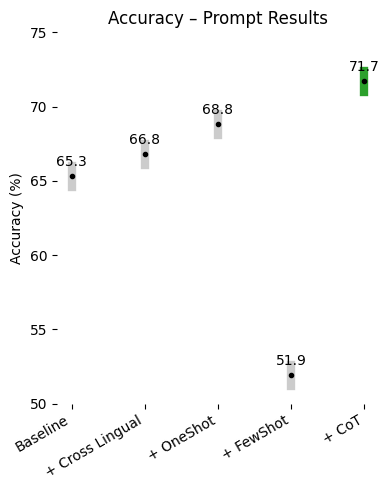

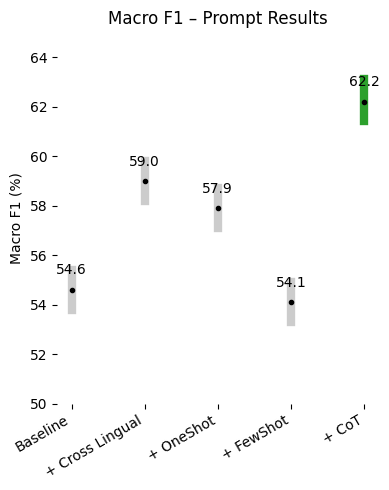

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your data
# Table 1: Prompt Engineering Techniques
prompts = [
    "Baseline",
    "+ Cross Lingual",
    "+ OneShot",
    "+ FewShot",
    "+ CoT"
]
accuracy = [65.3, 66.8, 68.8, 51.9, 71.7]
acc_ci_low = [64.6, 66.1, 68.1, 51.2, 71.0]
acc_ci_high = [66.0, 67.5, 69.5, 52.6, 72.4]

f1 = [54.6, 59.0, 57.9, 54.1, 62.2]
f1_ci_low = [53.8, 58.2, 57.1, 53.3, 61.4]
f1_ci_high = [55.4, 59.8, 58.7, 54.9, 63.1]


# Função de plotagem ajustada
def plot_zoomed_ci(title, prompts, means, ci_low, ci_high, ylabel, zoom_range=None):
    x = np.arange(len(prompts))
    fig, ax = plt.subplots(figsize=(4, 5))

    best_value = max(means)

    for i, (mean, low, high) in enumerate(zip(means, ci_low, ci_high)):
        color = "#2CA02C" if mean == best_value else "#CCCCCC"
        ax.plot([i, i], [low, high], color=color, lw=6, zorder=1)
        ax.plot(i, mean, 'o', color='black', markersize=3, zorder=2)

        # Add text with the mean value
        ax.text(i, mean + 0.5, f"{mean:.1f}", ha='center', va='bottom', fontsize=10)

    ax.set_xticks(x)
    ax.set_xticklabels(prompts, rotation=30, ha='right')
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    for spine in ax.spines.values():
        spine.set_visible(False)

    if zoom_range:
        ax.set_ylim(zoom_range)

    plt.tight_layout()
    plt.show()

# Plots com zoom
plot_zoomed_ci("Accuracy – Prompt Results", prompts, accuracy, acc_ci_low, acc_ci_high, "Accuracy (%)", zoom_range=(50, 75))
plot_zoomed_ci("Macro F1 – Prompt Results", prompts, f1, f1_ci_low, f1_ci_high, "Macro F1 (%)", zoom_range=(50, 65))

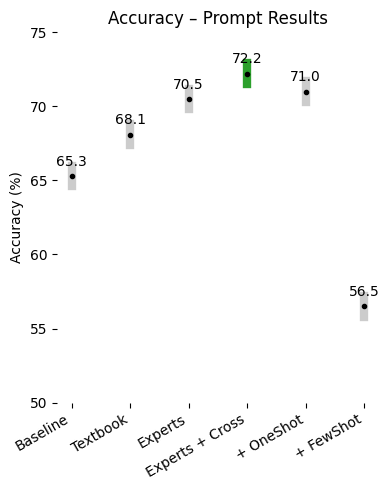

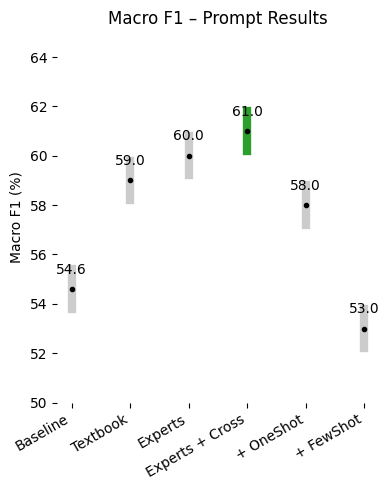

In [ ]:
prompts = [
    "Baseline",
    "Textbook",
    "Experts",
    "Experts + Cross",
    "+ OneShot",
    "+ FewShot"
]
accuracy = [65.3, 68.1, 70.5, 72.2, 71.0, 56.5]
acc_ci_low = [64.6, 67.4, 69.8, 71.5, 70.3, 55.8]
acc_ci_high = [66.0, 68.8, 71.2, 72.9, 71.7, 57.2]

f1 = [54.6, 59.0, 60.0, 61.0, 58.0, 53.0]
f1_ci_low = [53.8, 58.2, 59.2, 60.2, 57.2, 52.2]
f1_ci_high = [55.4, 59.8, 60.8, 61.8, 58.8, 53.8]

# Função de plotagem ajustada
def plot_zoomed_ci(title, prompts, means, ci_low, ci_high, ylabel, zoom_range=None):
    x = np.arange(len(prompts))
    fig, ax = plt.subplots(figsize=(4, 5))

    best_value = max(means)

    for i, (mean, low, high) in enumerate(zip(means, ci_low, ci_high)):
        color = "#2CA02C" if mean == best_value else "#CCCCCC"
        ax.plot([i, i], [low, high], color=color, lw=6, zorder=1)
        ax.plot(i, mean, 'o', color='black', markersize=3, zorder=2)

        # Add text with the mean value
        ax.text(i, mean + 0.5, f"{mean:.1f}", ha='center', va='bottom', fontsize=10)

    ax.set_xticks(x)
    ax.set_xticklabels(prompts, rotation=30, ha='right')
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    for spine in ax.spines.values():
        spine.set_visible(False)

    if zoom_range:
        ax.set_ylim(zoom_range)

    plt.tight_layout()
    plt.show()

# Plots com zoom
plot_zoomed_ci("Accuracy – Prompt Results", prompts, accuracy, acc_ci_low, acc_ci_high, "Accuracy (%)", zoom_range=(50, 75))
plot_zoomed_ci("Macro F1 – Prompt Results", prompts, f1, f1_ci_low, f1_ci_high, "Macro F1 (%)", zoom_range=(50, 65))

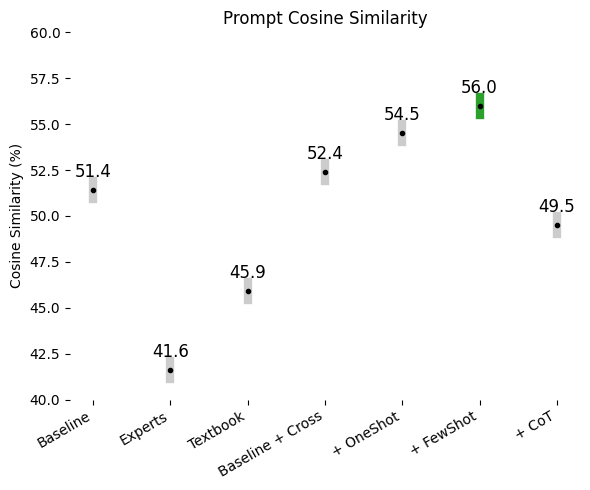

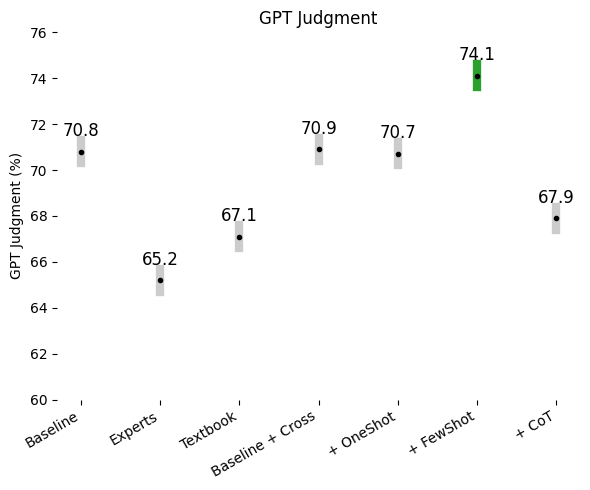

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
prompts2 = [
    "Baseline",
    "Experts",
    "Textbook",
    "Baseline + Cross",
    "+ OneShot",
    "+ FewShot",
    "+ CoT"
]

cosine = [51.4, 41.6, 45.9, 52.4, 54.5, 56.0, 49.5]
cosine_low = [50.9, 41.1, 45.4, 51.9, 54.0, 55.5, 49.0]
cosine_high = [51.9, 42.1, 46.4, 52.9, 55.0, 56.5, 50.0]

gpt = [70.8, 65.2, 67.1, 70.9, 70.7, 74.1, 67.9]
gpt_low = [70.3, 64.7, 66.6, 70.4, 70.2, 73.6, 67.4]
gpt_high = [71.3, 65.7, 67.6, 71.4, 71.2, 74.6, 68.4]

# Função de plotagem
def plot_zoomed_ci(title, prompts, means, ci_low, ci_high, ylabel, zoom_range=None):
    x = np.arange(len(prompts))
    fig, ax = plt.subplots(figsize=(6, 5))

    best_value = max(means)

    for i, (mean, low, high) in enumerate(zip(means, ci_low, ci_high)):
        color = "#2CA02C" if mean == best_value else "#CCCCCC"
        ax.plot([i, i], [low, high], color=color, lw=6, zorder=1)
        ax.plot(i, mean, 'o', color='black', markersize=3, zorder=2)
        ax.text(i, mean + 0.5, f"{mean:.1f}", ha='center', va='bottom', fontsize=12)

    ax.set_xticks(x)
    ax.set_xticklabels(prompts, rotation=30, ha='right')
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    for spine in ax.spines.values():
        spine.set_visible(False)

    if zoom_range:
        ax.set_ylim(zoom_range)

    plt.tight_layout()
    plt.show()

# Novos gráficos
plot_zoomed_ci("Prompt Cosine Similarity", prompts2, cosine, cosine_low, cosine_high, "Cosine Similarity (%)", zoom_range=(40, 60))
plot_zoomed_ci("GPT Judgment", prompts2, gpt, gpt_low, gpt_high, "GPT Judgment (%)", zoom_range=(60, 76))

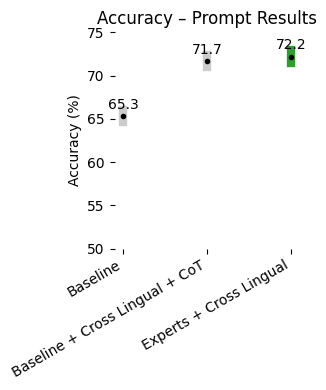

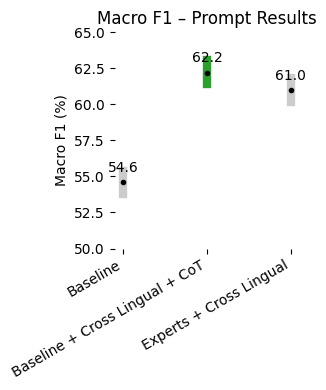

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

prompts = [
    "Baseline",
    "Baseline + Cross Lingual + CoT",
    "Experts + Cross Lingual"
]

accuracy = [65.3, 71.7, 72.2]
acc_ci_low = [64.6, 71.0, 71.5]
acc_ci_high = [66.0, 72.4, 72.9]

f1 = [54.6, 62.2, 61.0]
f1_ci_low = [53.8, 61.4, 60.2]
f1_ci_high = [55.4, 63.1, 61.8]

# Função de plotagem ajustada
def plot_zoomed_ci(title, prompts, means, ci_low, ci_high, ylabel, zoom_range=None):
    x = np.arange(len(prompts))
    fig, ax = plt.subplots(figsize=(3, 4))

    best_value = max(means)

    for i, (mean, low, high) in enumerate(zip(means, ci_low, ci_high)):
        color = "#2CA02C" if mean == best_value else "#CCCCCC"
        ax.plot([i, i], [low, high], color=color, lw=6, zorder=1)
        ax.plot(i, mean, 'o', color='black', markersize=3, zorder=2)

        # Add text with the mean value
        ax.text(i, mean + 0.5, f"{mean:.1f}", ha='center', va='bottom', fontsize=10)

    ax.set_xticks(x)
    ax.set_xticklabels(prompts, rotation=30, ha='right')
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    for spine in ax.spines.values():
        spine.set_visible(False)

    if zoom_range:
        ax.set_ylim(zoom_range)

    plt.tight_layout()
    plt.show()

# Plots com zoom
plot_zoomed_ci("Accuracy – Prompt Results", prompts, accuracy, acc_ci_low, acc_ci_high, "Accuracy (%)", zoom_range=(50, 75))
plot_zoomed_ci("Macro F1 – Prompt Results", prompts, f1, f1_ci_low, f1_ci_high, "Macro F1 (%)", zoom_range=(50, 65))